# Problem Statement: E-Commerce Data

The data set belongs to a leading online E-Commerce company. An online retail (E commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.


# Data Dictionary

<b>CustomerID</b> - Unique customer ID<br> 
<b>Churn</b> - Churn Flag<br>  
<b>Tenure</b> - Tenure of customer in organization<br> 
<b>PreferredLoginDevice</b> - Preferred login device of customer<br>
<b>CityTier</b> - City tier<br>
<b>WarehouseToHome</b> - Distance in between warehouse to home of customer<br>
<b>PreferredPaymentMode</b> - Preferred payment method of customer<br> 
<b>Gender</b> - Gender of customer<br>
<b>HourSpendOnApp</b> - Number of hours spend on mobile application or website<br>
<b>NumberOfDeviceRegistered</b> - Total number of deceives is registered on particular customer<br> 
<b>PreferedOrderCat</b> - Preferred order category of customer in last month<br>  
<b>SatisfactionScore</b> - Satisfactory score of customer on service<br>
<b>MaritalStatus</b> - Marital status of customer<br>
<b>NumberOfAddress</b> - Total number of added added on particular customer<br>
<b>Complain</b> - Any complaint has been raised in last month<br>
<b>OrderAmountHikeFromlastYear</b> - Percentage increases in order from last year<br>
<b>CouponUsed</b> - Total number of coupon has been used in last month<br>
<b>OrderCount</b> - Total number of orders has been places in last month<br>
<b>DaySinceLastOrder</b> -Day Since last order by customer<br>
<b>CashbackAmount</b> - Average cashback in last month

### Load library and import data

In [197]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import sweetviz as sv
import eli5
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings("ignore")

In [198]:
churn=pd.read_excel("E_Commerce_Dataset.xlsx",sheet_name="E Comm")

### Inspect the data

In [199]:
churn.shape

(5630, 20)

In [200]:
churn.head(2)

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90

In [201]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# EDA

### Checking for Duplicates

In [202]:
# Are there any duplicates ?
dups = churn.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
churn[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [CustomerID, Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

There are no Duplicates

### Removing unwanted variables

In [203]:
# remove the variables and check the data for the 10 rows 
churn = churn.drop(['CustomerID'], axis=1)
churn.head(10)

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1     NaN                Phone         1              8.0   
2      1     NaN                Phone         1             30.0   
3      1     0.0                Phone         3             15.0   
4      1     0.0                Phone         1             12.0   
5      1     0.0             Computer         1             22.0   
6      1     NaN                Phone         3             11.0   
7      1     NaN                Phone         1              6.0   
8      1    13.0                Phone         3              9.0   
9      1     NaN                Phone         1             31.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   
5           Debit Card  Female             3.0                         5   
6     Cash on Delivery    Male             2.0                         3   
7                   CC    Male             3.0                         3   
8             E wallet    Male             NaN                         4   
9           Debit Card    Male             2.0                         5   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   
5        Mobile Phone                  5        Single                2   
6  Laptop & Accessory                  2      Divorced                4   
7              Mobile                  2      Divorced                3   
8              Mobile                  3      Divorced                2   
9              Mobile                  3        Single                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   
5         1                         22.0         4.0         6.0   
6         0                         14.0         0.0         1.0   
7         1                         16.0         2.0         2.0   
8         1                         14.0         0.0         1.0   
9         0                         12.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60  
5                7.0          139.19  
6                0.0          120.86  
7                0.0          122.93  
8                2.0          126.83  
9                1.0          122.93

Checking dimensions after removing unwanted variables,

### Summary

In [204]:
churn.describe(include="all").T

count unique                 top  freq      mean  \
Churn                        5630    NaN                 NaN   NaN  0.168384   
Tenure                       5366    NaN                 NaN   NaN   10.1899   
PreferredLoginDevice         5630      3        Mobile Phone  2765       NaN   
CityTier                     5630    NaN                 NaN   NaN   1.65471   
WarehouseToHome              5379    NaN                 NaN   NaN   15.6399   
PreferredPaymentMode         5630      7          Debit Card  2314       NaN   
Gender                       5630      2                Male  3384       NaN   
HourSpendOnApp               5375    NaN                 NaN   NaN   2.93153   
NumberOfDeviceRegistered     5630    NaN                 NaN   NaN   3.68899   
PreferedOrderCat             5630      6  Laptop & Accessory  2050       NaN   
SatisfactionScore            5630    NaN                 NaN   NaN   3.06679   
MaritalStatus                5630      3             Married  2986       NaN   
NumberOfAddress              5630    NaN                 NaN   NaN   4.21403   
Complain                     5630    NaN                 NaN   NaN  0.284902   
OrderAmountHikeFromlastYear  5365    NaN                 NaN   NaN   15.7079   
CouponUsed                   5374    NaN                 NaN   NaN   1.75102   
OrderCount                   5372    NaN                 NaN   NaN     3.008   
DaySinceLastOrder            5323    NaN                 NaN   NaN   4.54349   
CashbackAmount               5630    NaN                 NaN   NaN   177.223   

                                  std  min     25%     50%      75%     max  
Churn                         0.37424    0       0       0        0       1  
Tenure                        8.55724    0       2       9       16      61  
PreferredLoginDevice              NaN  NaN     NaN     NaN      NaN     NaN  
CityTier                     0.915389    1       1       1        3       3  
WarehouseToHome               8.53148    5       9      14       20     127  
PreferredPaymentMode              NaN  NaN     NaN     NaN      NaN     NaN  
Gender                            NaN  NaN     NaN     NaN      NaN     NaN  
HourSpendOnApp               0.721926    0       2       3        3       5  
NumberOfDeviceRegistered        1.024    1       3       4        4       6  
PreferedOrderCat                  NaN  NaN     NaN     NaN      NaN     NaN  
SatisfactionScore             1.38019    1       2       3        4       5  
MaritalStatus                     NaN  NaN     NaN     NaN      NaN     NaN  
NumberOfAddress               2.58359    1       2       3        6      22  
Complain                     0.451408    0       0       0        1       1  
OrderAmountHikeFromlastYear   3.67549   11      13      15       18      26  
CouponUsed                    1.89462    0       1       1        2      16  
OrderCount                    2.93968    1       1       2        3      16  
DaySinceLastOrder             3.65443    0       2       3        7      46  
CashbackAmount                 49.207    0  145.77  163.28  196.393  324.99

In [205]:
churn.shape

(5630, 19)

### unique values for categorical variables

In [206]:
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

PREFERREDLOGINDEVICE :  3
Phone           1231
Computer        1634
Mobile Phone    2765
Name: PreferredLoginDevice, dtype: int64


PREFERREDPAYMENTMODE :  7
Cash on Delivery     149
CC                   273
COD                  365
UPI                  414
E wallet             614
Credit Card         1501
Debit Card          2314
Name: PreferredPaymentMode, dtype: int64


GENDER :  2
Female    2246
Male      3384
Name: Gender, dtype: int64


PREFEREDORDERCAT :  6
Others                 264
Grocery                410
Mobile                 809
Fashion                826
Mobile Phone          1271
Laptop & Accessory    2050
Name: PreferedOrderCat, dtype: int64


MARITALSTATUS :  3
Divorced     848
Single      1796
Married     2986
Name: MaritalStatus, dtype: int64




### Checking for Possible columns which are categorical by nature but are having data type "int" or "float"

In [207]:
for column in churn.columns:
    if churn[column].dtype == 'int64' or churn[column].dtype == 'float64':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

CHURN :  2
1     948
0    4682
Name: Churn, dtype: int64


TENURE :  36
51.0      1
60.0      1
50.0      1
61.0      1
31.0     49
29.0     55
25.0     59
26.0     60
27.0     66
30.0     66
28.0     70
24.0     75
22.0     76
21.0     84
23.0     89
17.0    106
20.0    109
18.0    123
19.0    140
16.0    149
15.0    159
2.0     167
14.0    176
13.0    181
12.0    182
6.0     183
11.0    194
3.0     195
4.0     203
5.0     204
10.0    213
7.0     221
9.0     247
8.0     263
0.0     508
1.0     690
Name: Tenure, dtype: int64


CITYTIER :  3
2     242
3    1722
1    3666
Name: CityTier, dtype: int64


WAREHOUSETOHOME :  34
127.0      1
126.0      1
5.0        8
36.0      51
34.0      63
33.0      67
28.0      71
20.0      74
19.0      75
29.0      81
27.0      81
21.0      85
24.0      85
25.0      86
26.0      89
18.0      89
35.0      93
32.0      94
30.0      94
23.0      96
31.0     101
22.0     104
17.0     217
12.0     221
11.0     233
13.0     249
10.0     274
15.0     288
6.0   

### Change the data types of these 6 features 

In [208]:
cat=["Churn","CityTier","SatisfactionScore","Complain","HourSpendOnApp","NumberOfDeviceRegistered"]

In [209]:
for i in cat:
    churn[i]=churn[i].astype("object")

In [210]:
churn['CityTier'] = churn['CityTier'].replace(['1',1], 'Tier 1')
churn['CityTier'] = churn['CityTier'].replace(['2',2], 'Tier 2')
churn['CityTier'] = churn['CityTier'].replace(['3',3], 'Tier 3')

In [211]:
churn['CityTier'].value_counts()

Tier 1    3666
Tier 3    1722
Tier 2     242
Name: CityTier, dtype: int64

In [212]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   object 
 8   NumberOfDeviceRegistered     5630 non-null   object 
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

### Making different list for categorical columns and numerical columns

In [213]:
cat=[]
num=[]
for i in churn.columns:
    if churn[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']
['Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


### Describe for numerical and categorical columns

In [214]:
churn[num].describe().T

count        mean        std   min     25%  \
Tenure                       5366.0   10.189899   8.557241   0.0    2.00   
WarehouseToHome              5379.0   15.639896   8.531475   5.0    9.00   
NumberOfAddress              5630.0    4.214032   2.583586   1.0    2.00   
OrderAmountHikeFromlastYear  5365.0   15.707922   3.675485  11.0   13.00   
CouponUsed                   5374.0    1.751023   1.894621   0.0    1.00   
OrderCount                   5372.0    3.008004   2.939680   1.0    1.00   
DaySinceLastOrder            5323.0    4.543491   3.654433   0.0    2.00   
CashbackAmount               5630.0  177.223030  49.207036   0.0  145.77   

                                50%       75%     max  
Tenure                         9.00   16.0000   61.00  
WarehouseToHome               14.00   20.0000  127.00  
NumberOfAddress                3.00    6.0000   22.00  
OrderAmountHikeFromlastYear   15.00   18.0000   26.00  
CouponUsed                     1.00    2.0000   16.00  
OrderCount                     2.00    3.0000   16.00  
DaySinceLastOrder              3.00    7.0000   46.00  
CashbackAmount               163.28  196.3925  324.99

In [215]:
churn[cat].describe().T

count unique                 top  freq
Churn                     5630      2                   0  4682
PreferredLoginDevice      5630      3        Mobile Phone  2765
CityTier                  5630      3              Tier 1  3666
PreferredPaymentMode      5630      7          Debit Card  2314
Gender                    5630      2                Male  3384
HourSpendOnApp            5375      6                   3  2687
NumberOfDeviceRegistered  5630      6                   4  2377
PreferedOrderCat          5630      6  Laptop & Accessory  2050
SatisfactionScore         5630      5                   3  1698
MaritalStatus             5630      3             Married  2986
Complain                  5630      2                   0  4026

### Checking for Missing values

In [216]:
# Are there any missing values ?
churn.isnull().sum()/len(churn)

Churn                          0.000000
Tenure                         0.046892
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                0.044583
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 0.045293
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    0.047069
CouponUsed                     0.045471
OrderCount                     0.045826
DaySinceLastOrder              0.054529
CashbackAmount                 0.000000
dtype: float64

There are some missing values in the following columns :<br>
Tenure<br>
WareHouseToHome<br>
HoursSpendOnApp<br>
OrderAmountHikeFromlastYear <br>
CouponUsed<br>
OrderCount<br>
DaySinceLastOrder

### Proportion of observations in Target classes

In [217]:
# Get the proportions
churn['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

### Checking for Outliers

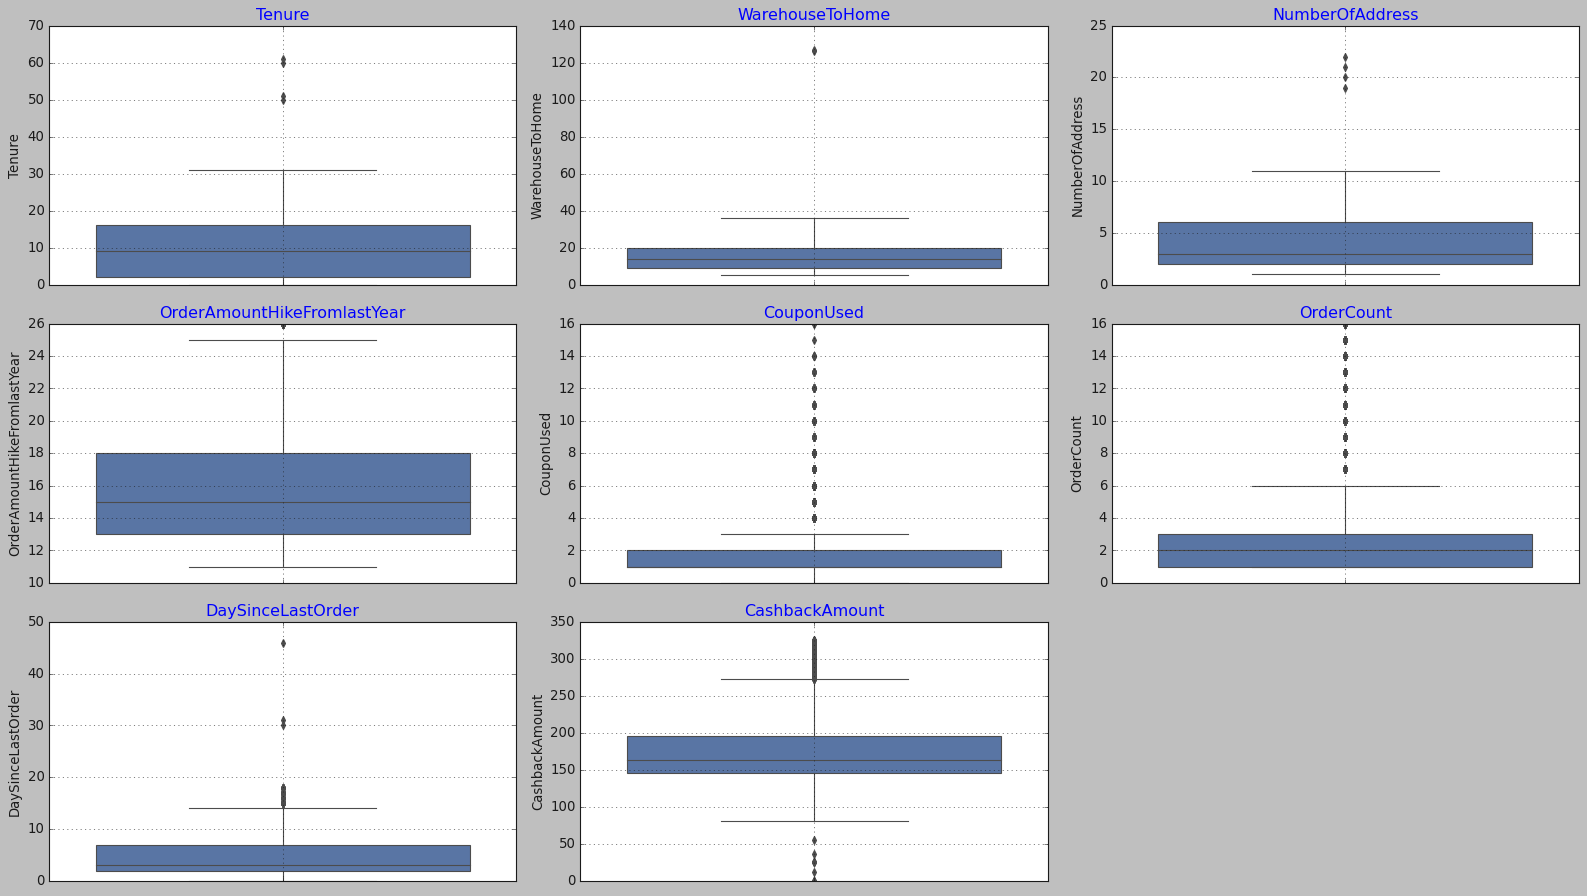

In [218]:
data_plot=churn[num]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

There are not many outliers but there are a few in all variables.

### Imputing missing values

In [219]:
churn['Tenure'] = churn['Tenure'].replace(['0', 0], np.nan)

In [220]:
churn['HourSpendOnApp'] = churn['HourSpendOnApp'].replace(['0', 0], np.nan)

Since all 10 numerical variables ahve outliers I will be trateing the outliers using median 

In [221]:
churn.isnull().sum()

Churn                            0
Tenure                         772
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 258
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [222]:
from sklearn.impute import SimpleImputer
my_imputer_num = SimpleImputer(missing_values=np.NaN, strategy='median')
my_imputer_cat = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
churn[num] = pd.DataFrame(my_imputer_num.fit_transform(churn[num].values))
churn[cat] = pd.DataFrame(my_imputer_cat.fit_transform(churn[cat].values))

In [223]:
churn.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

All the outliers are treated now

### Outliers Treatment

In [224]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    #print(col)
    #print(Q1)
    #print(Q3)
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [225]:
for feature in data_plot: 
    #print("Feature",feature)
    lr,ur=treat_outlier(churn[feature])
    #print("lr",lr)
    #print("ur",ur)
    churn[feature]=np.where(churn[feature]>ur,np.round_(ur),churn[feature])
    churn[feature]=np.where(churn[feature]<lr,np.round_(lr),churn[feature])

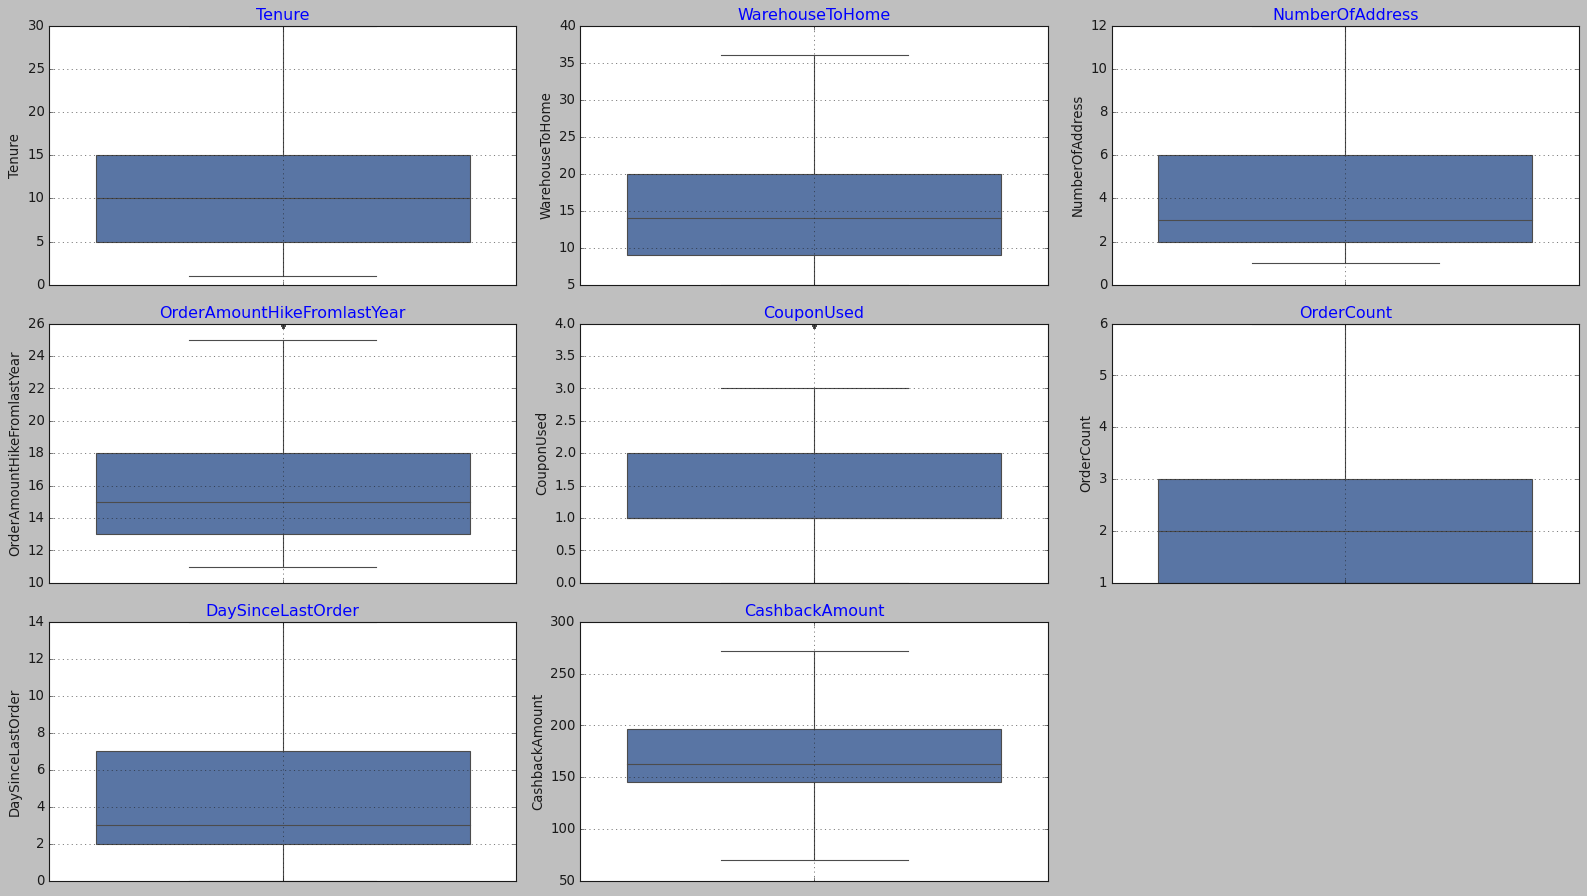

In [226]:
data_plot=churn[num]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

All the outliers are treated now

### Data Cleanining

In [227]:
churn.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [228]:
churn["PreferredLoginDevice"].replace({"Phone": "Mobile Phone"}, inplace=True)

In [229]:
churn.PreferredLoginDevice.value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [230]:
churn["PreferedOrderCat"].replace({"Mobile Phone": "Mobile"}, inplace=True)

In [231]:
churn.PreferedOrderCat.value_counts()

Mobile                2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [232]:
churn.PreferredPaymentMode.value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [233]:
churn["PreferredPaymentMode"].replace({"Cash on Delivery": "COD","Credit Card":"CC"}, inplace=True)

In [234]:
churn.PreferredPaymentMode.value_counts()

Debit Card    2314
CC            1774
E wallet       614
COD            514
UPI            414
Name: PreferredPaymentMode, dtype: int64

In [235]:
churn.SatisfactionScore.value_counts()

3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64

In [236]:
churn.CouponUsed.value_counts()

1.0    2361
2.0    1283
0.0    1030
4.0     629
3.0     327
Name: CouponUsed, dtype: int64

### Univariate Analysis

In [237]:
churn.skew()

Churn                          1.772843
Tenure                         0.699005
WarehouseToHome                0.944317
HourSpendOnApp                -0.009482
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                0.965972
Complain                       0.953347
OrderAmountHikeFromlastYear    0.835439
CouponUsed                     0.792633
OrderCount                     1.148036
DaySinceLastOrder              0.795105
CashbackAmount                 0.900876
dtype: float64

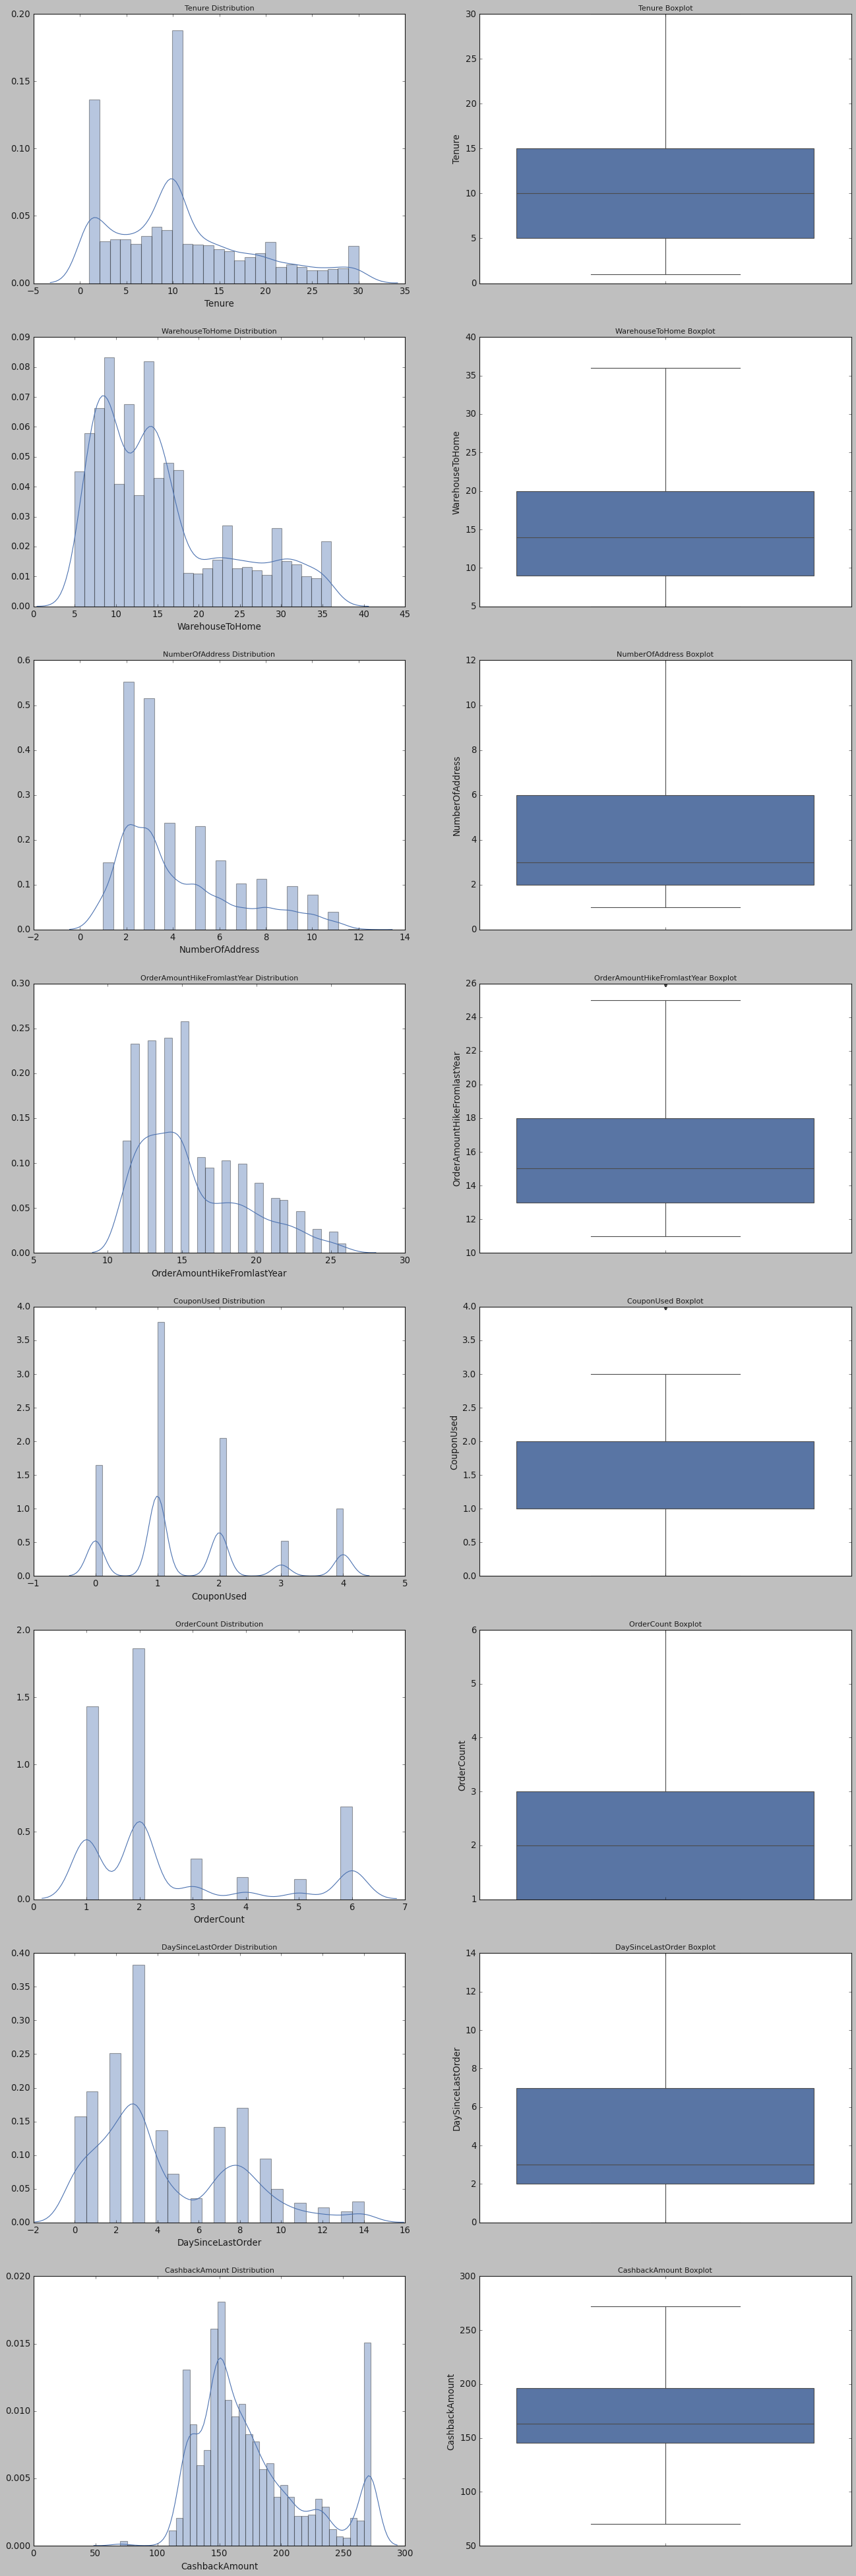

In [238]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(20,60)

a = sns.distplot(churn['Tenure'] , ax=axes[0][0])
a.set_title("Tenure Distribution",fontsize=10)

a = sns.boxplot(churn['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure Boxplot",fontsize=10)

a = sns.distplot(churn['WarehouseToHome'] , ax=axes[1][0])
a.set_title("WarehouseToHome Distribution",fontsize=10)

a = sns.boxplot(churn['WarehouseToHome'] , orient = "v" , ax=axes[1][1])
a.set_title("WarehouseToHome Boxplot",fontsize=10)

a = sns.distplot(churn['NumberOfAddress'] , ax=axes[2][0])
a.set_title("NumberOfAddress Distribution",fontsize=10)

a = sns.boxplot(churn['NumberOfAddress'] , orient = "v" , ax=axes[2][1])
a.set_title("NumberOfAddress Boxplot",fontsize=10)

a = sns.distplot(churn['OrderAmountHikeFromlastYear'] , ax=axes[3][0])
a.set_title("OrderAmountHikeFromlastYear Distribution",fontsize=10)

a = sns.boxplot(churn['OrderAmountHikeFromlastYear'] , orient = "v" , ax=axes[3][1])
a.set_title("OrderAmountHikeFromlastYear Boxplot",fontsize=10)

a = sns.distplot(churn['CouponUsed'] , ax=axes[4][0])
a.set_title("CouponUsed Distribution",fontsize=10)

a = sns.boxplot(churn['CouponUsed'] , orient = "v" , ax=axes[4][1])
a.set_title("CouponUsed Boxplot",fontsize=10)


a = sns.distplot(churn['OrderCount'] , ax=axes[5][0])
a.set_title("OrderCount Distribution",fontsize=10)

a = sns.boxplot(churn['OrderCount'] , orient = "v" , ax=axes[5][1])
a.set_title("OrderCount Boxplot",fontsize=10)


a = sns.distplot(churn['DaySinceLastOrder'] , ax=axes[6][0])
a.set_title("DaySinceLastOrder Distribution",fontsize=10)

a = sns.boxplot(churn['DaySinceLastOrder'] , orient = "v" , ax=axes[6][1])
a.set_title("DaySinceLastOrder Boxplot",fontsize=10)

a = sns.distplot(churn['CashbackAmount'] , ax=axes[7][0])
a.set_title("CashbackAmount Distribution",fontsize=10)

a = sns.boxplot(churn['CashbackAmount'] , orient = "v" , ax=axes[7][1])
a.set_title("CashbackAmount Boxplot",fontsize=10)

plt.show()

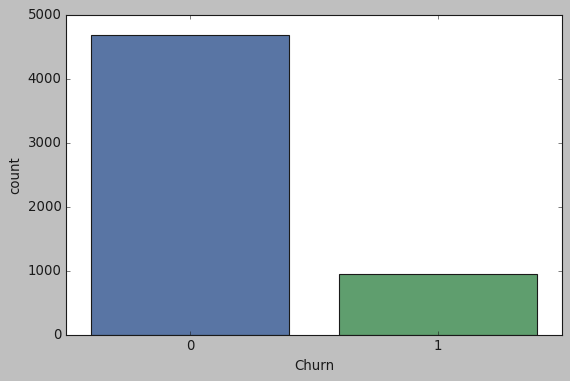

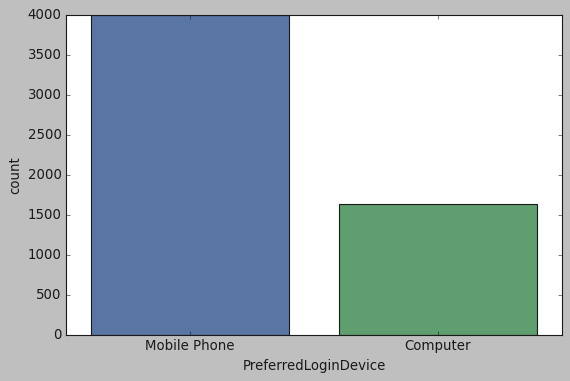

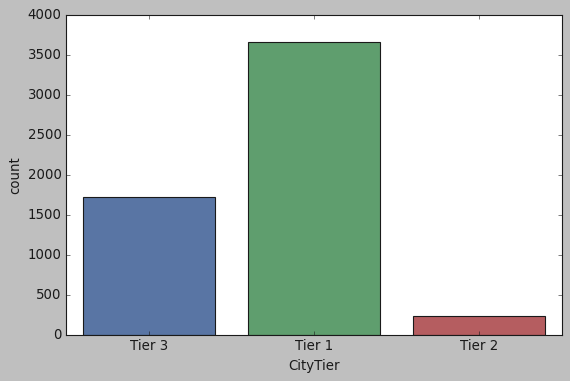

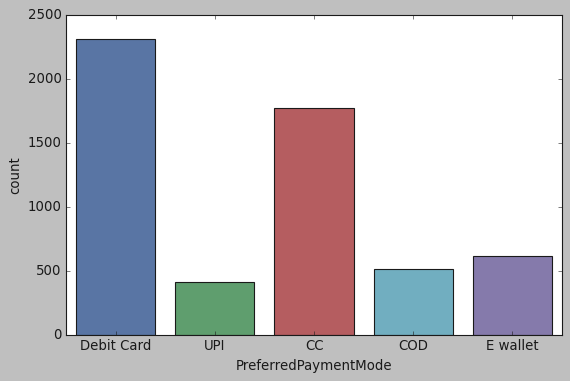

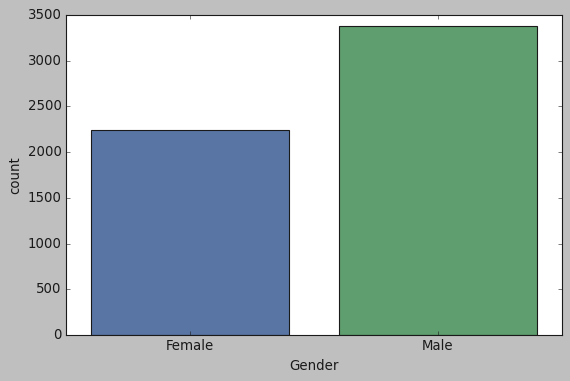

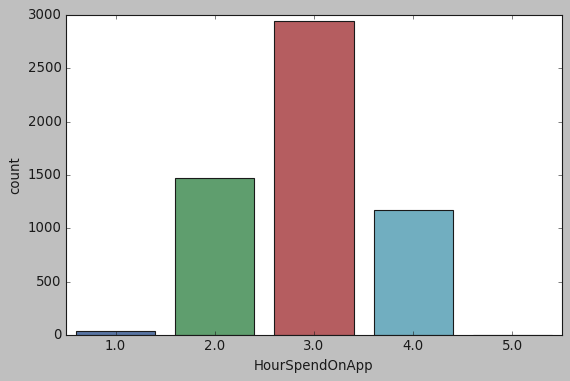

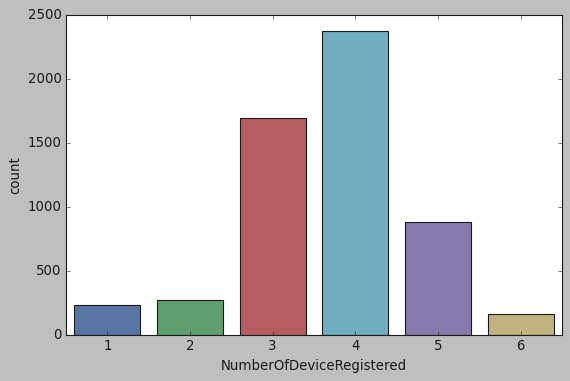

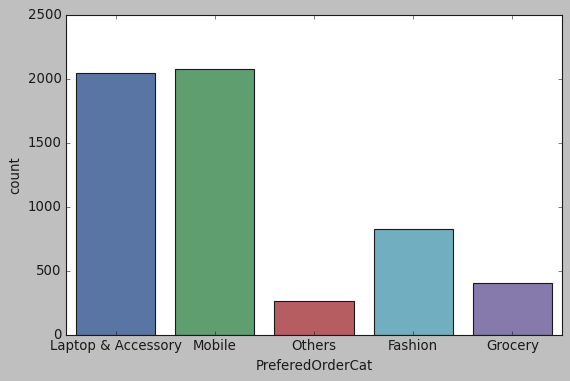

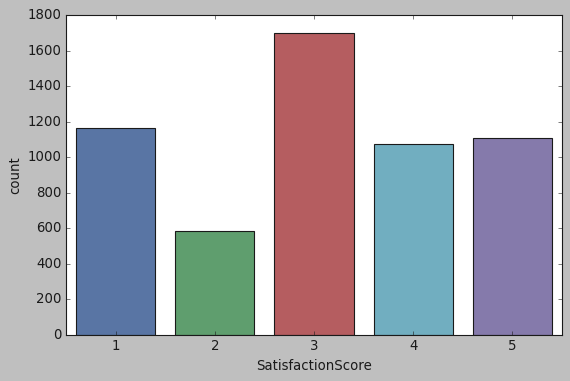

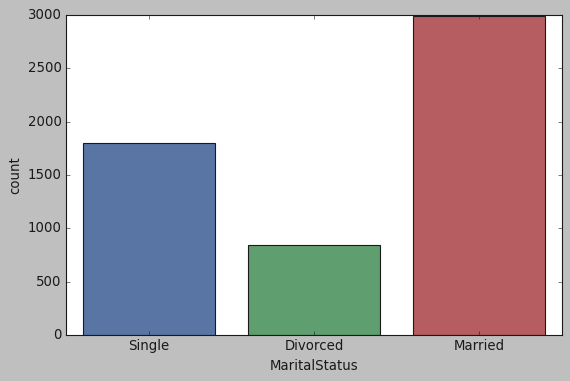

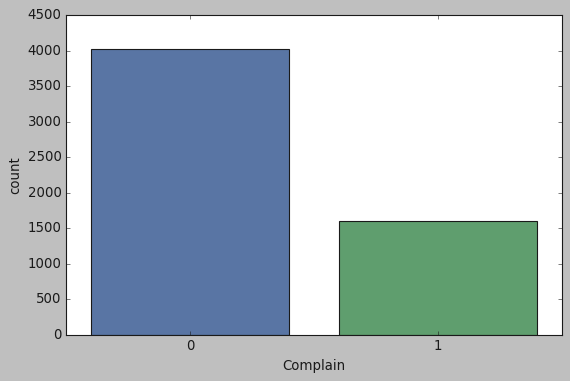

In [239]:
for column in churn[cat].columns:
    plt.figure(figsize=(8,5))
    sns.countplot(churn[column])
    plt.show()

### Bivariate Analysis

### Continous Variable with Target Variable

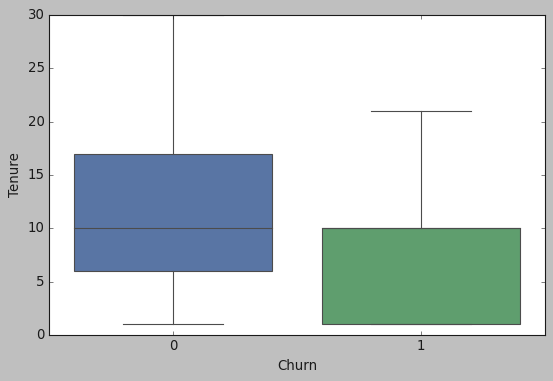

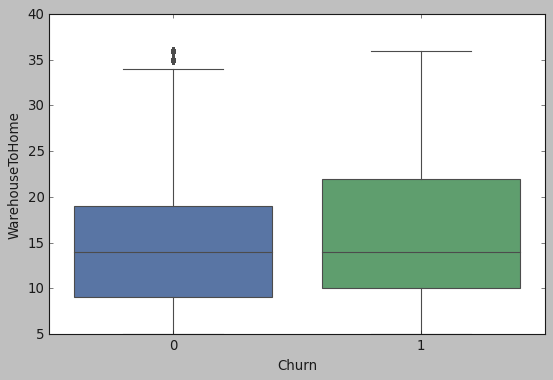

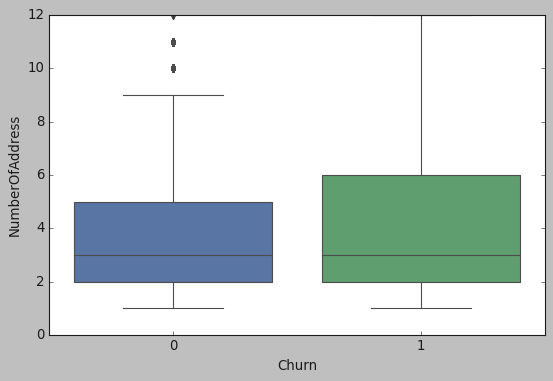

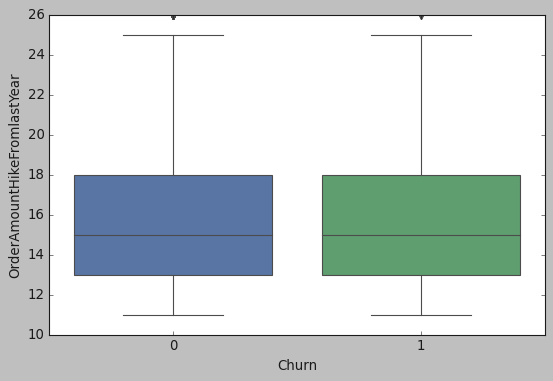

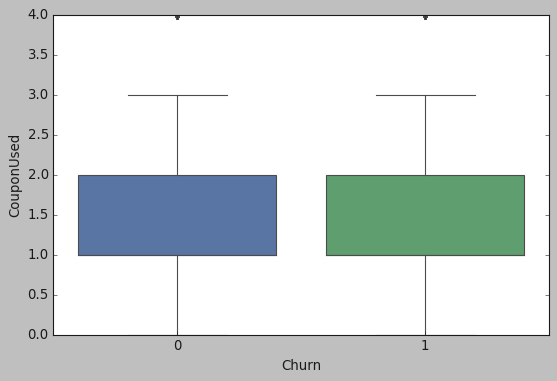

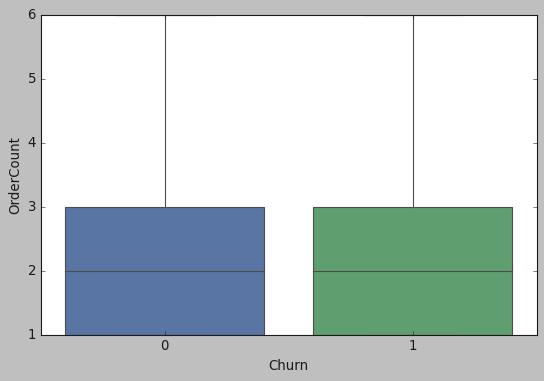

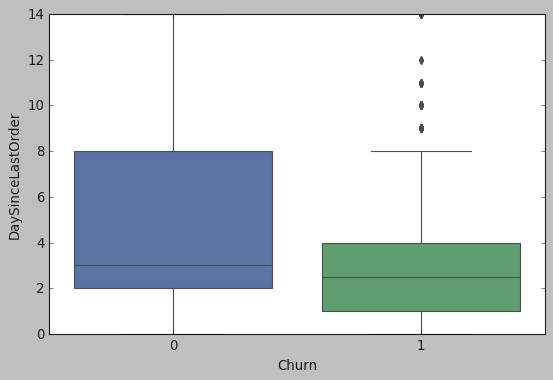

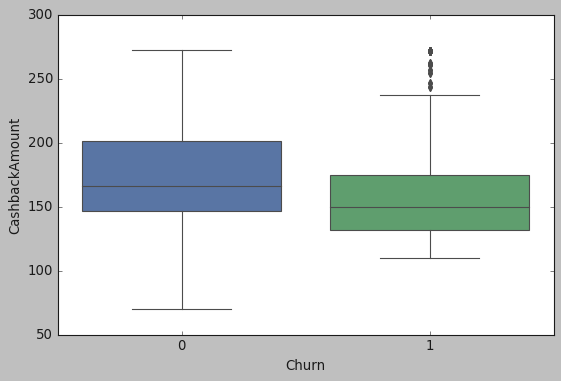

In [240]:
for column in churn[num].columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(churn["Churn"], churn[column]) 
    plt.show()

### Categorical Variable with Target Variable

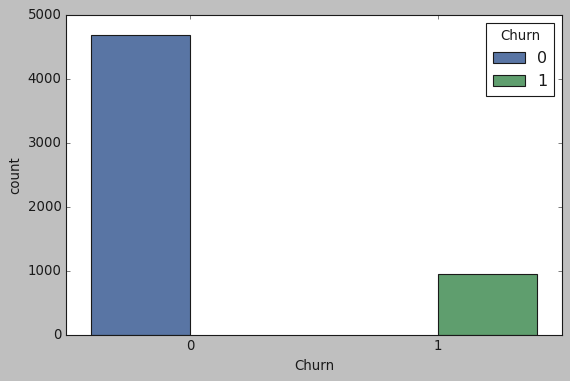

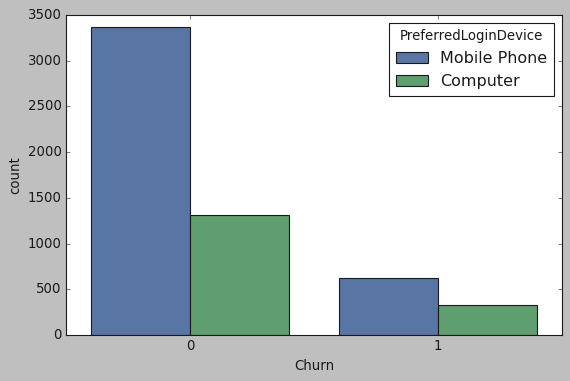

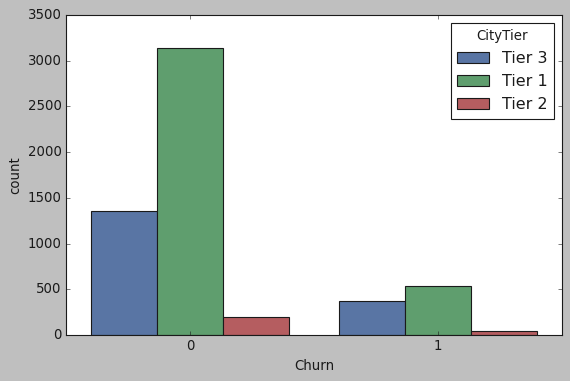

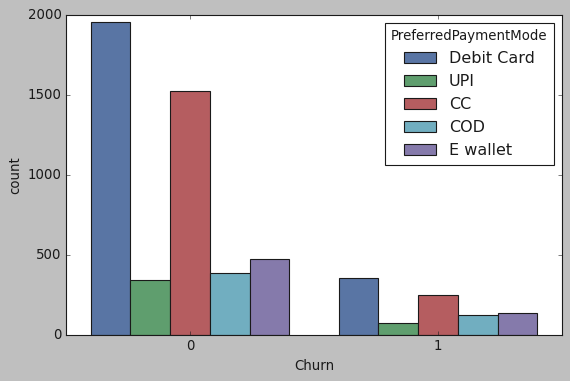

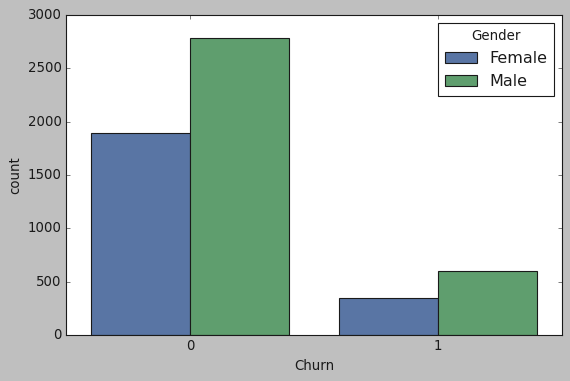

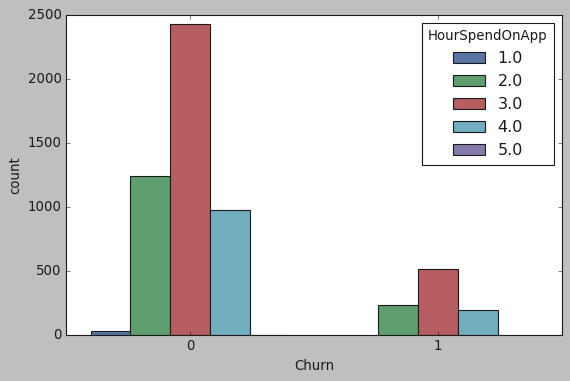

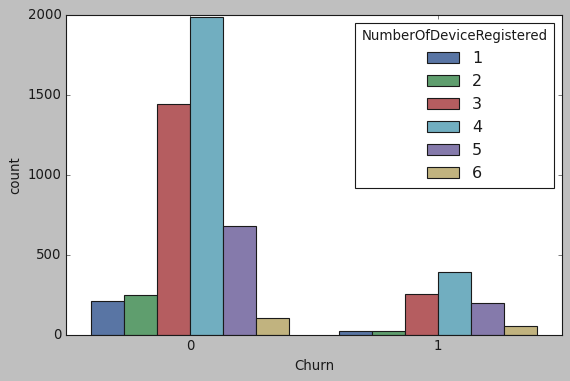

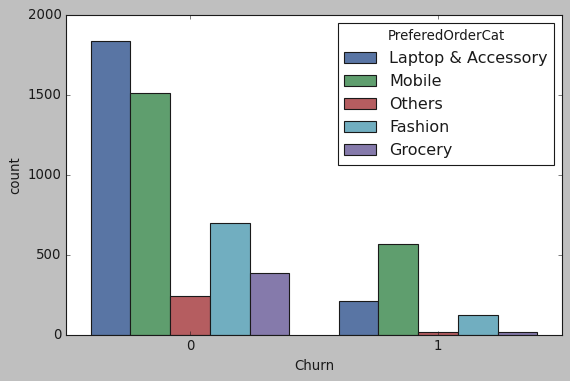

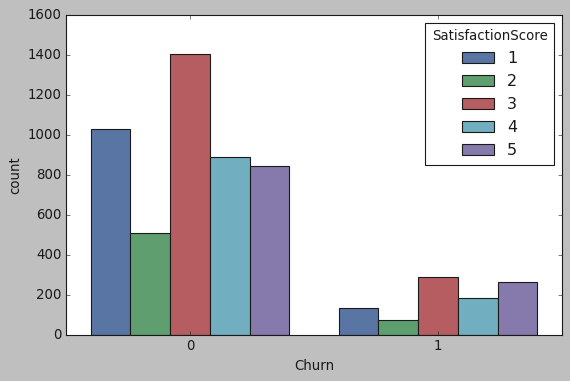

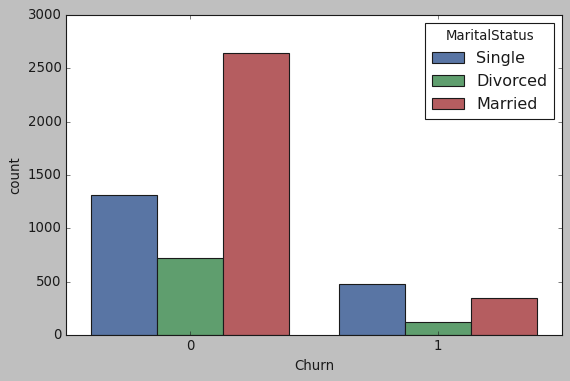

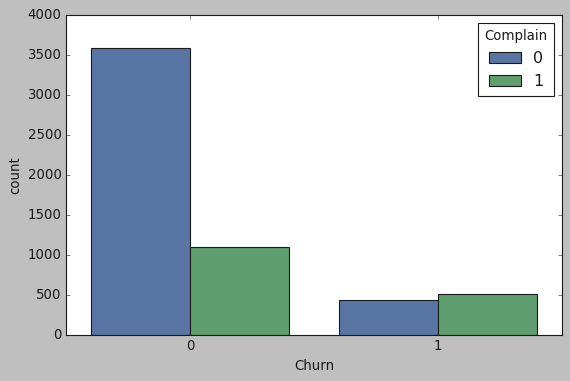

In [241]:
for column in churn[cat].columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x="Churn", hue=churn[column], data=churn)
    plt.show()

### Between Two Continous Variables

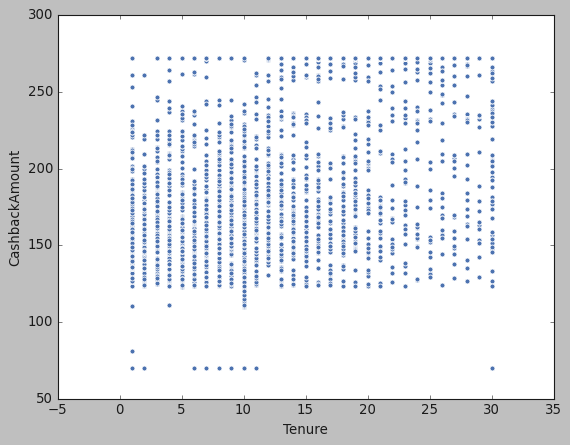

In [242]:
sns.scatterplot(data=churn, x="Tenure", y="CashbackAmount")

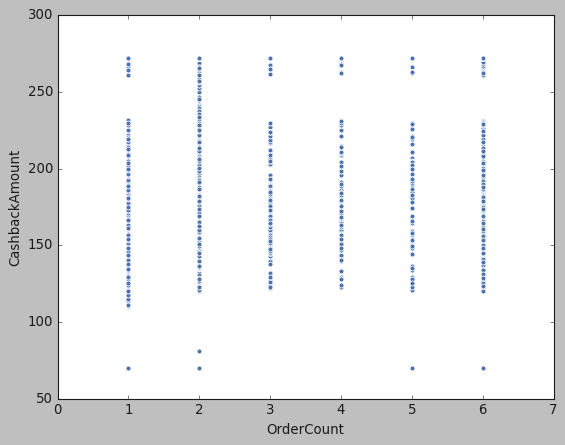

In [243]:
sns.scatterplot(data=churn, x="OrderCount", y="CashbackAmount")

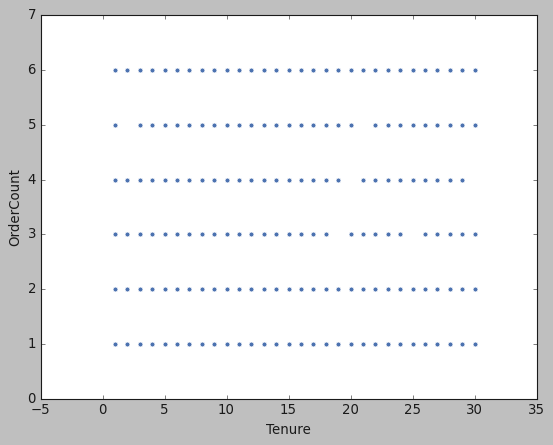

In [244]:
sns.scatterplot(data=churn, x="Tenure", y="OrderCount")

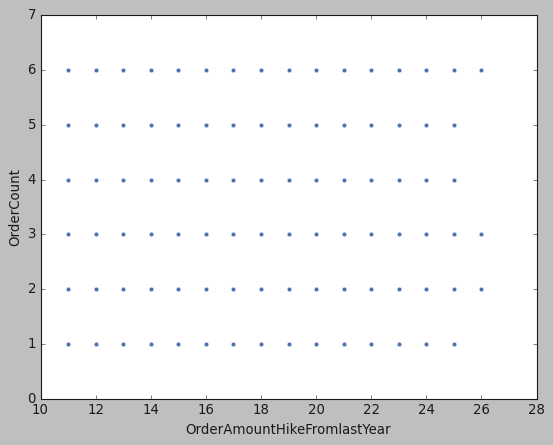

In [245]:
sns.scatterplot(data=churn, x="OrderAmountHikeFromlastYear", y="OrderCount")

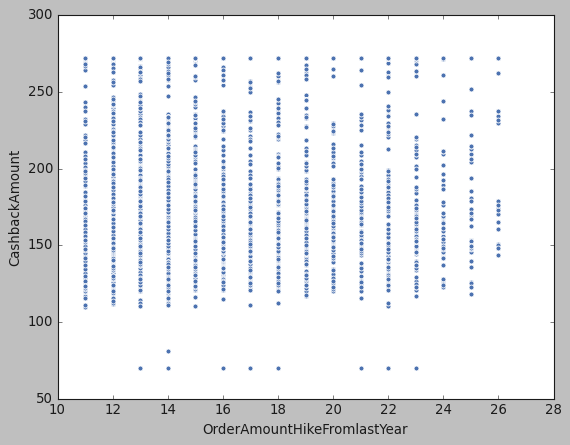

In [246]:
sns.scatterplot(data=churn, x="OrderAmountHikeFromlastYear", y="CashbackAmount")

### Between Categorical and Continous Variable

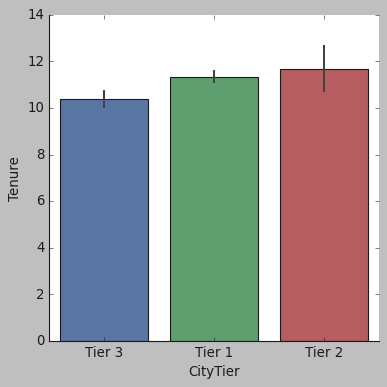

In [247]:
sns.catplot(x="CityTier", y="Tenure", data=churn,kind="bar")

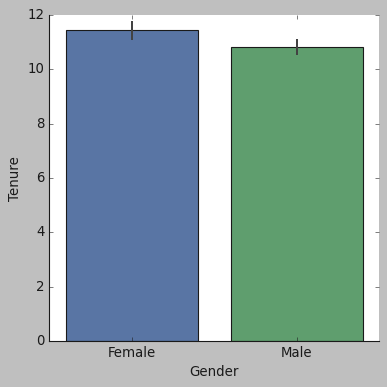

In [248]:
sns.catplot(x="Gender", y="Tenure", data=churn,kind="bar")

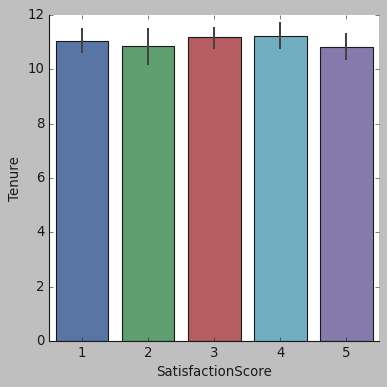

In [249]:
sns.catplot(x="SatisfactionScore", y="Tenure", data=churn,kind="bar")

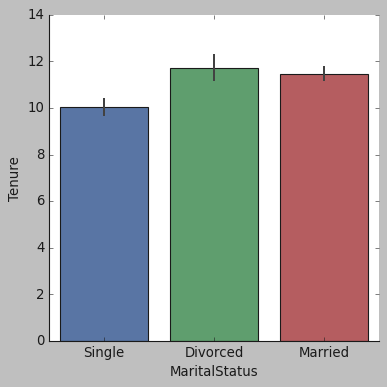

In [250]:
sns.catplot(x="MaritalStatus", y="Tenure", data=churn,kind="bar")

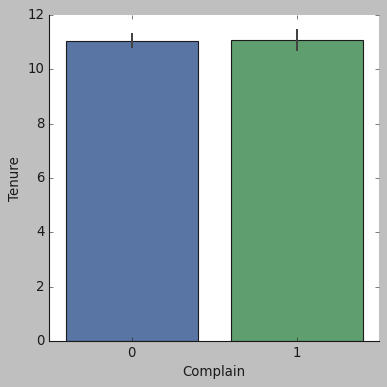

In [251]:
sns.catplot(x="Complain", y="Tenure", data=churn,kind="bar")

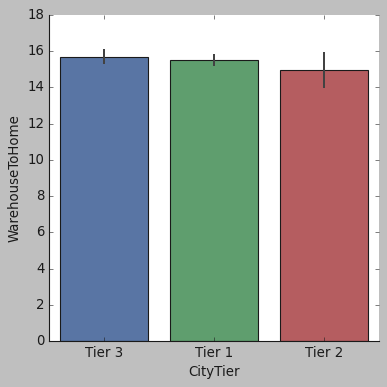

In [252]:
sns.catplot(x="CityTier", y="WarehouseToHome", data=churn,kind="bar")

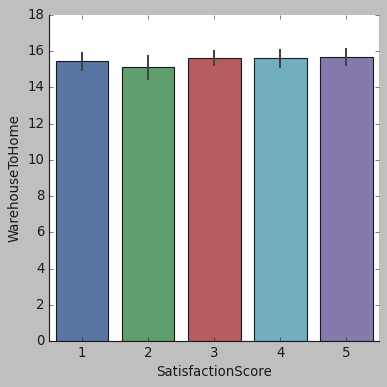

In [253]:
sns.catplot(x="SatisfactionScore", y="WarehouseToHome", data=churn,kind="bar")

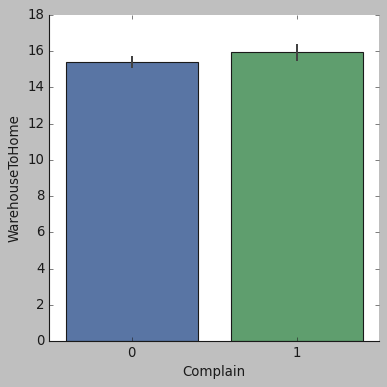

In [254]:
sns.catplot(x="Complain", y="WarehouseToHome", data=churn,kind="bar")

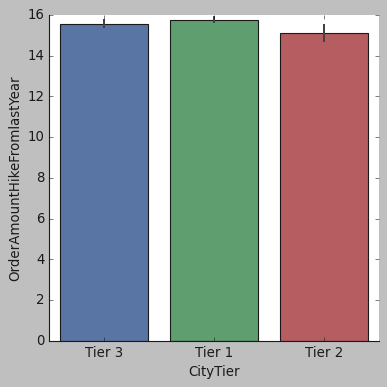

In [255]:
sns.catplot(x="CityTier", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

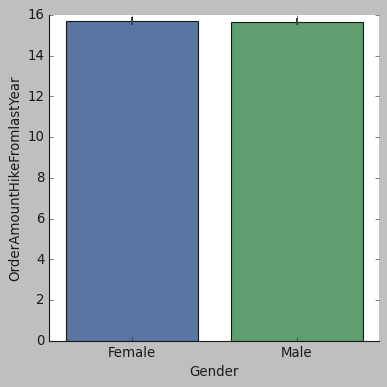

In [256]:
sns.catplot(x="Gender", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

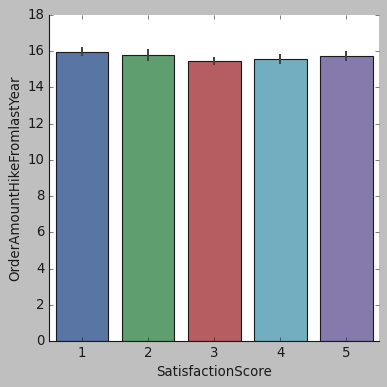

In [257]:
sns.catplot(x="SatisfactionScore", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

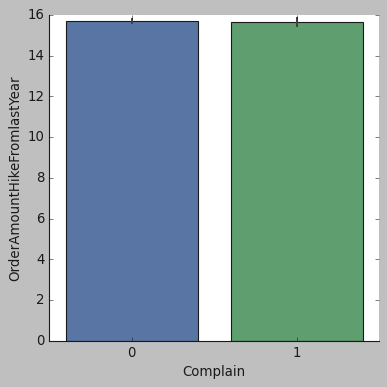

In [258]:
sns.catplot(x="Complain", y="OrderAmountHikeFromlastYear", data=churn,kind="bar")

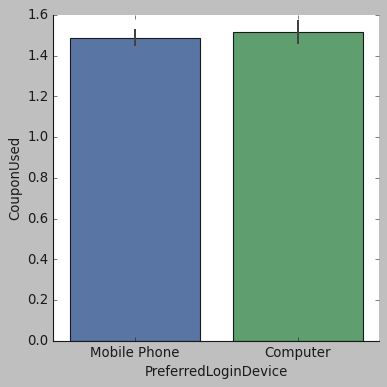

In [259]:
sns.catplot(x="PreferredLoginDevice", y="CouponUsed", data=churn,kind="bar")

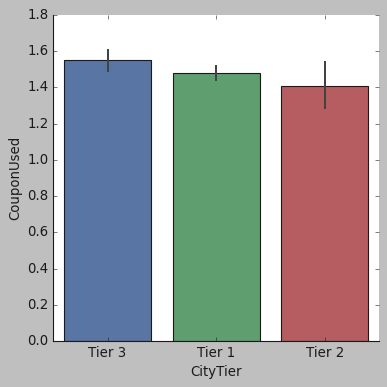

In [260]:
sns.catplot(x="CityTier", y="CouponUsed", data=churn,kind="bar")

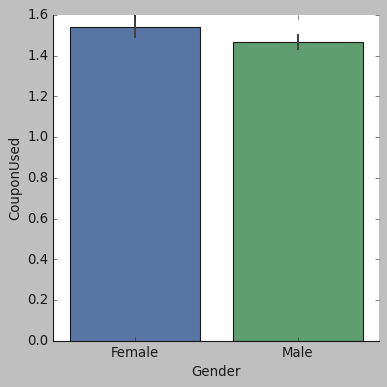

In [261]:
sns.catplot(x="Gender", y="CouponUsed", data=churn,kind="bar")

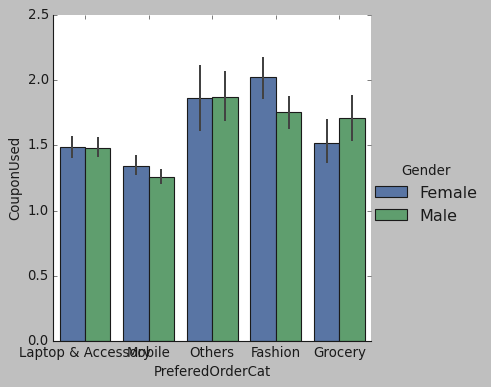

In [262]:
sns.catplot(x="PreferedOrderCat", y="CouponUsed", data=churn,kind="bar", hue="Gender")

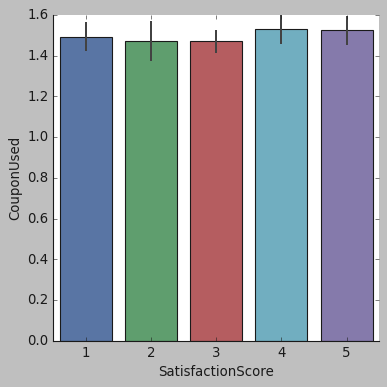

In [263]:
sns.catplot(x="SatisfactionScore", y="CouponUsed", data=churn,kind="bar")

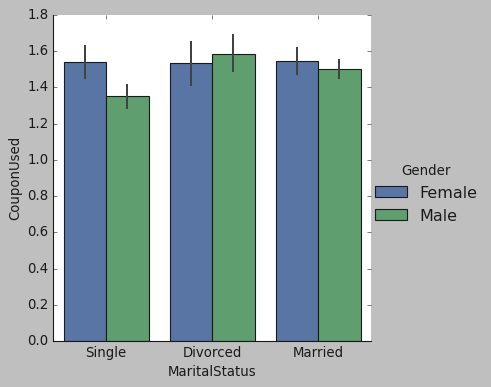

In [264]:
sns.catplot(x="MaritalStatus", y="CouponUsed", data=churn,kind="bar",hue="Gender")

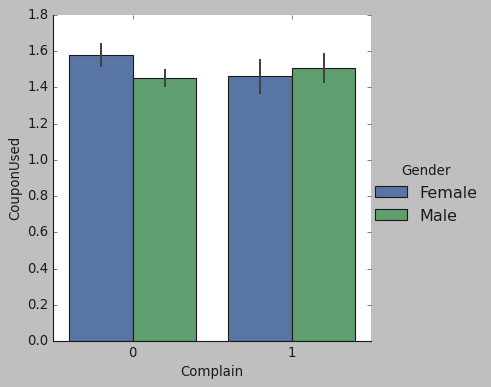

In [265]:
sns.catplot(x="Complain", y="CouponUsed", data=churn,kind="bar",hue="Gender")

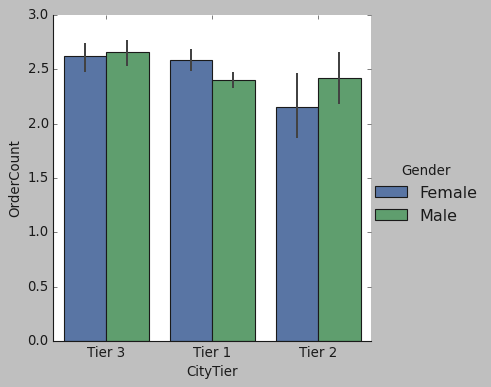

In [266]:
sns.catplot(x="CityTier", y="OrderCount", data=churn,kind="bar",hue="Gender")

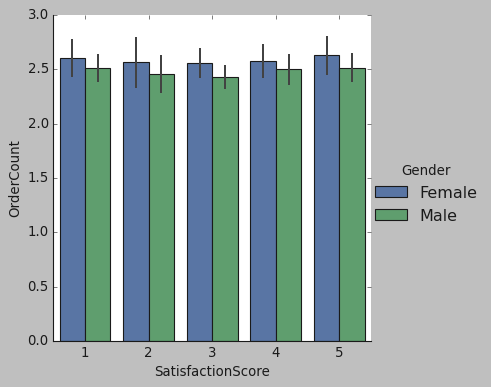

In [267]:
sns.catplot(x="SatisfactionScore", y="OrderCount", data=churn,kind="bar",hue="Gender")

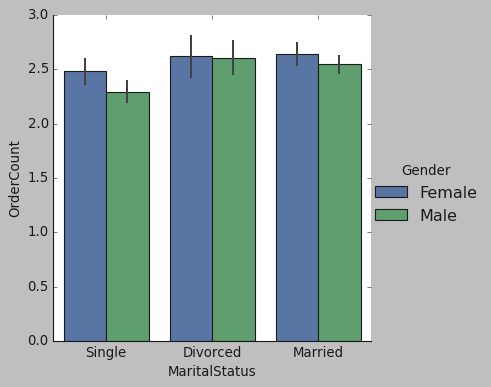

In [268]:
sns.catplot(x="MaritalStatus", y="OrderCount", data=churn,kind="bar",hue="Gender")

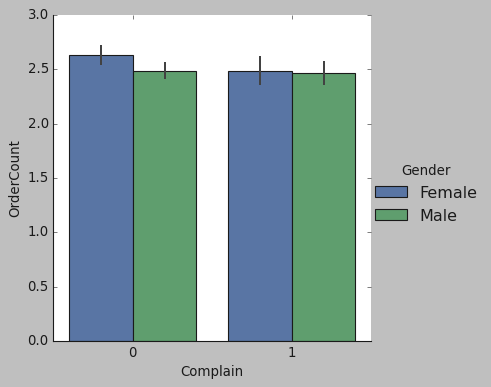

In [269]:
sns.catplot(x="Complain", y="OrderCount", data=churn,kind="bar",hue="Gender")

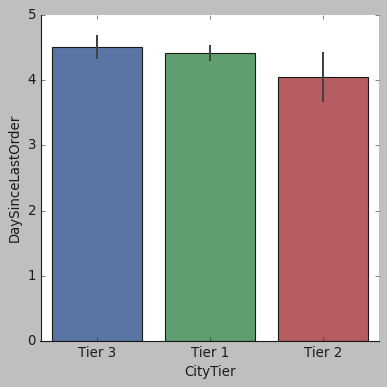

In [270]:
sns.catplot(x="CityTier", y="DaySinceLastOrder", data=churn,kind="bar")

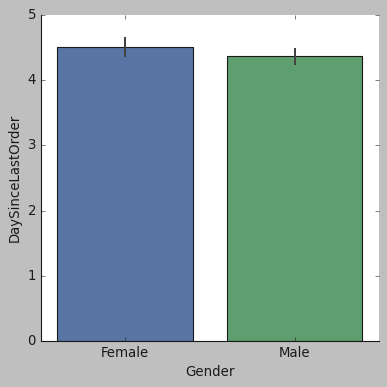

In [271]:
sns.catplot(x="Gender", y="DaySinceLastOrder", data=churn,kind="bar")

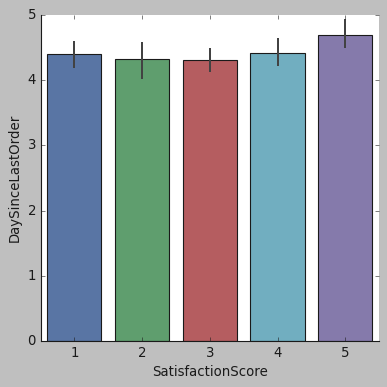

In [272]:
sns.catplot(x="SatisfactionScore", y="DaySinceLastOrder", data=churn,kind="bar")

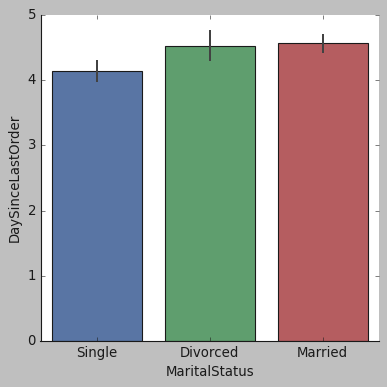

In [273]:
sns.catplot(x="MaritalStatus", y="DaySinceLastOrder", data=churn,kind="bar")

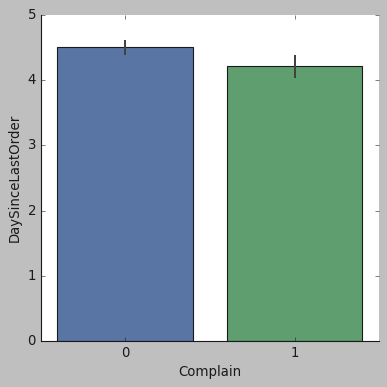

In [274]:
sns.catplot(x="Complain", y="DaySinceLastOrder", data=churn,kind="bar")

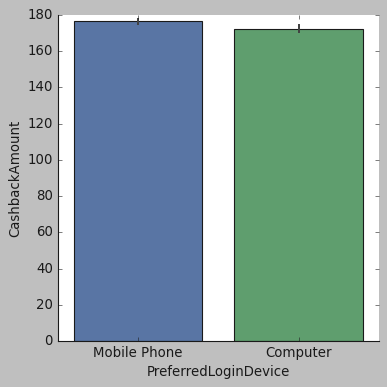

In [275]:
sns.catplot(x="PreferredLoginDevice", y="CashbackAmount", data=churn,kind="bar")

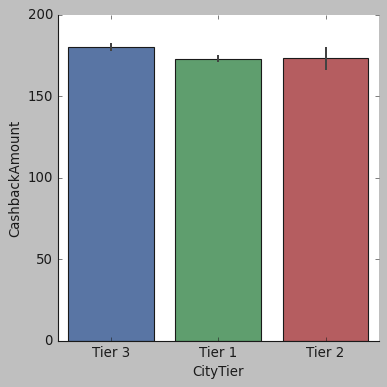

In [276]:
sns.catplot(x="CityTier", y="CashbackAmount", data=churn,kind="bar")

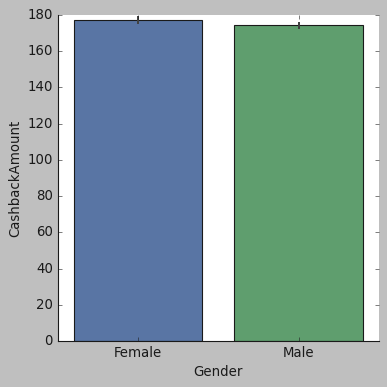

In [277]:
sns.catplot(x="Gender", y="CashbackAmount", data=churn,kind="bar")

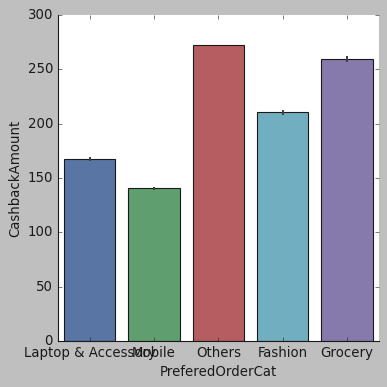

In [278]:
sns.catplot(x="PreferedOrderCat", y="CashbackAmount", data=churn,kind="bar")

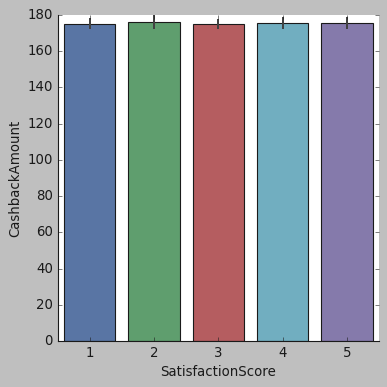

In [279]:
sns.catplot(x="SatisfactionScore", y="CashbackAmount", data=churn,kind="bar")

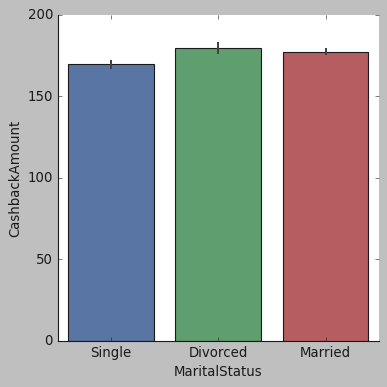

In [280]:
sns.catplot(x="MaritalStatus", y="CashbackAmount", data=churn,kind="bar")

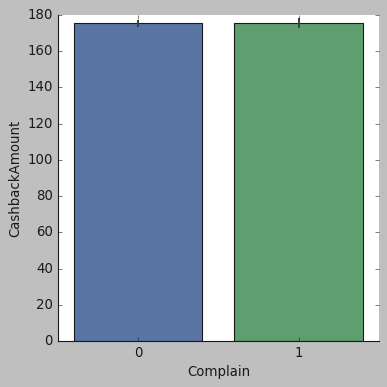

In [281]:
sns.catplot(x="Complain", y="CashbackAmount", data=churn,kind="bar")

### Between Two Categorical Variables

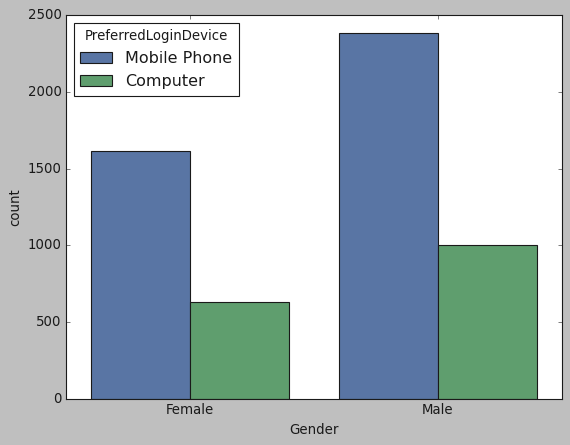

In [282]:
sns.countplot(x="Gender", hue="PreferredLoginDevice", data=churn)

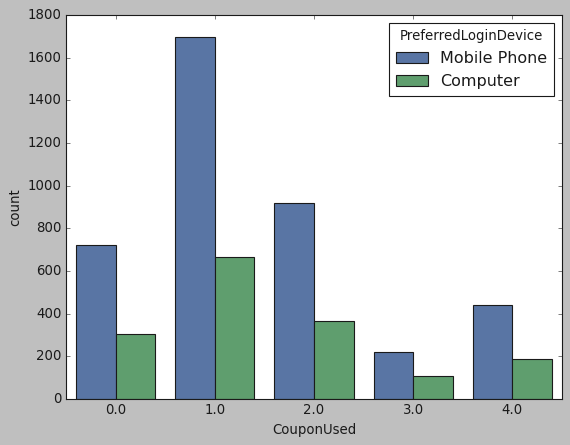

In [283]:
sns.countplot(x="CouponUsed", hue="PreferredLoginDevice", data=churn)

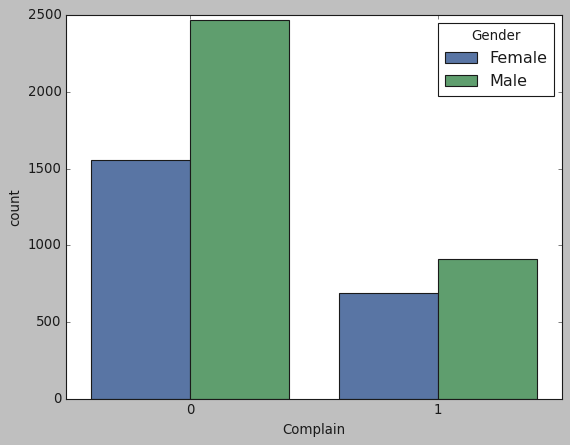

In [284]:
sns.countplot(x="Complain", hue="Gender", data=churn)

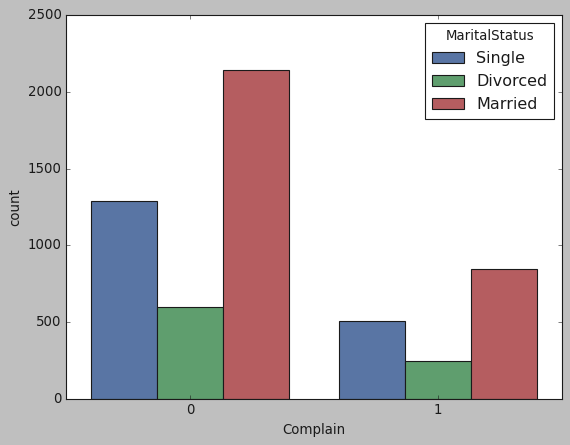

In [285]:
sns.countplot(x="Complain", hue="MaritalStatus", data=churn)

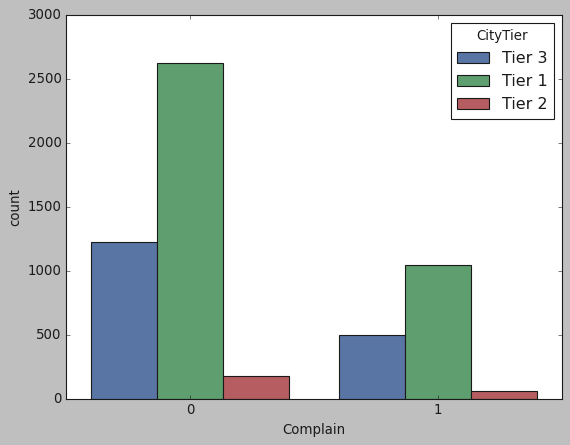

In [286]:
sns.countplot(x="Complain", hue="CityTier", data=churn)

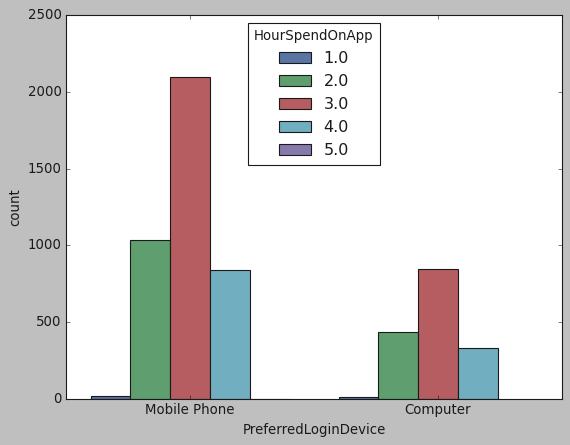

In [287]:
sns.countplot(x="PreferredLoginDevice", hue="HourSpendOnApp", data=churn)

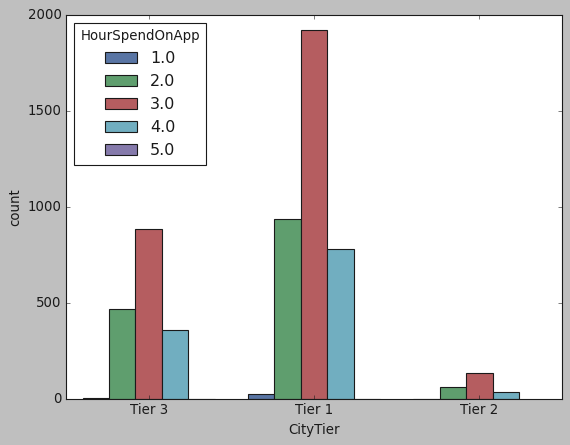

In [288]:
sns.countplot(x="CityTier", hue="HourSpendOnApp", data=churn)

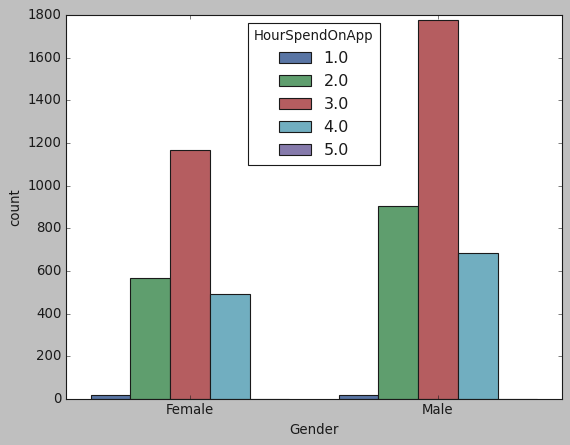

In [289]:
sns.countplot(x="Gender", hue="HourSpendOnApp", data=churn)

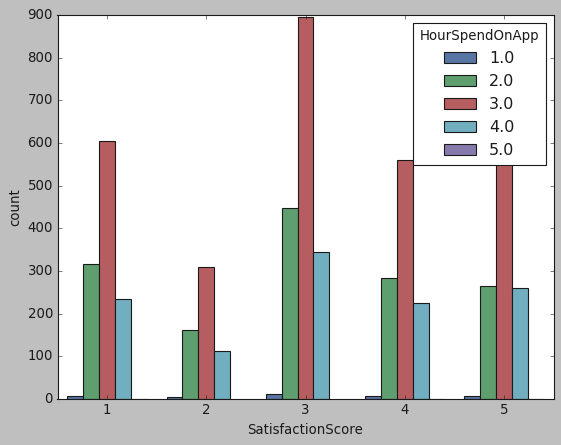

In [290]:
sns.countplot(x="SatisfactionScore", hue="HourSpendOnApp", data=churn)

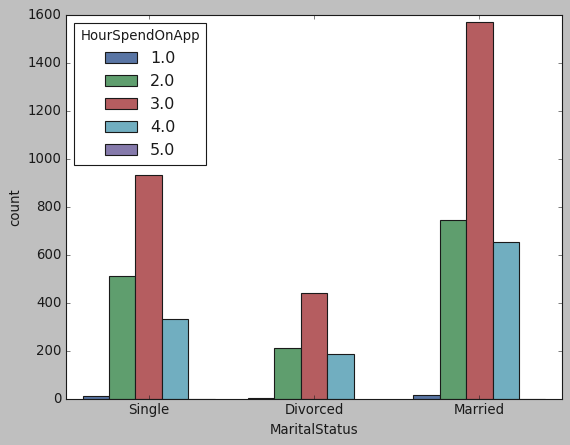

In [291]:
sns.countplot(x="MaritalStatus", hue="HourSpendOnApp", data=churn)

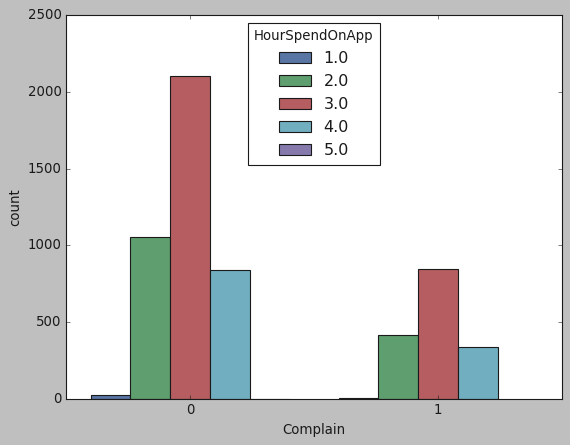

In [292]:
sns.countplot(x="Complain", hue="HourSpendOnApp", data=churn)

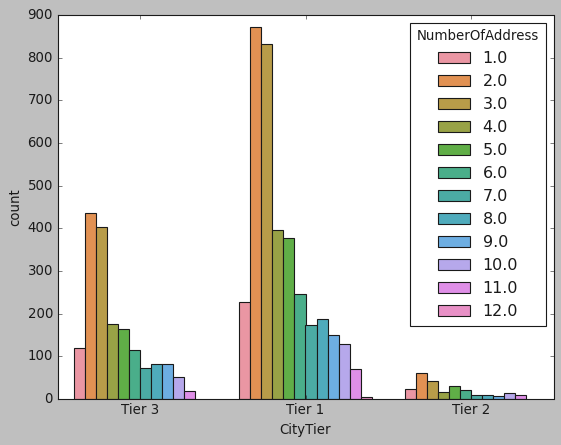

In [293]:
sns.countplot(x="CityTier", hue="NumberOfAddress", data=churn)

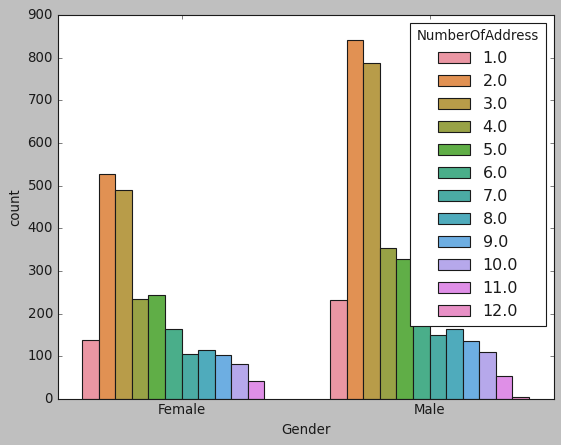

In [294]:
sns.countplot(x="Gender", hue="NumberOfAddress", data=churn)

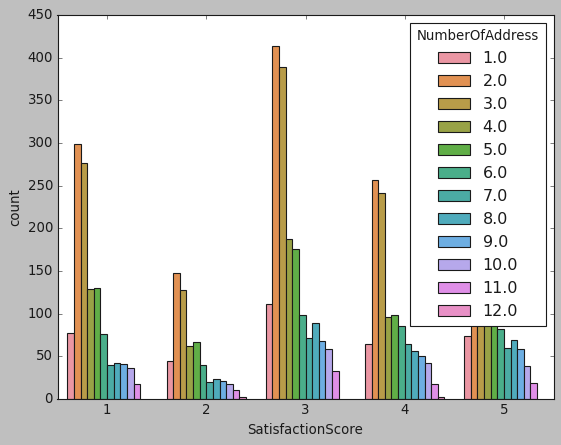

In [295]:
sns.countplot(x="SatisfactionScore", hue="NumberOfAddress", data=churn)

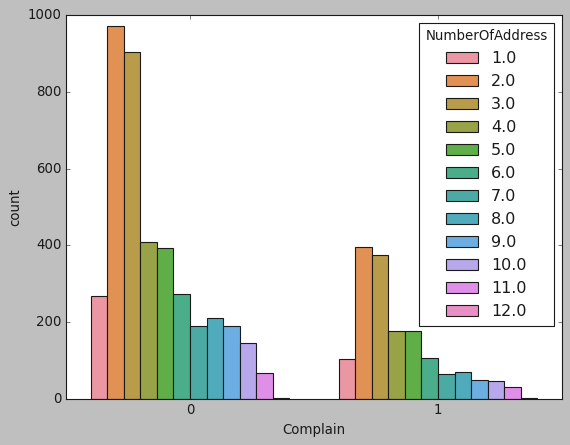

In [296]:
sns.countplot(x="Complain", hue="NumberOfAddress", data=churn)

### Feature Creation 

In [297]:
def get_category(x):
    val = ""
    if x < 2:
        val = "Very Recent"
    elif x >=2 and x <= 4:
        val = "Recent"
    elif x >=5 and x <=7:
        val = "Old"
    else: 
        val = "Very Old"
    return val

In [298]:
churn['Customer_Category'] = churn['Tenure'].apply(lambda x:get_category(x))

In [299]:
churn['Customer_Category'].value_counts()

Very Old       3767
Very Recent     690
Old             608
Recent          565
Name: Customer_Category, dtype: int64

In [300]:
def get_distance(x):
    val = ""
    if x < 10:
        val = "Very Near"
    elif x >=10 and x < 20:
        val = "Near"
    elif x >= 20 and x < 30:
        val = "Far"
    else: 
        val = "Very Far"
    return val

In [301]:
churn['WarehouseToHome'] = churn['WarehouseToHome'].apply(lambda x:get_distance(x))

In [302]:
churn['WarehouseToHome'].value_counts()

Near         2518
Very Near    1695
Far           852
Very Far      565
Name: WarehouseToHome, dtype: int64

In [303]:
def get_time(x):
    val = ""
    if x >= 4:
        val = "High"
    elif x >=2 and x <= 3:
        val = "Medium"
    else: 
        val = "Low"
    return val

In [304]:
churn['HourSpendOnApp'] = churn['HourSpendOnApp'].apply(lambda x:get_time(x))

In [305]:
churn['HourSpendOnApp'].value_counts()

Medium    4416
High      1179
Low         35
Name: HourSpendOnApp, dtype: int64

In [306]:
def get_device(x):
    val = ""
    if x == 1:
        val = "Single"
    else: 
        val = "Multiple"
    return val

In [307]:
churn['NumberOfDeviceRegistered'] = churn['NumberOfDeviceRegistered'].apply(lambda x:get_device(x))

In [308]:
churn['NumberOfDeviceRegistered'].value_counts()

Multiple    5395
Single       235
Name: NumberOfDeviceRegistered, dtype: int64

In [309]:
def get_addresses(x):
    val = ""
    if x >= 8:
        val = "More Than 8"
    elif x < 8 and x >= 4:
        val = "4 to 7"
    else: 
        val = "Less Than 4"
    return val

In [310]:
churn['NumberOfAddress'] = churn['NumberOfAddress'].apply(lambda x:get_addresses(x))

In [311]:
churn['NumberOfAddress'].value_counts()

Less Than 4    3018
4 to 7         1797
More Than 8     815
Name: NumberOfAddress, dtype: int64

In [312]:
def get_coupons(x):
    val = ""
    if x > 0:
        val = "Yes"
    else: 
        val = "No"
    return val

In [313]:
churn['CouponUsed'] = churn['CouponUsed'].apply(lambda x:get_coupons(x))

In [314]:
churn['CouponUsed'].value_counts()

Yes    4600
No     1030
Name: CouponUsed, dtype: int64

In [315]:
def get_activity(x):
    val = ""
    if x > 10:
        val = "Inactive"
    elif x <= 10 and x >= 5:
        val = "Active"
    else: 
        val = "Very Active"
    return val

In [316]:
churn['User_Activity'] = churn['DaySinceLastOrder'].apply(lambda x:get_activity(x))

In [317]:
churn['User_Activity'].value_counts()

Very Active    3540
Active         1782
Inactive        308
Name: User_Activity, dtype: int64

In [318]:
churn.OrderCount.value_counts()

2.0    2283
1.0    1751
6.0     840
3.0     371
4.0     204
5.0     181
Name: OrderCount, dtype: int64

In [319]:
def get_order_vol(x):
    val = ""
    if x >= 5 and x <= 6:
        val = "High"
    elif x >= 3 and x <= 4:
        val = "Medium"
    else: 
        val = "Low"
    return val

In [320]:
churn['Order_Volume'] = churn['OrderCount'].apply(lambda x:get_order_vol(x))

In [321]:
churn['Order_Volume'].value_counts()

Low       4034
High      1021
Medium     575
Name: Order_Volume, dtype: int64

In [322]:
churn = churn.drop(['Tenure','DaySinceLastOrder','OrderCount'],axis=1)

In [323]:
churn.head(5)

Churn PreferredLoginDevice CityTier WarehouseToHome PreferredPaymentMode  \
0     1         Mobile Phone   Tier 3       Very Near           Debit Card   
1     1         Mobile Phone   Tier 1       Very Near                  UPI   
2     1         Mobile Phone   Tier 1        Very Far           Debit Card   
3     1         Mobile Phone   Tier 3            Near           Debit Card   
4     1         Mobile Phone   Tier 1            Near                   CC   

   Gender HourSpendOnApp NumberOfDeviceRegistered    PreferedOrderCat  \
0  Female         Medium                 Multiple  Laptop & Accessory   
1    Male         Medium                 Multiple              Mobile   
2    Male         Medium                 Multiple              Mobile   
3    Male         Medium                 Multiple  Laptop & Accessory   
4    Male         Medium                 Multiple              Mobile   

  SatisfactionScore MaritalStatus NumberOfAddress Complain  \
0                 2        Single     More Than 8        1   
1                 3        Single          4 to 7        1   
2                 3        Single          4 to 7        1   
3                 5        Single     More Than 8        0   
4                 5        Single     Less Than 4        0   

   OrderAmountHikeFromlastYear CouponUsed  CashbackAmount Customer_Category  \
0                         11.0        Yes          159.93            Recent   
1                         15.0         No          120.90          Very Old   
2                         14.0         No          120.28          Very Old   
3                         23.0         No          134.07          Very Old   
4                         11.0        Yes          129.60          Very Old   

  User_Activity Order_Volume  
0        Active          Low  
1   Very Active          Low  
2   Very Active          Low  
3   Very Active          Low  
4   Very Active          Low

In [324]:
cat=[]
num=[]
for i in churn.columns:
    if churn[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Churn', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain', 'CouponUsed', 'Customer_Category', 'User_Activity', 'Order_Volume']
['OrderAmountHikeFromlastYear', 'CashbackAmount']


In [325]:
churn[cat].describe().T

count unique           top  freq
Churn                     5630      2             0  4682
PreferredLoginDevice      5630      2  Mobile Phone  3996
CityTier                  5630      3        Tier 1  3666
WarehouseToHome           5630      4          Near  2518
PreferredPaymentMode      5630      5    Debit Card  2314
Gender                    5630      2          Male  3384
HourSpendOnApp            5630      3        Medium  4416
NumberOfDeviceRegistered  5630      2      Multiple  5395
PreferedOrderCat          5630      5        Mobile  2080
SatisfactionScore         5630      5             3  1698
MaritalStatus             5630      3       Married  2986
NumberOfAddress           5630      3   Less Than 4  3018
Complain                  5630      2             0  4026
CouponUsed                5630      2           Yes  4600
Customer_Category         5630      4      Very Old  3767
User_Activity             5630      3   Very Active  3540
Order_Volume              5630      3           Low  4034

In [326]:
churn[num].describe().T

count        mean        std   min     25%  \
OrderAmountHikeFromlastYear  5630.0   15.674600   3.591058  11.0   13.00   
CashbackAmount               5630.0  175.299805  44.014628  70.0  145.77   

                                50%       75%     max  
OrderAmountHikeFromlastYear   15.00   18.0000   26.00  
CashbackAmount               163.28  196.3925  272.32

In [327]:
#This DF will be used for cluster analysis later
churn_cluster_df = churn.copy()
churn_cluster_df.shape

(5630, 19)

In [328]:
churn_cluster_df.head(2)

Churn PreferredLoginDevice CityTier WarehouseToHome PreferredPaymentMode  \
0     1         Mobile Phone   Tier 3       Very Near           Debit Card   
1     1         Mobile Phone   Tier 1       Very Near                  UPI   

   Gender HourSpendOnApp NumberOfDeviceRegistered    PreferedOrderCat  \
0  Female         Medium                 Multiple  Laptop & Accessory   
1    Male         Medium                 Multiple              Mobile   

  SatisfactionScore MaritalStatus NumberOfAddress Complain  \
0                 2        Single     More Than 8        1   
1                 3        Single          4 to 7        1   

   OrderAmountHikeFromlastYear CouponUsed  CashbackAmount Customer_Category  \
0                         11.0        Yes          159.93            Recent   
1                         15.0         No          120.90          Very Old   

  User_Activity Order_Volume  
0        Active          Low  
1   Very Active          Low

In [329]:
churn_cluster_df.to_excel('clustered_data.xlsx',index=False)

### Insights

1. Which gender and marital status is churning more?<br>
A. Males and singles are churning more. 

2. Which City tier has the more churn?<br>
A. Teir 1 cities have more churn than any other tier.

3. Are customers with less tenure churning more?<br>
A. Yes, majority of the churned customers have relatively less tenure than those who have not churned.

4. Did the churned customers had complaints?<br>
A. There does not seem to be any relation with complaints as there are customers who have not churned but had complaint likewise most of the churned customers 
   did not have complaints.

5. What was the preferred order category for the poeple who churned?<br>
A. Most of the churned customers had mobile as their prefered order category followed by laptop and accessories

6. What was the satisfaction score for the customers who churned?<br>
A. Most of the churned customers had a satisfaction score of 3,4 and 5. That makes me beleive that 1 and 2 are the best scores.

7. Had the churned customers used any coupons?<br>
A. Yes, most of them had used 1 - 2 coupons and there is no trend with respect to coupons as customers who had not churned also used the same number of coupons.

8. What was the order count for the churned customers?<br>
A. With respect to order count also we do not see any particular difference between churned and customers who have not churned.

9. How long were the churned customers inactive?<br>
A. Majority of the customers were active so there does not seem to be an impact.

10. Was there any cashback for the churned customers?<br>
A.	Chruned customers had a lower cashback compared to the customers who did not churn.

11. Was there any significant pattern with oderhike from the last year for the churned customer?<br>
A. No, there is not any significant pattern.

12. How many address did the churned customer had?<br>
A. Most of the churned customers had more addresses registered than the customers who did not churn.

13.IS there a significant pattern with device registered for churned customers?<br>
A. Most of the churned customers had 3,4 and 5 device registered.

14. What is the warehousetohome distance for churned customers?<br>
A. Warehouse to home distance has been more for the churned customers than the customers who did not churn.

15. What has been the prefered login device for the churned customers?<br>
A. Mobile phones has been the prefered login device for the churned customers.

16. What has been the prefered payment mode for chruned customers?<br>
A. Debit card and credit card has been the prefered payment mode for the churned customers.

17. What is the trend seen with respect to tenure?<br>
A. Tenure seems to be a little higher in females than males.Tier 2 companies have a little highers tenure than others. Singles seem to have a shorter tenure.

18. What are the trends seen with respect to warehousetohome distance?<br>
A. Tier 2 companies have slightly less warehousetohome distance than others.

19. Are there any trends from the hoursspendonapp?<br>
A. There does not seem to be any pattern with hoursspendonapp.

20. What trends do we see with Numberofaddress?<br>
A. Tier 3 customers seem to have less number of adresses as compared to tier 1 and tier 2. Females seem to have more number of address registerd. Customers with 
complaints had less number of addresses.

21. What trends do we see with respect to orderamounthikefromlastyear and coupons used?<br>
A. Tier 1 city seems to have higher hike from last year whereas tier 3 customers were the ones who have used higher number of coupons. Females seem to be using
more coupons than males.Coupons have been used more for fashion category. Single males seem to use lesser number of coupons.

22. What trends do we see with order count?<br>
A. For tier 2 females have a lesser order count. Single males have lesser order count.

23. What treds do we see with activity levels of customer?<br>
A. Tier 1 and 3  customers see a lesser recent activity. Females ahve a higher inactivity time as compared to males. Singles are more active than married
and divorsed.

24. What trends do we see from the cashback amounts?<br>
A. Mobile phones ahve got a higher cashbacks.Tier 3 customers have got a higher cashback.Females ahve got a higher cashback.Grocery and others have got a higher 
cashback. Singles ahve got a lesser cashback.

25. What are the some other trends observed?<br>
1. Mobile phones ahve been the prefered login device irrespective of gender. 
2. Coupons have been used more on mobile device.Male customers have made more complaints than females.
3. Tier 1 cities had more complaints follwoed by Tier 3. 
4. Married customers seem to have more complaints.
5. Cmparitivley customers using computer are spending less time on app.

### Encoding Categorical Variables

In [330]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
churn.SatisfactionScore = le.fit_transform(churn.SatisfactionScore)
churn.WarehouseToHome =   le.fit_transform(churn.WarehouseToHome)
churn.HourSpendOnApp = le.fit_transform(churn.HourSpendOnApp)
churn.NumberOfDeviceRegistered = le.fit_transform(churn.NumberOfDeviceRegistered)
churn.NumberOfAddress = le.fit_transform(churn.NumberOfAddress)
churn.CouponUsed = le.fit_transform(churn.CouponUsed)
churn.Customer_Category = le.fit_transform(churn.Customer_Category)
churn.User_Activity = le.fit_transform(churn.User_Activity)
churn.Order_Volume = le.fit_transform(churn.Order_Volume)
churn.Complain = le.fit_transform(churn.Complain)

In [331]:
PreferredLoginDevice = pd.get_dummies(churn.PreferredLoginDevice,drop_first=True)
PreferredPaymentMode = pd.get_dummies(churn.PreferredPaymentMode,drop_first=True)
PreferedOrderCat = pd.get_dummies(churn.PreferedOrderCat,drop_first=True)
MaritalStatus = pd.get_dummies(churn.MaritalStatus,drop_first=True)
Gender = pd.get_dummies(churn.Gender,drop_first=True)
CityTier = pd.get_dummies(churn.CityTier,drop_first=True)

In [332]:
churn = churn.drop(['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus','Gender','CityTier'],axis=1)

In [333]:
churn = pd.concat((churn,PreferredLoginDevice),axis=1)
churn = pd.concat((churn,PreferredPaymentMode),axis=1)
churn = pd.concat((churn,PreferedOrderCat),axis=1)
churn = pd.concat((churn,MaritalStatus),axis=1)
churn = pd.concat((churn,Gender),axis=1)
churn = pd.concat((churn,CityTier),axis=1)

In [334]:
churn.columns

Index(['Churn', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'CashbackAmount', 'Customer_Category', 'User_Activity', 'Order_Volume',
       'Mobile Phone', 'COD', 'Debit Card', 'E wallet', 'UPI', 'Grocery',
       'Laptop & Accessory', 'Mobile', 'Others', 'Married', 'Single', 'Male',
       'Tier 2', 'Tier 3'],
      dtype='object')

In [335]:
churn["Churn"] = churn["Churn"].astype(int)

In [336]:
churn.columns = churn.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[', '_').str.replace(']', '').str.replace('-', '_').str.replace('.', '')

In [337]:
churn.head()

Churn  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0      1                3               2                         0   
1      1                3               2                         0   
2      1                2               2                         0   
3      1                1               2                         0   
4      1                1               2                         0   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  1                2         1                         11.0   
1                  2                0         1                         15.0   
2                  2                0         1                         14.0   
3                  4                2         0                         23.0   
4                  4                1         0                         11.0   

   CouponUsed  CashbackAmount  ...  UPI  Grocery  Laptop_and_Accessory  \
0           1          159.93  ...    0        0                     1   
1           0          120.90  ...    1        0                     0   
2           0          120.28  ...    0        0                     0   
3           0          134.07  ...    0        0                     1   
4           1          129.60  ...    0        0                     0   

   Mobile  Others  Married  Single  Male  Tier_2  Tier_3  
0       0       0        0       1     0       0       1  
1       1       0        0       1     1       0       0  
2       1       0        0       1     1       0       0  
3       0       0        0       1     1       0       1  
4       1       0        0       1     1       0       0  

[5 rows x 27 columns]

In [338]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int32  
 1   WarehouseToHome              5630 non-null   int32  
 2   HourSpendOnApp               5630 non-null   int32  
 3   NumberOfDeviceRegistered     5630 non-null   int32  
 4   SatisfactionScore            5630 non-null   int32  
 5   NumberOfAddress              5630 non-null   int32  
 6   Complain                     5630 non-null   int32  
 7   OrderAmountHikeFromlastYear  5630 non-null   float64
 8   CouponUsed                   5630 non-null   int32  
 9   CashbackAmount               5630 non-null   float64
 10  Customer_Category            5630 non-null   int32  
 11  User_Activity                5630 non-null   int32  
 12  Order_Volume                 5630 non-null   int32  
 13  Mobile_Phone      

### Clustering

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
churn_std = scaler.fit_transform(churn)

1 : 152010.0000000004
2 : 140336.14901767473
3 : 131887.47491523702
4 : 125822.00858839211
5 : 119965.88380653766
6 : 116103.96362390716
7 : 111353.9285634409
8 : 107141.50969582488
9 : 103831.44948758825
10 : 100097.08053456523
11 : 98439.71308464189
12 : 96665.59219673547
13 : 93989.43055801094
14 : 93676.03452188858
15 : 92078.76010043728
16 : 91079.78322448219
17 : 89943.4023389387
18 : 89610.75587426871
19 : 88483.28454489874


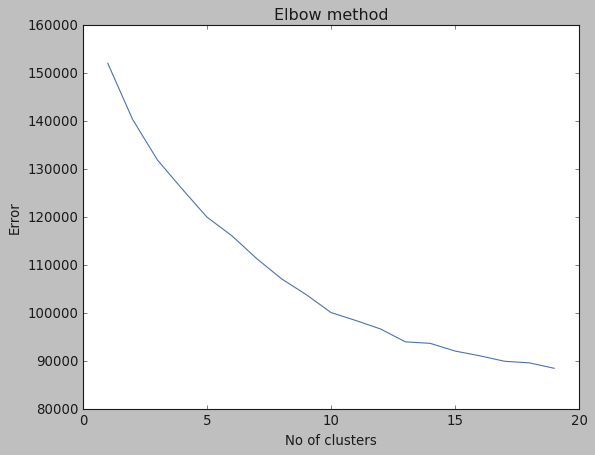

In [340]:
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i).fit(churn_std)
    kmeans.fit(churn_std)
    print("{} : {}".format(i,kmeans.inertia_))
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 20), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [341]:
clt = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
model = clt.fit_predict(churn_std)

In [342]:
len(model)

5630

In [343]:
churn_cluster_df['clusterNo'] = model

In [344]:
churn_cluster_df.head()

Churn PreferredLoginDevice CityTier WarehouseToHome PreferredPaymentMode  \
0     1         Mobile Phone   Tier 3       Very Near           Debit Card   
1     1         Mobile Phone   Tier 1       Very Near                  UPI   
2     1         Mobile Phone   Tier 1        Very Far           Debit Card   
3     1         Mobile Phone   Tier 3            Near           Debit Card   
4     1         Mobile Phone   Tier 1            Near                   CC   

   Gender HourSpendOnApp NumberOfDeviceRegistered    PreferedOrderCat  \
0  Female         Medium                 Multiple  Laptop & Accessory   
1    Male         Medium                 Multiple              Mobile   
2    Male         Medium                 Multiple              Mobile   
3    Male         Medium                 Multiple  Laptop & Accessory   
4    Male         Medium                 Multiple              Mobile   

  SatisfactionScore MaritalStatus NumberOfAddress Complain  \
0                 2        Single     More Than 8        1   
1                 3        Single          4 to 7        1   
2                 3        Single          4 to 7        1   
3                 5        Single     More Than 8        0   
4                 5        Single     Less Than 4        0   

   OrderAmountHikeFromlastYear CouponUsed  CashbackAmount Customer_Category  \
0                         11.0        Yes          159.93            Recent   
1                         15.0         No          120.90          Very Old   
2                         14.0         No          120.28          Very Old   
3                         23.0         No          134.07          Very Old   
4                         11.0        Yes          129.60          Very Old   

  User_Activity Order_Volume  clusterNo  
0        Active          Low          0  
1   Very Active          Low          1  
2   Very Active          Low          1  
3   Very Active          Low          0  
4   Very Active          Low          1

In [345]:
churn_cluster_df.to_excel('clustered_data.xlsx',index=False)

### Cluster Profiling

In [346]:
churn_cluster_df.groupby('clusterNo')['PreferredLoginDevice'].value_counts().sort_index()

clusterNo  PreferredLoginDevice
0          Computer                 867
           Mobile Phone            1986
1          Computer                 605
           Mobile Phone            1500
2          Computer                 162
           Mobile Phone             510
Name: PreferredLoginDevice, dtype: int64

In [347]:
churn_cluster_df.groupby('clusterNo')['CityTier'].value_counts().sort_index()

clusterNo  CityTier
0          Tier 1      1541
           Tier 2        64
           Tier 3      1248
1          Tier 1      1671
           Tier 2       138
           Tier 3       296
2          Tier 1       454
           Tier 2        40
           Tier 3       178
Name: CityTier, dtype: int64

In [348]:
churn_cluster_df.groupby('clusterNo')['WarehouseToHome'].value_counts().sort_index()

clusterNo  WarehouseToHome
0          Far                 471
           Near               1237
           Very Far            329
           Very Near           816
1          Far                 295
           Near               1039
           Very Far            154
           Very Near           617
2          Far                  86
           Near                242
           Very Far             82
           Very Near           262
Name: WarehouseToHome, dtype: int64

In [349]:
churn_cluster_df.groupby('clusterNo')['PreferredPaymentMode'].value_counts().sort_index()

clusterNo  PreferredPaymentMode
0          CC                       824
           COD                      233
           Debit Card              1142
           E wallet                 460
           UPI                      194
1          CC                       718
           COD                      245
           Debit Card               888
           E wallet                  80
           UPI                      174
2          CC                       232
           COD                       36
           Debit Card               284
           E wallet                  74
           UPI                       46
Name: PreferredPaymentMode, dtype: int64

In [350]:
churn_cluster_df.groupby('clusterNo')['Gender'].value_counts().sort_index()

clusterNo  Gender
0          Female    1186
           Male      1667
1          Female     776
           Male      1329
2          Female     284
           Male       388
Name: Gender, dtype: int64

In [351]:
churn_cluster_df.groupby('clusterNo')['HourSpendOnApp'].value_counts().sort_index()

clusterNo  HourSpendOnApp
0          High               600
           Low                 24
           Medium            2229
1          High               461
           Low                  6
           Medium            1638
2          High               118
           Low                  5
           Medium             549
Name: HourSpendOnApp, dtype: int64

In [352]:
churn_cluster_df.groupby('clusterNo')['NumberOfDeviceRegistered'].value_counts().sort_index()

clusterNo  NumberOfDeviceRegistered
0          Multiple                    2745
           Single                       108
1          Multiple                    2008
           Single                        97
2          Multiple                     642
           Single                        30
Name: NumberOfDeviceRegistered, dtype: int64

In [353]:
churn_cluster_df.groupby('clusterNo')['PreferedOrderCat'].value_counts().sort_index()

clusterNo  PreferedOrderCat  
0          Fashion                799
           Grocery                  2
           Laptop & Accessory    2050
           Mobile                   2
1          Fashion                 27
           Mobile                2078
2          Grocery                408
           Others                 264
Name: PreferedOrderCat, dtype: int64

In [354]:
churn_cluster_df.groupby('clusterNo')['SatisfactionScore'].value_counts().sort_index()

clusterNo  SatisfactionScore
0          1                    611
           2                    297
           3                    864
           4                    506
           5                    575
1          1                    421
           2                    217
           3                    632
           4                    422
           5                    413
2          1                    132
           2                     72
           3                    202
           4                    146
           5                    120
Name: SatisfactionScore, dtype: int64

In [355]:
churn_cluster_df.groupby('clusterNo')['MaritalStatus'].value_counts().sort_index()

clusterNo  MaritalStatus
0          Divorced          421
           Married          1599
           Single            833
1          Divorced          297
           Married          1009
           Single            799
2          Divorced          130
           Married           378
           Single            164
Name: MaritalStatus, dtype: int64

In [356]:
churn_cluster_df.groupby('clusterNo')['NumberOfAddress'].value_counts().sort_index()

clusterNo  NumberOfAddress
0          4 to 7              993
           Less Than 4        1409
           More Than 8         451
1          4 to 7              491
           Less Than 4        1374
           More Than 8         240
2          4 to 7              313
           Less Than 4         235
           More Than 8         124
Name: NumberOfAddress, dtype: int64

In [357]:
churn_cluster_df.groupby('clusterNo')['Complain'].value_counts().sort_index()

clusterNo  Complain
0          0           2065
           1            788
1          0           1483
           1            622
2          0            478
           1            194
Name: Complain, dtype: int64

In [358]:
churn_cluster_df.groupby('clusterNo')['CouponUsed'].value_counts().sort_index()

clusterNo  CouponUsed
0          No             541
           Yes           2312
1          No             441
           Yes           1664
2          No              48
           Yes            624
Name: CouponUsed, dtype: int64

In [359]:
churn_cluster_df.groupby('clusterNo')['Customer_Category'].value_counts().sort_index()

clusterNo  Customer_Category
0          Old                   384
           Recent                324
           Very Old             1919
           Very Recent           226
1          Old                   206
           Recent                225
           Very Old             1212
           Very Recent           462
2          Old                    18
           Recent                 16
           Very Old              636
           Very Recent             2
Name: Customer_Category, dtype: int64

In [360]:
churn_cluster_df.groupby('clusterNo')['User_Activity'].value_counts().sort_index()

clusterNo  User_Activity
0          Active           1139
           Inactive          150
           Very Active      1564
1          Active            366
           Inactive           26
           Very Active      1713
2          Active            277
           Inactive          132
           Very Active       263
Name: User_Activity, dtype: int64

In [361]:
churn_cluster_df.groupby('clusterNo')['Order_Volume'].value_counts().sort_index()

clusterNo  Order_Volume
0          High             620
           Low             1952
           Medium           281
1          High             170
           Low             1709
           Medium           226
2          High             231
           Low              373
           Medium            68
Name: Order_Volume, dtype: int64

In [362]:
churn_cluster_df.clusterNo.value_counts().sort_index()

0    2853
1    2105
2     672
Name: clusterNo, dtype: int64

In [363]:
clust_profile=churn_cluster_df.groupby('clusterNo').mean()
clust_profile['freq']=churn_cluster_df.clusterNo.value_counts().sort_index()
clust_profile

OrderAmountHikeFromlastYear  CashbackAmount  freq
clusterNo                                                   
0                            15.691202      179.499699  2853
1                            15.798575      140.943259  2105
2                            15.215774      265.088839   672

### Checking for Correlations

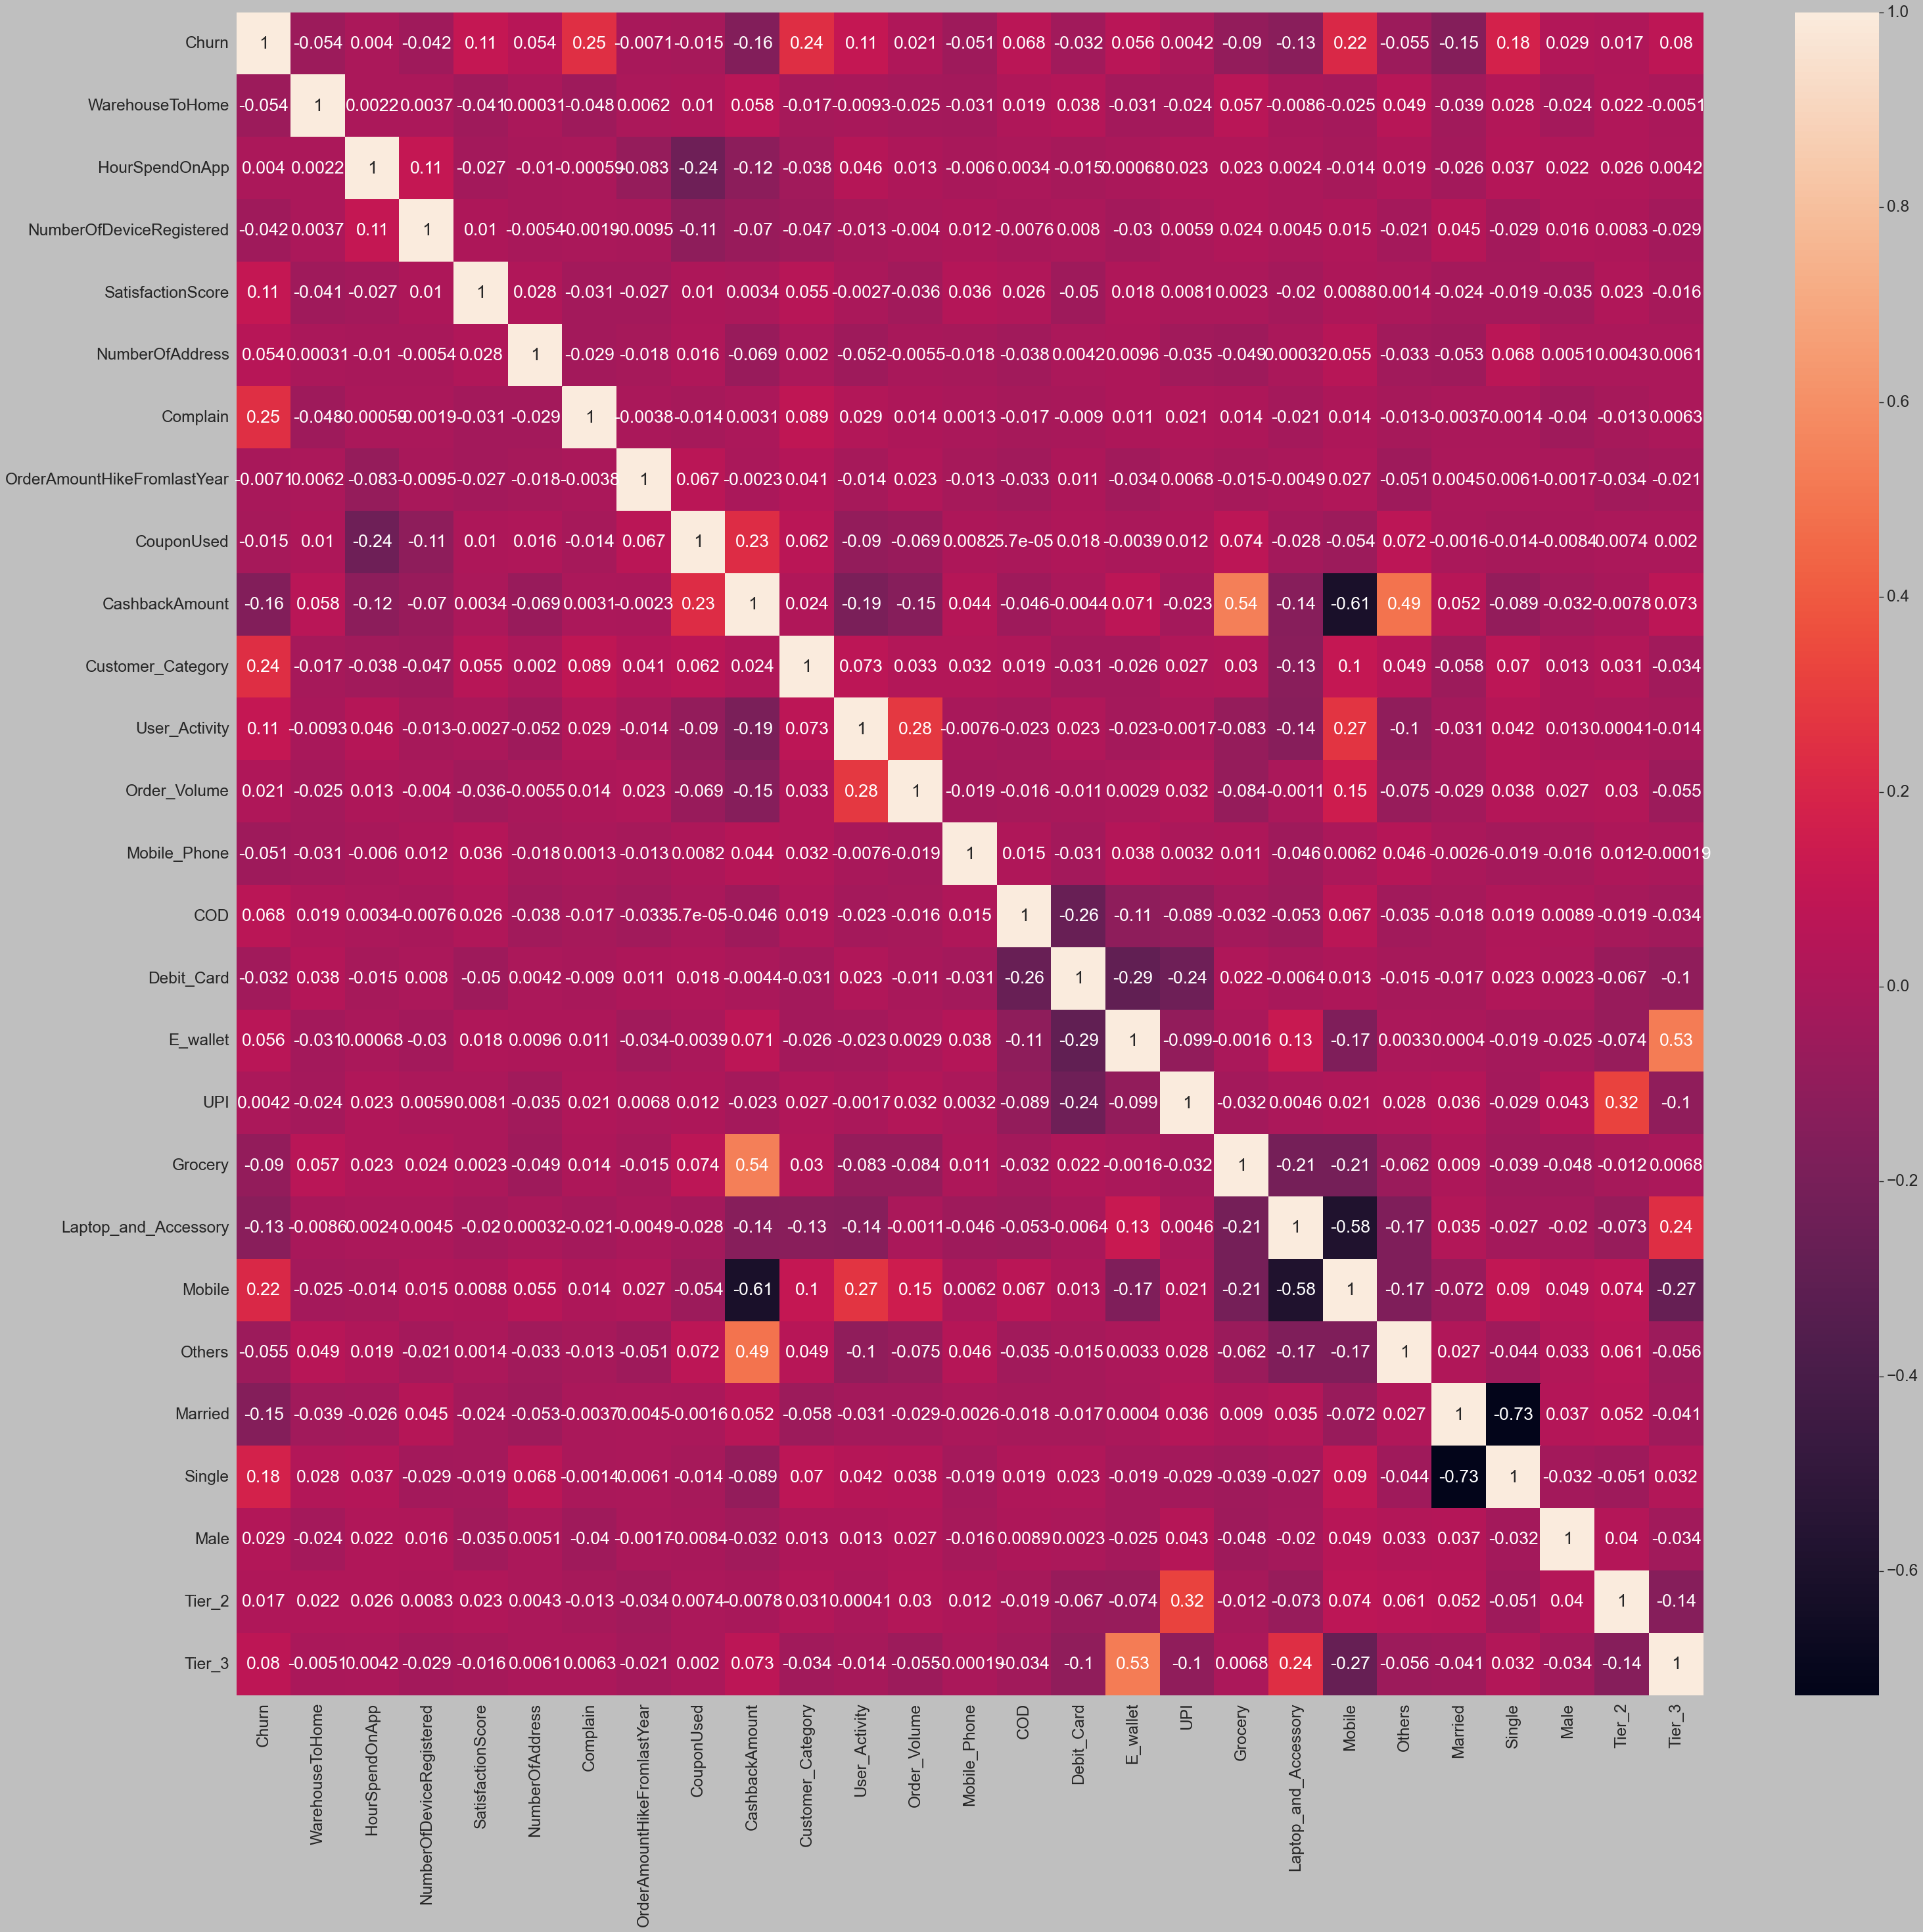

In [364]:
# construct heatmap with only continuous variables
plt.figure(figsize=(45,40))
sns.set(font_scale=2)
sns.heatmap(churn.corr(), annot=True)

In [365]:
results_path = 'results.png'
#print(results_path)
plt.savefig(results_path, dpi=400)

<Figure size 640x480 with 0 Axes>

There is hardly any correlation between the variables

### Train Test Split

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
#Extract x and y
y = churn['Churn']
X = churn.drop(['Churn'], axis=1)

In [368]:
X.head()

WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0                3               2                         0   
1                3               2                         0   
2                2               2                         0   
3                1               2                         0   
4                1               2                         0   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  1                2         1                         11.0   
1                  2                0         1                         15.0   
2                  2                0         1                         14.0   
3                  4                2         0                         23.0   
4                  4                1         0                         11.0   

   CouponUsed  CashbackAmount  Customer_Category  ...  UPI  Grocery  \
0           1          159.93                  1  ...    0        0   
1           0          120.90                  2  ...    1        0   
2           0          120.28                  2  ...    0        0   
3           0          134.07                  2  ...    0        0   
4           1          129.60                  2  ...    0        0   

   Laptop_and_Accessory  Mobile  Others  Married  Single  Male  Tier_2  Tier_3  
0                     1       0       0        0       1     0       0       1  
1                     0       1       0        0       1     1       0       0  
2                     0       1       0        0       1     1       0       0  
3                     1       0       0        0       1     1       0       1  
4                     0       1       0        0       1     1       0       0  

[5 rows x 26 columns]

In [369]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int32

In [370]:
# Encode for string labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder().fit(y)
y = pd.DataFrame(label_encoder.transform(y),columns = ["Churn"])

In [371]:
#split data into 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=0)

In [372]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_test: ',X_test.shape)
print('y_test: ',y_test.shape)

X_train:  (3941, 26)
y_train:  (3941, 1)
X_test:  (1689, 26)
y_test:  (1689, 1)


### Balancing The DataSet

In [373]:
from imblearn.over_sampling import SMOTE

In [374]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [375]:
# Get the proportions
y_train['Churn'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Churn, dtype: float64

### Scaling the variables

In [376]:
from sklearn.preprocessing import StandardScaler

In [377]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [378]:
#Scale the training data
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)

In [379]:
X_train

WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0           -1.338474        0.538795                 -0.167347   
1           -1.338474        0.538795                 -0.167347   
2           -0.374560        0.538795                 -0.167347   
3           -1.338474        0.538795                 -0.167347   
4           -0.374560        0.538795                 -0.167347   
...               ...             ...                       ...   
6529         0.589353        0.538795                 -0.167347   
6530        -0.374560        0.538795                 -0.167347   
6531        -1.338474       -1.949182                 -0.167347   
6532         0.589353        0.538795                 -0.167347   
6533        -1.338474        0.538795                 -0.167347   

      SatisfactionScore  NumberOfAddress  Complain  \
0             -0.079533         0.348432 -0.676392   
1             -1.579308         0.348432 -0.676392   
2             -1.579308        -1.214132 -0.676392   
3             -0.079533        -1.214132 -0.676392   
4              0.670354         1.910996 -0.676392   
...                 ...              ...       ...   
6529          -0.079533         0.348432 -0.676392   
6530          -0.079533         0.348432 -0.676392   
6531           0.670354        -1.214132  1.478433   
6532          -0.079533        -1.214132 -0.676392   
6533          -1.579308        -1.214132 -0.676392   

      OrderAmountHikeFromlastYear  CouponUsed  CashbackAmount  \
0                       -1.007251    0.548703       -0.599906   
1                       -1.007251    0.548703       -0.939789   
2                       -0.183394    0.548703        0.011060   
3                       -1.007251    0.548703        1.506496   
4                       -0.183394    0.548703        2.517424   
...                           ...         ...             ...   
6529                    -1.008969    0.548703        1.221605   
6530                     0.637905    0.548703       -0.457136   
6531                     1.377008    0.548703        1.021862   
6532                    -0.478707   -1.822479       -1.157768   
6533                    -1.007251    0.548703        1.385682   

      Customer_Category  ...       UPI   Grocery  Laptop_and_Accessory  \
0              0.093074  ... -0.233198 -0.216674              1.609382   
1             -2.483824  ... -0.233198 -0.216674             -0.621357   
2              0.093074  ... -0.233198 -0.216674              1.609382   
3              0.093074  ... -0.233198 -0.216674             -0.621357   
4              0.093074  ... -0.233198 -0.216674             -0.621357   
...                 ...  ...       ...       ...                   ...   
6529          -1.195375  ... -0.233198 -0.216674             -0.621357   
6530           1.381524  ... -0.233198 -0.216674             -0.621357   
6531           0.093074  ... -0.233198 -0.216674             -0.621357   
6532           0.093074  ... -0.233198 -0.216674             -0.621357   
6533           0.093074  ... -0.233198 -0.216674             -0.621357   

        Mobile    Others   Married    Single      Male    Tier_2    Tier_3  
0    -0.910619 -0.183122 -0.775292  1.389734  0.873548 -0.179065 -0.624907  
1     1.098154 -0.183122  1.289836 -0.719562 -1.144756 -0.179065 -0.624907  
2    -0.910619 -0.183122  1.289836 -0.719562 -1.144756 -0.179065 -0.624907  
3    -0.910619 -0.183122 -0.775292 -0.719562 -1.144756 -0.179065 -0.624907  
4    -0.910619  5.460838 -0.775292  1.389734  0.873548  5.584549 -0.624907  
...        ...       ...       ...       ...       ...       ...       ...  
6529 -0.910619 -0.183122 -0.775292 -0.719562  0.873548 -0.179065 -0.624907  
6530  1.098154 -0.183122 -0.775292 -0.719562 -1.144756 -0.179065 -0.624907  
6531 -0.910619 -0.183122 -0.775292  1.389734 -1.144756 -0.179065  1.600238  
6532  1.098154 -0.183122 -0.775292  1.389734 -1.144756 -0.179065 -0.624907  
6533 -0.910619 -0.183122 -0.775292 

In [380]:
# Apply the transformation on the test data
X_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [381]:
X_test

WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0            1.553267        0.538795                 -0.167347   
1           -0.374560        0.538795                 -0.167347   
2           -0.374560       -1.949182                 -0.167347   
3           -0.374560        0.538795                 -0.167347   
4           -1.338474        0.538795                 -0.167347   
...               ...             ...                       ...   
1684        -0.374560        0.538795                 -0.167347   
1685        -0.374560        0.538795                 -0.167347   
1686        -1.338474       -1.949182                 -0.167347   
1687         1.553267       -0.705193                 -0.167347   
1688         1.553267        0.538795                 -0.167347   

      SatisfactionScore  NumberOfAddress  Complain  \
0              1.420241        -1.214132  1.478433   
1             -1.579308        -1.214132  1.478433   
2             -0.079533        -1.214132 -0.676392   
3              1.420241        -1.214132 -0.676392   
4             -0.829421        -1.214132 -0.676392   
...                 ...              ...       ...   
1684          -1.579308         0.348432  1.478433   
1685          -1.579308         0.348432  1.478433   
1686           1.420241        -1.214132  1.478433   
1687           1.420241         0.348432 -0.676392   
1688          -0.079533         0.348432 -0.676392   

      OrderAmountHikeFromlastYear  CouponUsed  CashbackAmount  \
0                       -1.281870   -1.822479       -0.971282   
1                       -1.281870    0.548703       -0.494767   
2                       -0.732632    0.548703        2.155496   
3                       -0.183394    0.548703       -0.544187   
4                       -1.007251    0.548703        1.224270   
...                           ...         ...             ...   
1684                    -0.183394    0.548703       -0.480959   
1685                    -0.183394    0.548703       -0.755191   
1686                     0.915082    0.548703        1.584987   
1687                     1.738939    0.548703        2.517424   
1688                    -0.458013    0.548703       -0.548548   

      Customer_Category  ...       UPI   Grocery  Laptop_and_Accessory  \
0             -2.483824  ...  4.288208 -0.216674             -0.621357   
1              0.093074  ... -0.233198 -0.216674             -0.621357   
2              0.093074  ... -0.233198 -0.216674             -0.621357   
3             -1.195375  ... -0.233198 -0.216674             -0.621357   
4              0.093074  ... -0.233198 -0.216674             -0.621357   
...                 ...  ...       ...       ...                   ...   
1684           1.381524  ... -0.233198 -0.216674             -0.621357   
1685           0.093074  ... -0.233198 -0.216674             -0.621357   
1686           0.093074  ... -0.233198 -0.216674             -0.621357   
1687           0.093074  ... -0.233198  4.615229             -0.621357   
1688           1.381524  ... -0.233198 -0.216674             -0.621357   

        Mobile    Others   Married    Single      Male    Tier_2    Tier_3  
0     1.098154 -0.183122 -0.775292  1.389734  0.873548 -0.179065 -0.624907  
1     1.098154 -0.183122  1.289836 -0.719562  0.873548 -0.179065 -0.624907  
2    -0.910619 -0.183122  1.289836 -0.719562 -1.144756 -0.179065 -0.624907  
3     1.098154 -0.183122 -0.775292  1.389734  0.873548 -0.179065 -0.624907  
4    -0.910619 -0.183122 -0.775292  1.389734  0.873548 -0.179065 -0.624907  
...        ...       ...       ...       ...       ...       ...       ...  
1684  1.098154 -0.183122 -0.775292  1.389734 -1.144756 -0.179065  1.600238  
1685  1.098154 -0.183122  1.289836 -0.719562  0.873548 -0.179065 -0.624907  
1686 -0.910619 -0.183122  1.289836 -0.719562  0.873548 -0.179065 -0.624907  
1687 -0.910619 -0.183122  1.289836 -0.719562 -1.144756 -0.179065 -0.624907  
1688  1.098154 -0.183122 -0.775292 

### Basic Models

#### Logistic Regression

In [382]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [383]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

LogisticRegression()

In [384]:
## Performance Matrix on train data set
y_train_predict = LR_model.predict(X_train)
model_score = LR_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8019589837771656
[[2582  685]
 [ 609 2658]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3267
           1       0.80      0.81      0.80      3267

    accuracy                           0.80      6534
   macro avg       0.80      0.80      0.80      6534
weighted avg       0.80      0.80      0.80      6534



In [385]:
from sklearn.metrics import accuracy_score 
lr_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
df
lr_train_acc= accuracy_score(y_train, y_train_predict)
lr_train_precision=round(df.loc["1"][0],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_f1=round(df.loc["1"][2],2)
print ('lr_train_accuracy ',lr_train_acc)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_accuracy  0.8019589837771656
lr_train_precision  0.8
lr_train_recall  0.81
lr_train_f1  0.8


AUC: 0.885


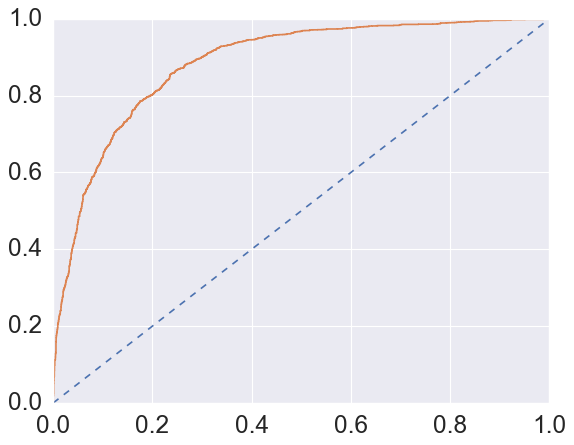

In [386]:
#AUC and ROC for the training data
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)

In [387]:
## Performance Matrix on test data set
y_test_predict = LR_model.predict(X_test)
model_score = LR_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7495559502664298
[[1109  306]
 [ 117  157]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1415
           1       0.34      0.57      0.43       274

    accuracy                           0.75      1689
   macro avg       0.62      0.68      0.63      1689
weighted avg       0.81      0.75      0.77      1689



In [388]:
from sklearn.metrics import accuracy_score 
lr_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
df
lr_test_acc= accuracy_score(y_test, y_test_predict)
lr_test_precision=round(df.loc["1"][0],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_f1=round(df.loc["1"][2],2)
print ('lr_test_accuracy ',lr_test_acc)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_accuracy  0.7495559502664298
lr_test_precision  0.34
lr_test_recall  0.57
lr_test_f1  0.43


AUC: 0.754


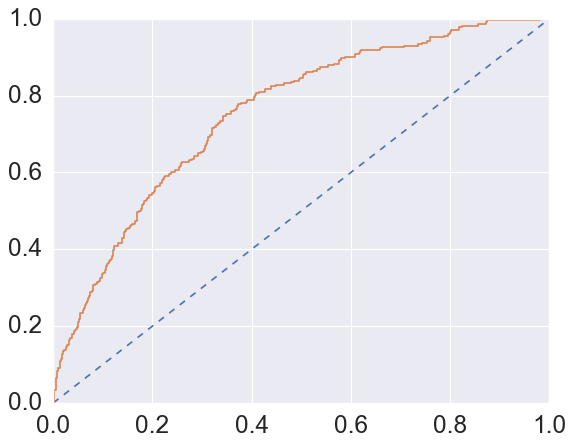

In [389]:
# AUC and ROC for the test data
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

In [390]:
#print(LR_model.coef_, LR_model.intercept_)
pd.DataFrame(zip(X_train.columns, np.transpose(LR_model.coef_.tolist()[0])), columns=['features', 'coef']).sort_values('coef', ascending=False)

features      coef
9             Customer_Category  0.673324
5                      Complain  0.541412
25                       Tier_3  0.305646
3             SatisfactionScore  0.169660
10                User_Activity  0.136570
24                       Tier_2 -0.005444
20                       Others -0.022650
23                         Male -0.032386
1                HourSpendOnApp -0.088558
4               NumberOfAddress -0.121562
6   OrderAmountHikeFromlastYear -0.134739
15                     E_wallet -0.151791
13                          COD -0.167782
7                    CouponUsed -0.169554
2      NumberOfDeviceRegistered -0.228690
17                      Grocery -0.283507
16                          UPI -0.295860
0               WarehouseToHome -0.297894
22                       Single -0.340258
11                 Order_Volume -0.355511
19                       Mobile -0.449060
12                 Mobile_Phone -0.464521
14                   Debit_Card -0.512213
8                CashbackAmount -0.804115
18         Laptop_and_Accessory -0.957665
21                      Married -0.991900

In [391]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test
Accuracy       0.80     0.75
AUC            0.89     0.75
Recall         0.81     0.57
Precision      0.80     0.34
F1 Score       0.80     0.43

### Decision Tree

In [392]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [393]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [394]:
## Performance Matrix on train data set
y_train_predict = dt_model.predict(X_train)
model_score = dt_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[3267    0]
 [   0 3267]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3267
           1       1.00      1.00      1.00      3267

    accuracy                           1.00      6534
   macro avg       1.00      1.00      1.00      6534
weighted avg       1.00      1.00      1.00      6534



In [395]:
from sklearn.metrics import accuracy_score 
dt_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
df
dt_train_acc= accuracy_score(y_train, y_train_predict)
dt_train_precision=round(df.loc["1"][0],2)
dt_train_recall=round(df.loc["1"][1],2)
dt_train_f1=round(df.loc["1"][2],2)
print ('dt_train_accuracy ',dt_train_acc)
print ('dt_train_precision ',dt_train_precision)
print ('dt_train_recall ',dt_train_recall)
print ('dt_train_f1 ',dt_train_f1)

dt_train_accuracy  1.0
dt_train_precision  1.0
dt_train_recall  1.0
dt_train_f1  1.0


AUC: 1.000


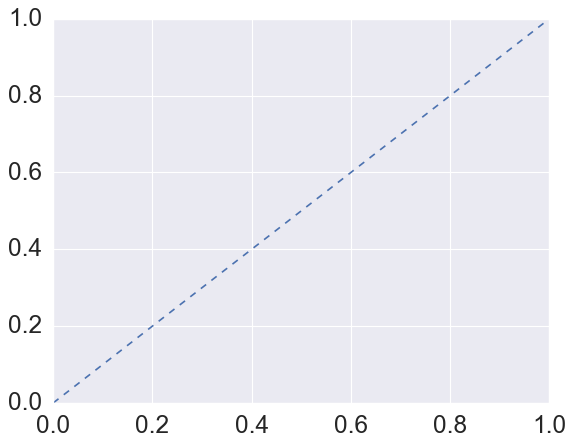

In [396]:
#AUC and ROC for the training data
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_train_auc)
# calculate roc curve
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_train_fpr, dt_train_tpr)

In [397]:
## Performance Matrix on test data set
y_test_predict = dt_model.predict(X_test)
model_score = dt_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8419182948490231
[[1238  177]
 [  90  184]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1415
           1       0.51      0.67      0.58       274

    accuracy                           0.84      1689
   macro avg       0.72      0.77      0.74      1689
weighted avg       0.86      0.84      0.85      1689



In [398]:
from sklearn.metrics import accuracy_score 
dt_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(dt_metrics).transpose()
df
dt_test_acc= accuracy_score(y_test, y_test_predict)
dt_test_precision=round(df.loc["1"][0],2)
dt_test_recall=round(df.loc["1"][1],2)
dt_test_f1=round(df.loc["1"][2],2)
print ('dt_test_accuracy ',dt_test_acc)
print ('dt_test_precision ',dt_test_precision)
print ('dt_test_recall ',dt_test_recall)
print ('dt_test_f1 ',dt_test_f1)

dt_test_accuracy  0.8419182948490231
dt_test_precision  0.51
dt_test_recall  0.67
dt_test_f1  0.58


AUC: 0.773


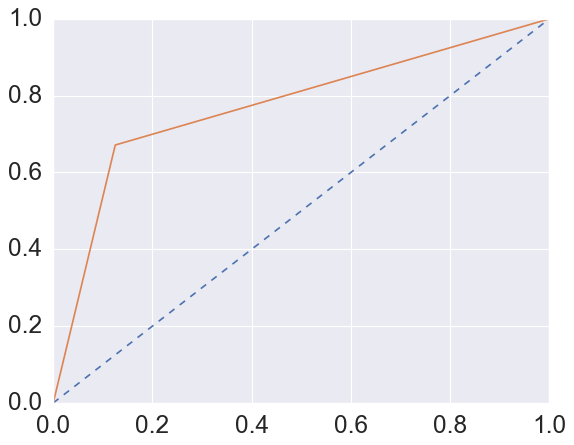

In [399]:
# AUC and ROC for the test data
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_test_auc)
# calculate roc curve
dt_test_fpr, dt_test_tpr, dt_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_test_fpr, dt_test_tpr)

In [400]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('G:\greatlearning\Capstone_Project\CC_EC_01 - Customer Churn - E-Commerce\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()

In [401]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

pd.DataFrame({'Variable':X_train.columns,
              'Importance':dt_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
8                CashbackAmount    0.234094
21                      Married    0.143128
6   OrderAmountHikeFromlastYear    0.108471
9             Customer_Category    0.076638
0               WarehouseToHome    0.053042
5                      Complain    0.049618
3             SatisfactionScore    0.043453
18         Laptop_and_Accessory    0.040720
25                       Tier_3    0.032386
12                 Mobile_Phone    0.028292
4               NumberOfAddress    0.022525
1                HourSpendOnApp    0.021587
22                       Single    0.018910
14                   Debit_Card    0.018478
10                User_Activity    0.015209
11                 Order_Volume    0.013678
7                    CouponUsed    0.012062
13                          COD    0.011989
16                          UPI    0.011797
23                         Male    0.010199
15                     E_wallet    0.009038
19                       Mobile    0.008779
24                       Tier_2    0.007004
2      NumberOfDeviceRegistered    0.005571
17                      Grocery    0.002184
20                       Others    0.001148

In [402]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'DT Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1]},index=index
       )
round(data,2)

DT Train  DT Test
Accuracy        1.0     0.84
AUC             1.0     0.77
Recall          1.0     0.67
Precision       1.0     0.51
F1 Score        1.0     0.58

In [403]:
eli5.explain_weights(dt_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator='DecisionTreeClassifier()', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='CashbackAmount', weight=0.23409374773878466, std=None, value=None), FeatureWeight(feature='Married', weight=0.14312785338637388, std=None, value=None), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.10847141444956082, std=None, value=None), FeatureWeight(feature='Customer_Category', weight=0.07663811449482001, std=None, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.05304179649840201, std=None, value=None), FeatureWeight(feature='Complain', weight=0.049617539112078696, std=None, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.04345288130620636, std=None, value=None), FeatureWeight(feature='Laptop_and_Accessory', weight=0.040720103940322105, std=None, value=None), FeatureWeight(feature='Tier_3', weight=0.03238594843900744, std=None, value=None), FeatureWeight(feature='Mobile_Phone', weight=0.028291798603356674, std=None, value=None), FeatureWeight(feature='NumberOfAddress', weight=0.022525000166858846, std=None, value=None), FeatureWeight(feature='HourSpendOnApp', weight=0.021586898161800986, std=None, value=None), FeatureWeight(feature='Single', weight=0.018910359414539356, std=None, value=None), FeatureWeight(feature='Debit_Card', weight=0.01847769557103058, std=None, value=None), FeatureWeight(feature='User_Activity', weight=0.015208768387060206, std=None, value=None), FeatureWeight(feature='Order_Volume', weight=0.013677902846800588, std=None, value=None), FeatureWeight(feature='CouponUsed', weight=0.012061838433029971, std=None, value=None), FeatureWeight(feature='COD', weight=0.011988623852813728, std=None, value=None), FeatureWeight(feature='UPI', weight=0.011796964519059224, std=None, value=None), FeatureWeight(feature='Male', weight=0.010199344757337647, std=None, value=None)], remaining=6), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[3267.0, 3267.0], value_ratio=[0.5, 0.5], impurity=0.5, samples=6534, sample_ratio=1.0, feature_name='Married', feature_id=21, threshold=0.2572718560695648, left=NodeInfo(id=1, is_leaf=False, value=[1442.0, 2639.0], value_ratio=[0.35334476843910806, 0.6466552315608919], impurity=0.45698448611164233, samples=4081, sample_ratio=0.6245791245791246, feature_name='Laptop_and_Accessory', feature_id=18, threshold=0.49401259422302246, left=NodeInfo(id=2, is_leaf=False, value=[889.0, 2217.0], value_ratio=[0.2862202189311011, 0.7137797810688989], impurity=0.40859641041226735, samples=3106, sample_ratio=0.475359657177839, feature_name='CashbackAmount', feature_id=8, threshold=1.5277445912361145, left=NodeInfo(id=3, is_leaf=False, value=[664.0, 2107.0], value_ratio=[0.23962468422952002, 0.76037531577048], impurity=0.3644093898748457, samples=2771, sample_ratio=0.4240893786348332, feature_name='Customer_Category', feature_id=9, threshold=0.7372989989817142, left=NodeInfo(id=4, is_leaf=False, value=[582.0, 1458.0], value_ratio=[0.2852941176470588, 0.7147058823529412], impurity=0.40780276816608996, samples=2040, sample_ratio=0.3122130394857668, feature_name='CouponUsed', feature_id=7, threshold=-0.6368876993656158, left=NodeInfo(id=5, is_leaf=False, value=[137.0, 671.0], value_ratio=[0.16955445544554457, 0.8304455445544554], impurity=0.2816114841682188, samples=808, sample_ratio=0.1236608509335782, feature_name='CashbackAmount', feature_id=8, threshold=0.9523840546607971, left=NodeInfo(id=6, is_leaf=False, value=[128.0, 671.0], value_ratio=[0.16020025031289112, 0.8397997496871089], impurity=0.2690722602251563, samples=799, sample_ratio=0.12228344046525864, feature_name='Tier_2', feature_id=24, threshold=2.7027419731020927, left=NodeInfo(id=7, is_leaf=False, value=[121.0, 671.0], value_ratio=[0.1527777777777778, 0.8472222

In [404]:
eli5.explain_prediction(dt_model, X_train.iloc[1], feature_names = list(X_train.columns)) 
# clf is the model fitted 
# X_train.iloc[1] is the record at index 1
# feature_names is the list of column names/features

Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='Male', weight=0.7777777777777778, std=None, value=-1.1447562015389174), FeatureWeight(feature='<BIAS>', weight=0.5, std=None, value=1.0), FeatureWeight(feature='Married', weight=0.24398695474928656, std=None, value=1.289836086502794), FeatureWeight(feature='HourSpendOnApp', weight=0.07634100736239335, std=None, value=0.538795194595626), FeatureWeight(feature='CashbackAmount', weight=0.06014741471932794, std=None, value=-0.9397887942408741), FeatureWeight(feature='Customer_Category', weight=0.05498931328235612, std=None, value=-2.483824145392262)], neg=[FeatureWeight(feature='Order_Volume', weight=-0.39181286549707606, std=None, value=-1.7816273801620177), FeatureWeight(feature='SatisfactionScore', weight=-0.17084863321093424, std=None, value=-1.579307543040338), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=-0.09628820430655693, std=None, value=-1.0072510209144836), FeatureWeight(feature='Laptop_and_Accessory', weight=-0.05429276487657453, std=None, value=-0.6213565844917213)], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### RandomForestClassifier

In [405]:
from sklearn.ensemble import RandomForestClassifier

In [406]:
rf_model = RandomForestClassifier(n_estimators = 501)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=501)

In [407]:
## Performance Matrix on train data set
y_train_predict = rf_model.predict(X_train)
model_score = rf_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[3267    0]
 [   0 3267]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3267
           1       1.00      1.00      1.00      3267

    accuracy                           1.00      6534
   macro avg       1.00      1.00      1.00      6534
weighted avg       1.00      1.00      1.00      6534



In [408]:
from sklearn.metrics import accuracy_score 
rf_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
df
rf_train_acc= accuracy_score(y_train, y_train_predict)
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_accuracy ',rf_train_acc)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_accuracy  1.0
rf_train_precision  1.0
rf_train_recall  1.0
rf_train_f1  1.0


AUC: 1.000


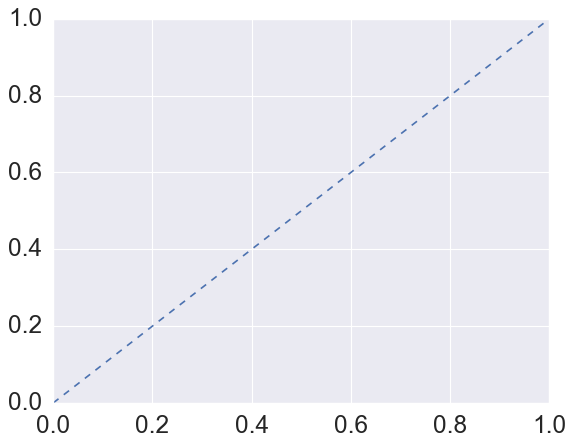

In [409]:
#AUC and ROC for the training data
# predict probabilities
probs = rf_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)

In [410]:
## Performance Matrix on test data set
y_test_predict = rf_model.predict(X_test)
model_score = rf_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9100059206631143
[[1335   80]
 [  72  202]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1415
           1       0.72      0.74      0.73       274

    accuracy                           0.91      1689
   macro avg       0.83      0.84      0.84      1689
weighted avg       0.91      0.91      0.91      1689



In [411]:
from sklearn.metrics import accuracy_score 
rf_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
df
rf_test_acc= accuracy_score(y_test, y_test_predict)
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('lr_test_accuracy ',rf_test_acc)
print ('lr_test_precision ',rf_test_precision)
print ('lr_test_recall ',rf_test_recall)
print ('lr_test_f1 ',rf_test_f1)

lr_test_accuracy  0.9100059206631143
lr_test_precision  0.72
lr_test_recall  0.74
lr_test_f1  0.73


AUC: 0.930


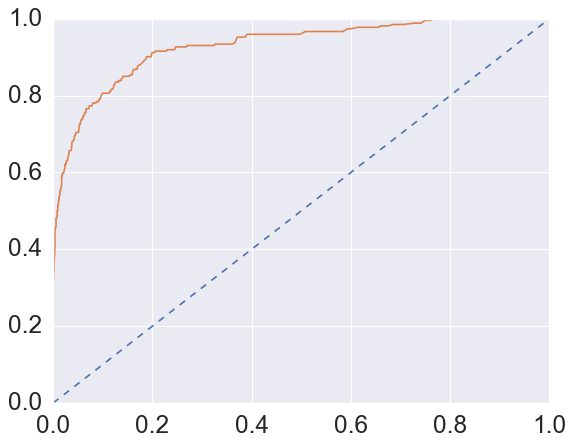

In [412]:
# AUC and ROC for the test data
# predict probabilities
probs = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)

In [413]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':rf_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
8                CashbackAmount    0.161927
21                      Married    0.101736
6   OrderAmountHikeFromlastYear    0.100233
9             Customer_Category    0.083746
0               WarehouseToHome    0.060444
3             SatisfactionScore    0.057451
18         Laptop_and_Accessory    0.044412
4               NumberOfAddress    0.037080
5                      Complain    0.036246
12                 Mobile_Phone    0.032624
14                   Debit_Card    0.031745
19                       Mobile    0.031301
11                 Order_Volume    0.028861
10                User_Activity    0.024864
22                       Single    0.023675
25                       Tier_3    0.023637
23                         Male    0.022757
7                    CouponUsed    0.017597
1                HourSpendOnApp    0.017487
17                      Grocery    0.012821
16                          UPI    0.011805
13                          COD    0.010949
15                     E_wallet    0.009371
24                       Tier_2    0.006854
2      NumberOfDeviceRegistered    0.005653
20                       Others    0.004724

In [414]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1]},index=index
       )
round(data,2)

RF Train  RF Test
Accuracy        1.0     0.91
AUC             1.0     0.93
Recall          1.0     0.74
Precision       1.0     0.72
F1 Score        1.0     0.73

In [415]:
eli5.explain_weights(rf_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator='RandomForestClassifier(n_estimators=501)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='CashbackAmount', weight=0.16192744773414958, std=0.024618244841539037, value=None), FeatureWeight(feature='Married', weight=0.1017356561819926, std=0.027472764230966687, value=None), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.10023317557761083, std=0.01219232016079837, value=None), FeatureWeight(feature='Customer_Category', weight=0.08374599655737683, std=0.019142163032767074, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.06044382039311637, std=0.009688389340227904, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.05745051339878578, std=0.00828506835757929, value=None), FeatureWeight(feature='Laptop_and_Accessory', weight=0.04441239393961346, std=0.019546702235739642, value=None), FeatureWeight(feature='NumberOfAddress', weight=0.03708016165819001, std=0.005910163758185882, value=None), FeatureWeight(feature='Complain', weight=0.036245738168586256, std=0.007180640528037208, value=None), FeatureWeight(feature='Mobile_Phone', weight=0.03262376235192209, std=0.0061864282711528475, value=None), FeatureWeight(feature='Debit_Card', weight=0.03174492929987478, std=0.0063938523752042195, value=None), FeatureWeight(feature='Mobile', weight=0.031300694635889185, std=0.023060665060198, value=None), FeatureWeight(feature='Order_Volume', weight=0.028861465475916625, std=0.006107573315017954, value=None), FeatureWeight(feature='User_Activity', weight=0.02486414974509819, std=0.005415922673240101, value=None), FeatureWeight(feature='Single', weight=0.02367511090270328, std=0.006225610204757699, value=None), FeatureWeight(feature='Tier_3', weight=0.023636706625341477, std=0.005645599807093214, value=None), FeatureWeight(feature='Male', weight=0.022756538908948947, std=0.0047133141717468855, value=None), FeatureWeight(feature='CouponUsed', weight=0.01759678675993067, std=0.006816746735986381, value=None), FeatureWeight(feature='HourSpendOnApp', weight=0.017487349904296026, std=0.004337406331597777, value=None), FeatureWeight(feature='Grocery', weight=0.01282092965043685, std=0.008931621836955018, value=None)], remaining=6), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [416]:
eli5.explain_prediction(rf_model, X_train.iloc[1], feature_names = list(X_train.columns)) 
# clf is the model fitted 
# X_train.iloc[1] is the record at index 1
# feature_names is the list of column names/features

Explanation(estimator='RandomForestClassifier(n_estimators=501)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.499814878965669, std=None, value=1.0), FeatureWeight(feature='Married', weight=0.18943143042091065, std=None, value=1.289836086502794), FeatureWeight(feature='Customer_Category', weight=0.1173796256284519, std=None, value=-2.483824145392262), FeatureWeight(feature='Debit_Card', weight=0.10665158392181763, std=None, value=1.4289504684700522), FeatureWeight(feature='User_Activity', weight=0.04866979465746213, std=None, value=-1.5542842829306558), FeatureWeight(feature='Complain', weight=0.046061888253037406, std=None, value=-0.676391997502245), FeatureWeight(feature='Mobile_Phone', weight=0.04476035598243668, std=None, value=0.7709969587458272), FeatureWeight(feature='NumberOfAddress', weight=0.03063951967451031, std=None, value=0.3484321546662661), FeatureWeight(feature='CouponUsed', weight=0.021511821209697475, std=None, value=0.5487032611687342), FeatureWeight(feature='SatisfactionScore', weight=0.016359952265368946, std=None, value=-1.579307543040338), FeatureWeight(feature='CashbackAmount', weight=0.013276447110557848, std=None, value=-0.9397887942408741), FeatureWeight(feature='HourSpendOnApp', weight=0.009242563560998512, std=None, value=0.538795194595626), FeatureWeight(feature='Tier_2', weight=0.0043777419374407215, std=None, value=-0.17906547628018907), FeatureWeight(feature='Single', weight=0.00406538810831868, std=None, value=-0.7195623912095501), FeatureWeight(feature='Tier_3', weight=0.0026326795630122993, std=None, value=-0.6249068881482069), FeatureWeight(feature='COD', weight=0.0026198873220699137, std=None, value=-0.28723678416756865)], neg=[FeatureWeight(feature='WarehouseToHome', weight=-0.052498364983757005, std=None, value=-1.3384739561852796), FeatureWeight(feature='Mobile', weight=-0.04190457583151003, std=None, value=1.0981538740666612), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=-0.04125333144347733, std=None, value=-1.0072510209144836), FeatureWeight(feature='Laptop_and_Accessory', weight=-0.03981434888090964, std=None, value=-0.6213565844917213), FeatureWeight(feature='Order_Volume', weight=-0.012625179810671483, std=None, value=-1.7816273801620177), FeatureWeight(feature='Male', weight=-0.007645796437161456, std=None, value=-1.1447562015389174), FeatureWeight(feature='UPI', weight=-0.005213569815942213, std=None, value=-0.23319766759212027), FeatureWeight(feature='Grocery', weight=-0.0031804265028559982, std=None, value=-0.2166739590965024), FeatureWeight(feature='NumberOfDeviceRegistered', weight=-0.0025317614711679428, std=None, value=-0.16734704841425838), FeatureWeight(feature='Others', weight=-0.0006008705364650696, std=None, value=-0.18312206822134

#### Linear Discriminant Analysis

In [417]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [418]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8063973063973064
[[2559  708]
 [ 557 2710]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3267
           1       0.79      0.83      0.81      3267

    accuracy                           0.81      6534
   macro avg       0.81      0.81      0.81      6534
weighted avg       0.81      0.81      0.81      6534



In [419]:
from sklearn.metrics import accuracy_score 
lda_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
df
lda_train_acc= accuracy_score(y_train, y_train_predict)
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
print ('lda_train_acc ',lda_train_acc)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_acc  0.8063973063973064
lda_train_precision  0.79
lda_train_recall  0.83
lda_train_f1  0.81


AUC: 0.885


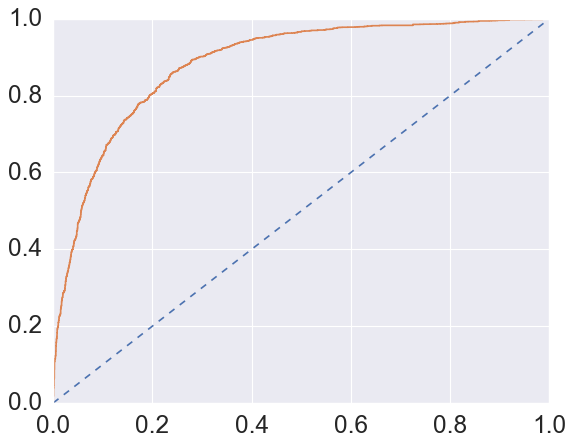

In [420]:
#AUC and ROC for the training data
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

In [421]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7347542924807579
[[1080  335]
 [ 113  161]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1415
           1       0.32      0.59      0.42       274

    accuracy                           0.73      1689
   macro avg       0.61      0.68      0.62      1689
weighted avg       0.81      0.73      0.76      1689



In [422]:
from sklearn.metrics import accuracy_score 
lda_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
df
lda_test_acc= accuracy_score(y_test, y_test_predict)
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
print ('lda_test_acc ',lda_test_acc)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_acc  0.7347542924807579
lda_test_precision  0.32
lda_test_recall  0.59
lda_test_f1  0.42


AUC: 0.751


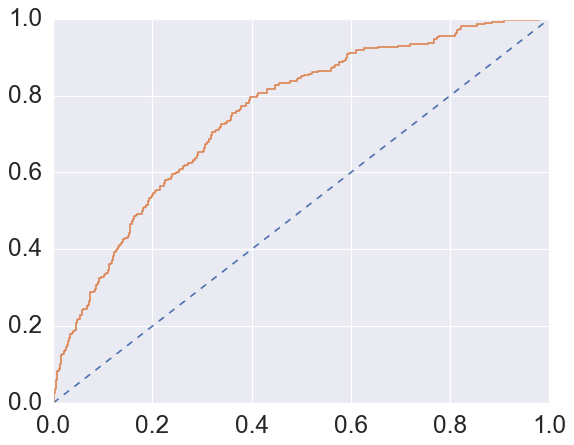

In [423]:
# AUC and ROC for the test data
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [424]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LDA_model).fit(X, y)

In [425]:
selected_feat= X_train.columns[(selector.get_support())]
len(selected_feat)

12

In [426]:
print(selected_feat)

Index(['NumberOfDeviceRegistered', 'Complain', 'Customer_Category',
       'Mobile_Phone', 'COD', 'E_wallet', 'Grocery', 'Laptop_and_Accessory',
       'Mobile', 'Single', 'Tier_2', 'Tier_3'],
      dtype='object')


In [427]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index
       )
round(data,2)

LDA Train  LDA Test
Accuracy        0.81      0.73
AUC             0.88      0.75
Recall          0.83      0.59
Precision       0.79      0.32
F1 Score        0.81      0.42

#### KNN Model

In [428]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [429]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9387817569635751
[[2936  331]
 [  69 3198]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      3267
           1       0.91      0.98      0.94      3267

    accuracy                           0.94      6534
   macro avg       0.94      0.94      0.94      6534
weighted avg       0.94      0.94      0.94      6534



In [430]:
from sklearn.metrics import accuracy_score 
knn_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
df
knn_train_acc= accuracy_score(y_train, y_train_predict)
knn_train_precision=round(df.loc["1"][0],2)
knn_train_recall=round(df.loc["1"][1],2)
knn_train_f1=round(df.loc["1"][2],2)
print ('knn_train_acc ',knn_train_acc)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_acc  0.9387817569635751
knn_train_precision  0.91
knn_train_recall  0.98
knn_train_f1  0.94


AUC: 0.991


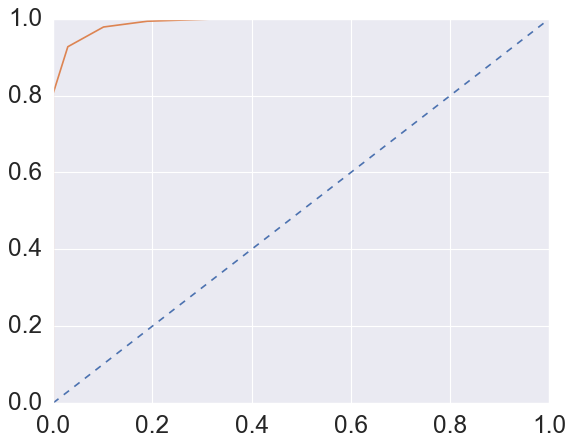

In [431]:
#AUC and ROC for the training data
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)

In [432]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8259325044404974
[[1177  238]
 [  56  218]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1415
           1       0.48      0.80      0.60       274

    accuracy                           0.83      1689
   macro avg       0.72      0.81      0.74      1689
weighted avg       0.88      0.83      0.84      1689



In [433]:
from sklearn.metrics import accuracy_score 
knn_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knn_metrics).transpose()
df
knn_test_acc= accuracy_score(y_test, y_test_predict)
knn_test_precision=round(df.loc["1"][0],2)
knn_test_recall=round(df.loc["1"][1],2)
knn_test_f1=round(df.loc["1"][2],2)
print ('knn_test_acc ',knn_test_acc)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_acc  0.8259325044404974
knn_test_precision  0.48
knn_test_recall  0.8
knn_test_f1  0.6


AUC: 0.887


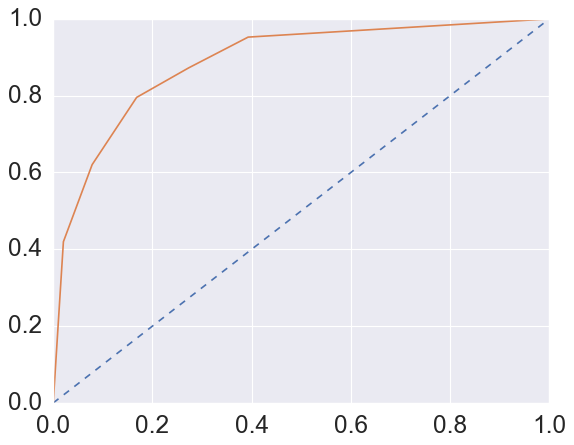

In [434]:
# AUC and ROC for the test data
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

In [435]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1]},index=index
       )
round(data,2)

KNN Train  KNN Test
Accuracy        0.94      0.83
AUC             0.99      0.89
Recall          0.98      0.80
Precision       0.91      0.48
F1 Score        0.94      0.60

#### Naive Bayes Model

In [436]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [437]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [438]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.6989592898683807
[[1603 1664]
 [ 303 2964]]
              precision    recall  f1-score   support

           0       0.84      0.49      0.62      3267
           1       0.64      0.91      0.75      3267

    accuracy                           0.70      6534
   macro avg       0.74      0.70      0.69      6534
weighted avg       0.74      0.70      0.69      6534



In [439]:
from sklearn.metrics import accuracy_score 
nb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
df
nb_train_acc= accuracy_score(y_train, y_train_predict)
nb_train_precision=round(df.loc["1"][0],2)
nb_train_recall=round(df.loc["1"][1],2)
nb_train_f1=round(df.loc["1"][2],2)
print ('nb_train_acc ',nb_train_acc)
print ('nb_train_precision ',nb_train_precision)
print ('nb_train_recall ',nb_train_recall)
print ('nb_train_f1 ',nb_train_f1)

nb_train_acc  0.6989592898683807
nb_train_precision  0.64
nb_train_recall  0.91
nb_train_f1  0.75


AUC: 0.820


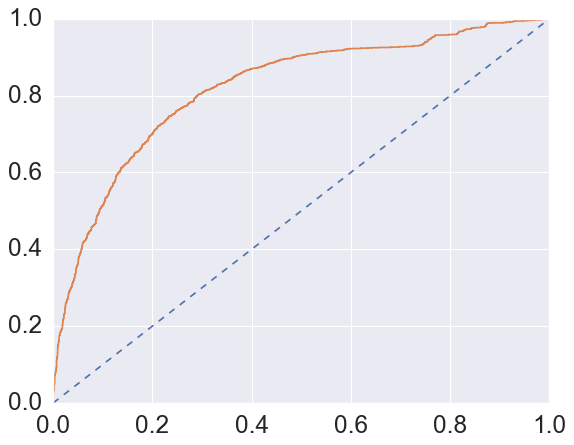

In [440]:
#AUC and ROC for the training data
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)

In [441]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5186500888099467
[[666 749]
 [ 64 210]]
              precision    recall  f1-score   support

           0       0.91      0.47      0.62      1415
           1       0.22      0.77      0.34       274

    accuracy                           0.52      1689
   macro avg       0.57      0.62      0.48      1689
weighted avg       0.80      0.52      0.58      1689



In [442]:
from sklearn.metrics import accuracy_score 
nb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(nb_metrics).transpose()
df
nb_test_acc= accuracy_score(y_test, y_test_predict)
nb_test_precision=round(df.loc["1"][0],2)
nb_test_recall=round(df.loc["1"][1],2)
nb_test_f1=round(df.loc["1"][2],2)
print ('nb_test_acc ',nb_test_acc)
print ('nb_test_precision ',nb_test_precision)
print ('nb_test_recall ',nb_test_recall)
print ('nb_test_f1 ',nb_test_f1)

nb_test_acc  0.5186500888099467
nb_test_precision  0.22
nb_test_recall  0.77
nb_test_f1  0.34


AUC: 0.684


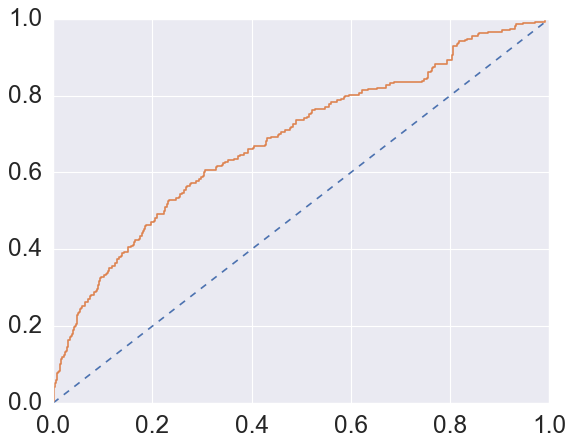

In [443]:
# AUC and ROC for the test data
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

In [444]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'nb Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'nb Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1]},index=index
       )
round(data,2)

nb Train  nb Test
Accuracy       0.70     0.52
AUC            0.82     0.68
Recall         0.91     0.77
Precision      0.64     0.22
F1 Score       0.75     0.34

#### SVM 

In [445]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1,probability=True)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [446]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9239363330272421
[[2919  348]
 [ 149 3118]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3267
           1       0.90      0.95      0.93      3267

    accuracy                           0.92      6534
   macro avg       0.93      0.92      0.92      6534
weighted avg       0.93      0.92      0.92      6534



In [447]:
from sklearn.metrics import accuracy_score 
svm_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(svm_metrics).transpose()
df
svm_train_acc= accuracy_score(y_train, y_train_predict)
svm_train_precision=round(df.loc["1"][0],2)
svm_train_recall=round(df.loc["1"][1],2)
svm_train_f1=round(df.loc["1"][2],2)
print ('svm_train_acc ',svm_train_acc)
print ('svm_train_precision ',svm_train_precision)
print ('svm_train_recall ',svm_train_recall)
print ('svm_train_f1 ',svm_train_f1)

svm_train_acc  0.9239363330272421
svm_train_precision  0.9
svm_train_recall  0.95
svm_train_f1  0.93


AUC: 0.972


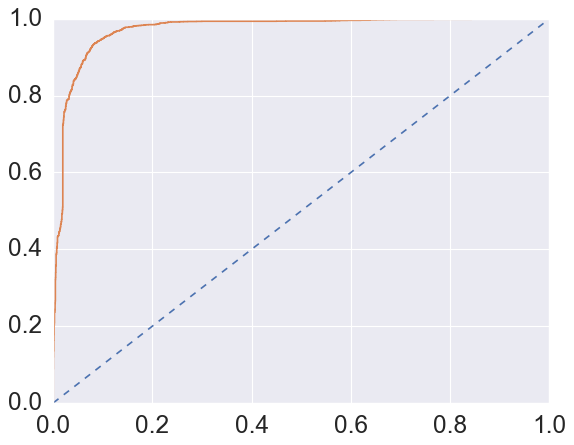

In [448]:
#AUC and ROC for the training data
# predict probabilities
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % svm_train_auc)
# calculate roc curve
svm_train_fpr, svm_train_tpr, svm_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_train_fpr, svm_train_tpr)

In [449]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8271166370633511
[[1211  204]
 [  88  186]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1415
           1       0.48      0.68      0.56       274

    accuracy                           0.83      1689
   macro avg       0.70      0.77      0.73      1689
weighted avg       0.86      0.83      0.84      1689



In [450]:
from sklearn.metrics import accuracy_score 
svm_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(svm_metrics).transpose()
df
svm_test_acc= accuracy_score(y_test, y_test_predict)
svm_test_precision=round(df.loc["1"][0],2)
svm_test_recall=round(df.loc["1"][1],2)
svm_test_f1=round(df.loc["1"][2],2)
print ('svm_test_acc ',svm_test_acc)
print ('svm_test_precision ',svm_test_precision)
print ('svm_test_recall ',svm_test_recall)
print ('svm_test_f1 ',svm_test_f1)

svm_test_acc  0.8271166370633511
svm_test_precision  0.48
svm_test_recall  0.68
svm_test_f1  0.56


AUC: 0.859


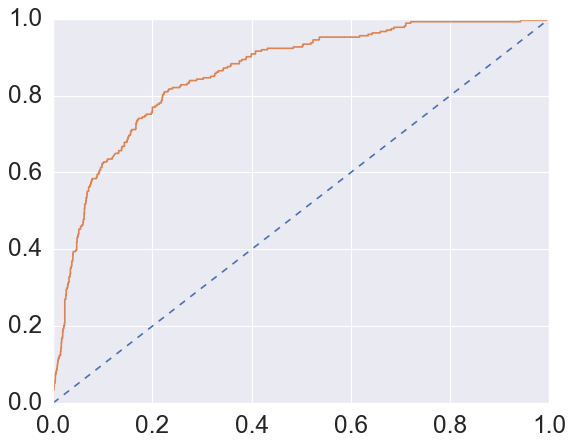

In [451]:
# AUC and ROC for the test data
# predict probabilities
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % svm_test_auc)
# calculate roc curve
svm_test_fpr, svm_test_tpr, svm_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_test_fpr, svm_test_tpr)

In [452]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'svm Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'svm Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1]},index=index
       )
round(data,2)

svm Train  svm Test
Accuracy        0.92      0.83
AUC             0.97      0.86
Recall          0.95      0.68
Precision       0.90      0.48
F1 Score        0.93      0.56

### Neural Network

In [453]:
from sklearn.neural_network import MLPClassifier

In [454]:
ann_model = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)
ann_model.fit(X_train, y_train)

Iteration 1, loss = 0.72433654
Iteration 2, loss = 0.67540702
Iteration 3, loss = 0.63573126
Iteration 4, loss = 0.60497221
Iteration 5, loss = 0.58049576
Iteration 6, loss = 0.56059696
Iteration 7, loss = 0.54422619
Iteration 8, loss = 0.53039381
Iteration 9, loss = 0.51880180
Iteration 10, loss = 0.50871570
Iteration 11, loss = 0.50011005
Iteration 12, loss = 0.49251743
Iteration 13, loss = 0.48586413
Iteration 14, loss = 0.47998573
Iteration 15, loss = 0.47466763
Iteration 16, loss = 0.46995297
Iteration 17, loss = 0.46568062
Iteration 18, loss = 0.46181758
Iteration 19, loss = 0.45828295
Iteration 20, loss = 0.45500353
Iteration 21, loss = 0.45204713
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [455]:
## Performance Matrix on train data set
y_train_predict = ann_model.predict(X_train)
model_score = ann_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7935414753596571
[[2601  666]
 [ 683 2584]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      3267
           1       0.80      0.79      0.79      3267

    accuracy                           0.79      6534
   macro avg       0.79      0.79      0.79      6534
weighted avg       0.79      0.79      0.79      6534



In [456]:
from sklearn.metrics import accuracy_score 
ann_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
df
ann_train_acc= accuracy_score(y_train, y_train_predict)
ann_train_precision=round(df.loc["1"][0],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_f1=round(df.loc["1"][2],2)
print ('ann_train_acc ',ann_train_acc)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

ann_train_acc  0.7935414753596571
ann_train_precision  0.8
ann_train_recall  0.79
ann_train_f1  0.79


AUC: 0.878


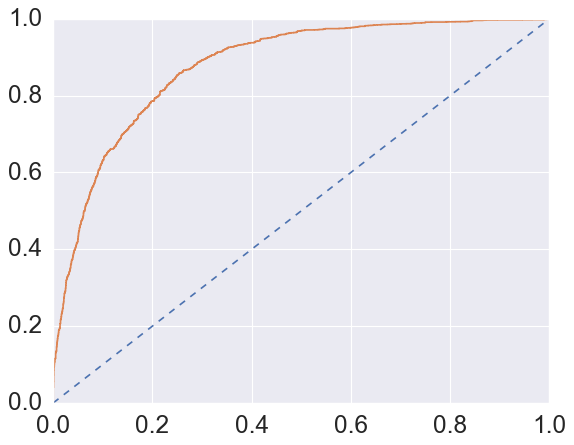

In [457]:
#AUC and ROC for the training data
# predict probabilities
probs = ann_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr)

In [458]:
## Performance Matrix on test data set
y_test_predict = ann_model.predict(X_test)
model_score = ann_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7460035523978685
[[1111  304]
 [ 125  149]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1415
           1       0.33      0.54      0.41       274

    accuracy                           0.75      1689
   macro avg       0.61      0.66      0.62      1689
weighted avg       0.81      0.75      0.77      1689



In [459]:
from sklearn.metrics import accuracy_score 
ann_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(ann_metrics).transpose()
df
ann_test_acc= accuracy_score(y_test, y_test_predict)
ann_test_precision=round(df.loc["1"][0],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_f1=round(df.loc["1"][2],2)
print ('ann_test_acc ',ann_test_acc)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

ann_test_acc  0.7460035523978685
ann_test_precision  0.33
ann_test_recall  0.54
ann_test_f1  0.41


AUC: 0.749


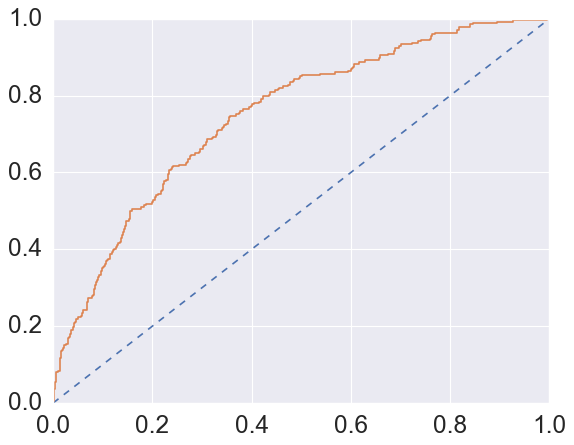

In [460]:
# AUC and ROC for the test data
# predict probabilities
probs = ann_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ann_test_auc)
# calculate roc curve
ann_test_fpr, ann_test_tpr, ann_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr)

In [461]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'ANN Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'ANN Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index
       )
round(data,2)

ANN Train  ANN Test
Accuracy        0.79      0.75
AUC             0.88      0.75
Recall          0.79      0.54
Precision       0.80      0.33
F1 Score        0.79      0.41

#### Basic Bagging and Boosting Models

#### Bagging

In [462]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(random_state=1)
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=50, random_state=1)

In [463]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9972451790633609
[[3257   10]
 [   8 3259]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3267
           1       1.00      1.00      1.00      3267

    accuracy                           1.00      6534
   macro avg       1.00      1.00      1.00      6534
weighted avg       1.00      1.00      1.00      6534



In [464]:
from sklearn.metrics import accuracy_score 
bag_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
df
bag_train_acc= accuracy_score(y_train, y_train_predict)
bag_train_precision=round(df.loc["1"][0],2)
bag_train_recall=round(df.loc["1"][1],2)
bag_train_f1=round(df.loc["1"][2],2)
print ('bag_train_acc ',bag_train_acc)
print ('bag_train_precision ',bag_train_precision)
print ('bag_train_recall ',bag_train_recall)
print ('bag_train_f1 ',bag_train_f1)

bag_train_acc  0.9972451790633609
bag_train_precision  1.0
bag_train_recall  1.0
bag_train_f1  1.0


AUC: 1.000


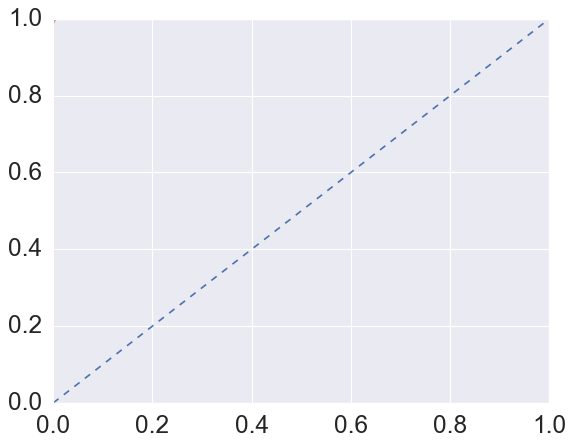

In [465]:
#AUC and ROC for the training data
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr)

In [466]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8863232682060391
[[1304  111]
 [  81  193]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1415
           1       0.63      0.70      0.67       274

    accuracy                           0.89      1689
   macro avg       0.79      0.81      0.80      1689
weighted avg       0.89      0.89      0.89      1689



In [467]:
from sklearn.metrics import accuracy_score 
bag_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(bag_metrics).transpose()
df
bag_test_acc= accuracy_score(y_test, y_test_predict)
bag_test_precision=round(df.loc["1"][0],2)
bag_test_recall=round(df.loc["1"][1],2)
bag_test_f1=round(df.loc["1"][2],2)
print ('bag_test_acc ',bag_test_acc)
print ('bag_test_precision ',bag_test_precision)
print ('bag_test_recall ',bag_test_recall)
print ('bag_test_f1 ',bag_test_f1)

bag_test_acc  0.8863232682060391
bag_test_precision  0.63
bag_test_recall  0.7
bag_test_f1  0.67


AUC: 0.913


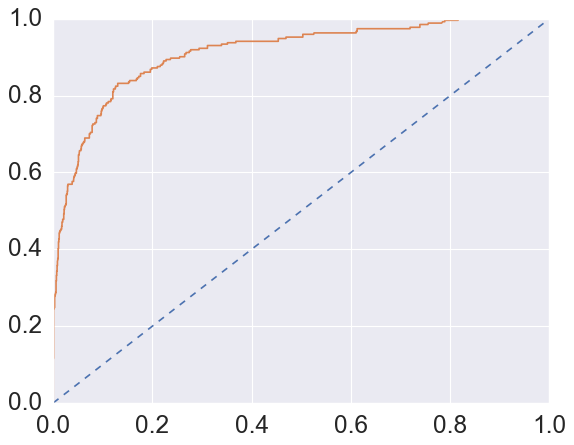

In [468]:
# AUC and ROC for the test data
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, bag_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr)

In [469]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'bag Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
        'bag Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1]},index=index
       )
round(data,2)

bag Train  bag Test
Accuracy         1.0      0.89
AUC              1.0      0.91
Recall           1.0      0.70
Precision        1.0      0.63
F1 Score         1.0      0.67

#### Ada Boost

In [470]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=50,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [471]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8282828282828283
[[2710  557]
 [ 565 2702]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3267
           1       0.83      0.83      0.83      3267

    accuracy                           0.83      6534
   macro avg       0.83      0.83      0.83      6534
weighted avg       0.83      0.83      0.83      6534



In [472]:
from sklearn.metrics import accuracy_score 
adb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
df
adb_train_acc= accuracy_score(y_train, y_train_predict)
adb_train_precision=round(df.loc["1"][0],2)
adb_train_recall=round(df.loc["1"][1],2)
adb_train_f1=round(df.loc["1"][2],2)
print ('adb_train_acc ',adb_train_acc)
print ('adb_train_precision ',adb_train_precision)
print ('adb_train_recall ',adb_train_recall)
print ('adb_train_f1 ',adb_train_f1)


adb_train_acc  0.8282828282828283
adb_train_precision  0.83
adb_train_recall  0.83
adb_train_f1  0.83


AUC: 0.909


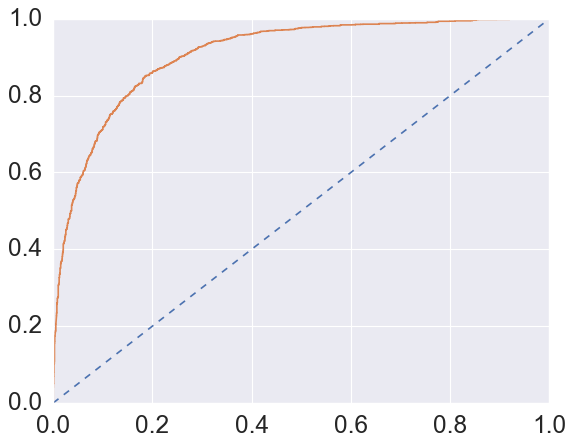

In [473]:
#AUC and ROC for the training data
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr)

In [474]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7821195973949082
[[1160  255]
 [ 113  161]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1415
           1       0.39      0.59      0.47       274

    accuracy                           0.78      1689
   macro avg       0.65      0.70      0.66      1689
weighted avg       0.83      0.78      0.80      1689



In [475]:
from sklearn.metrics import accuracy_score 
adb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adb_metrics).transpose()
df
adb_test_acc= accuracy_score(y_test, y_test_predict)
adb_test_precision=round(df.loc["1"][0],2)
adb_test_recall=round(df.loc["1"][1],2)
adb_test_f1=round(df.loc["1"][2],2)
print ('adb_test_acc ',adb_test_acc)
print ('adb_test_precision ',adb_test_precision)
print ('adb_test_recall ',adb_test_recall)
print ('adb_test_f1 ',adb_test_f1)

adb_test_acc  0.7821195973949082
adb_test_precision  0.39
adb_test_recall  0.59
adb_test_f1  0.47


AUC: 0.790


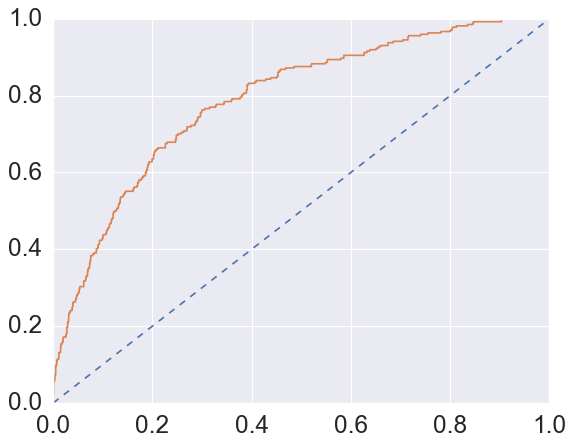

In [476]:
# AUC and ROC for the test data
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr)

In [477]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':ADB_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
6   OrderAmountHikeFromlastYear        0.30
8                CashbackAmount        0.18
0               WarehouseToHome        0.06
9             Customer_Category        0.06
22                       Single        0.04
21                      Married        0.04
4               NumberOfAddress        0.04
5                      Complain        0.04
11                 Order_Volume        0.04
14                   Debit_Card        0.02
18         Laptop_and_Accessory        0.02
17                      Grocery        0.02
16                          UPI        0.02
13                          COD        0.02
12                 Mobile_Phone        0.02
7                    CouponUsed        0.02
3             SatisfactionScore        0.02
2      NumberOfDeviceRegistered        0.02
25                       Tier_3        0.02
1                HourSpendOnApp        0.00
15                     E_wallet        0.00
10                User_Activity        0.00
19                       Mobile        0.00
20                       Others        0.00
23                         Male        0.00
24                       Tier_2        0.00

In [478]:
eli5.explain_weights(ADB_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator='AdaBoostClassifier(random_state=1)', description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.3, std=0.458257569495584, value=None), FeatureWeight(feature='CashbackAmount', weight=0.18, std=0.38418745424597095, value=None), FeatureWeight(feature='Customer_Category', weight=0.06, std=0.23748684174075843, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.06, std=0.2374868417407584, value=None), FeatureWeight(feature='Order_Volume', weight=0.04, std=0.19595917942265434, value=None), FeatureWeight(feature='Complain', weight=0.04, std=0.19595917942265434, value=None), FeatureWeight(feature='NumberOfAddress', weight=0.04, std=0.19595917942265434, value=None), FeatureWeight(feature='Married', weight=0.04, std=0.19595917942265437, value=None), FeatureWeight(feature='Single', weight=0.04, std=0.19595917942265434, value=None), FeatureWeight(feature='Grocery', weight=0.02, std=0.13999999999999996, value=None), FeatureWeight(feature='Debit_Card', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='Tier_3', weight=0.02, std=0.1399999999999999, value=None), FeatureWeight(feature='COD', weight=0.02, std=0.13999999999999993, value=None), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.02, std=0.1399999999999999, value=None), FeatureWeight(feature='Mobile_Phone', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='CouponUsed', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='UPI', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='SatisfactionScore', weight=0.02, std=0.13999999999999987, value=None), FeatureWeight(feature='Laptop_and_Accessory', weight=0.02, std=0.13999999999999985, value=None), FeatureWeight(feature='Male', weight=0.0, std=0.0, value=None)], remaining=6), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [479]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'AdaBoost Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'AdBoost Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1]},index=index
       )
round(data,2)

AdaBoost Train  AdBoost Test
Accuracy             0.83          0.78
AUC                  0.91          0.79
Recall               0.83          0.59
Precision            0.83          0.39
F1 Score             0.83          0.47

#### XGBoost

In [480]:
##!pip install xgboost

In [481]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(n_estimators=50,random_state=1)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [482]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9869911233547597
[[3225   42]
 [  43 3224]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3267
           1       0.99      0.99      0.99      3267

    accuracy                           0.99      6534
   macro avg       0.99      0.99      0.99      6534
weighted avg       0.99      0.99      0.99      6534



In [483]:
from sklearn.metrics import accuracy_score 
xgb_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
df
xgb_train_acc= accuracy_score(y_train, y_train_predict)
xgb_train_precision=round(df.loc["1"][0],2)
xgb_train_recall=round(df.loc["1"][1],2)
xgb_train_f1=round(df.loc["1"][2],2)
print ('xgb_train_acc ',xgb_train_acc)
print ('xgb_train_precision ',xgb_train_precision)
print ('xgb_train_recall ',xgb_train_recall)
print ('xgb_train_f1 ',xgb_train_f1)

xgb_train_acc  0.9869911233547597
xgb_train_precision  0.99
xgb_train_recall  0.99
xgb_train_f1  0.99


AUC: 0.999


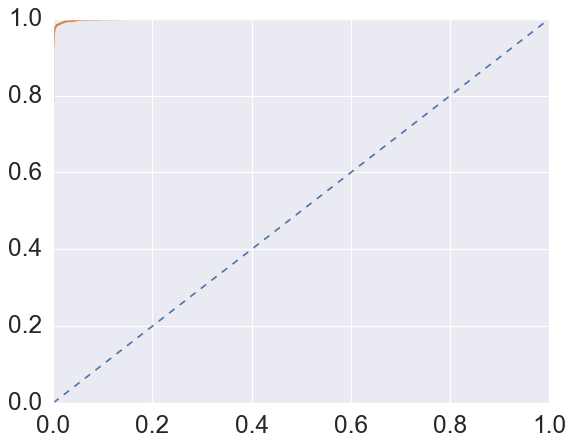

In [484]:
#AUC and ROC for the training data
# predict probabilities
probs = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_train_auc)
# calculate roc curve
xgb_train_fpr, xgb_train_tpr, xgb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_train_fpr, xgb_train_tpr)

In [485]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.896388395500296
[[1331   84]
 [  91  183]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1415
           1       0.69      0.67      0.68       274

    accuracy                           0.90      1689
   macro avg       0.81      0.80      0.81      1689
weighted avg       0.90      0.90      0.90      1689



In [486]:
from sklearn.metrics import accuracy_score 
xgb_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(xgb_metrics).transpose()
df
xgb_test_acc= accuracy_score(y_test, y_test_predict)
xgb_test_precision=round(df.loc["1"][0],2)
xgb_test_recall=round(df.loc["1"][1],2)
xgb_test_f1=round(df.loc["1"][2],2)
print ('xgb_test_acc ',xgb_test_acc)
print ('xgb_test_precision ',xgb_test_precision)
print ('xgb_test_recall ',xgb_test_recall)
print ('xgb_test_f1 ',xgb_test_f1)

xgb_test_acc  0.896388395500296
xgb_test_precision  0.69
xgb_test_recall  0.67
xgb_test_f1  0.68


AUC: 0.907


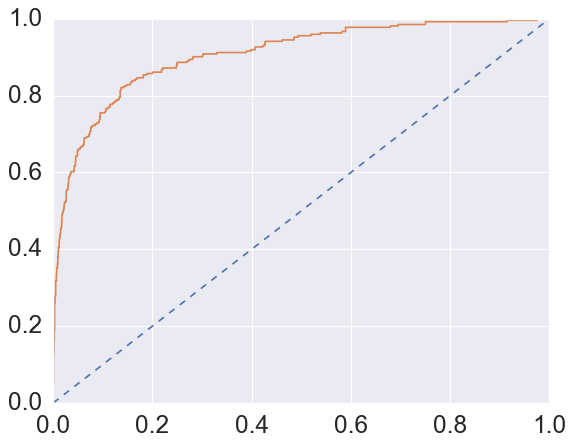

In [487]:
# AUC and ROC for the test data
# predict probabilities
probs = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_test_auc)
# calculate roc curve
xgb_test_fpr, xgb_test_tpr, xgb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_test_fpr, xgb_test_tpr)

In [488]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':XGB_model.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
21                      Married    0.262110
18         Laptop_and_Accessory    0.058827
9             Customer_Category    0.058699
5                      Complain    0.042239
12                 Mobile_Phone    0.040273
20                       Others    0.039179
16                          UPI    0.037526
7                    CouponUsed    0.033985
14                   Debit_Card    0.033569
22                       Single    0.032616
0               WarehouseToHome    0.031784
2      NumberOfDeviceRegistered    0.030484
17                      Grocery    0.026994
6   OrderAmountHikeFromlastYear    0.026412
19                       Mobile    0.026270
8                CashbackAmount    0.023915
25                       Tier_3    0.023767
11                 Order_Volume    0.023748
4               NumberOfAddress    0.022504
13                          COD    0.021007
24                       Tier_2    0.020746
15                     E_wallet    0.019318
3             SatisfactionScore    0.018663
10                User_Activity    0.016869
1                HourSpendOnApp    0.015367
23                         Male    0.013127

In [489]:
eli5.explain_weights(XGB_model,feature_names=list(X_train.columns)) # LR_model is the model fitted 

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.300000012, max_delta_step=0, max_depth=6,\n              min_child_weight=1, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Married', weight=0.26211014, std=None, value=None), FeatureWeight(feature='Laptop_and_Accessory', weight=0.058826752, std=None, value=None), FeatureWeight(feature='Customer_Category', weight=0.058698982, std=None, value=None), FeatureWeight(feature='Complain', weight=0.04223894, std=None, value=None), FeatureWeight(feature='Mobile_Phone', weight=0.040273175, std=None, value=None), FeatureWeight(feature='Others', weight=0.039179116, std=None, value=None), FeatureWeight(feature='UPI', weight=0.037525754, std=None, value=None), FeatureWeight(feature='CouponUsed', weight=0.033985265, std=None, value=None), FeatureWeight(feature='Debit_Card', weight=0.033569377, std=None, value=None), FeatureWeight(feature='Single', weight=0.032616038, std=None, value=None), FeatureWeight(feature='WarehouseToHome', weight=0.03178445, std=None, value=None), FeatureWeight(feature='NumberOfDeviceRegistered', weight=0.030484345, std=None, value=None), FeatureWeight(feature='Grocery', weight=0.026994102, std=None, value=None), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.026412128, std=None, value=None), FeatureWeight(feature='Mobile', weight=0.026270432, std=None, value=None), FeatureWeight(feature='CashbackAmount', weight=0.023914501, std=None, value=None), FeatureWeight(feature='Tier_3', weight=0.02376687, std=None, value=None), FeatureWeight(feature='Order_Volume', weight=0.023748497, std=None, value=None), FeatureWeight(feature='NumberOfAddress', weight=0.022504237, std=None, value=None), FeatureWeight(feature='COD', weight=0.021006986, std=None, value=None)], remaining=6), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [490]:
eli5.explain_prediction(XGB_model, X_train.iloc[1], feature_names = list(X_train.columns)) 
# clf is the model fitted 
# X_train.iloc[1] is the record at index 1
# feature_names is the list of column names/features

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.300000012, max_delta_step=0, max_depth=6,\n              min_child_weight=1, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='Married', weight=1.1261026677790185, std=None, value=1.289836086502794), FeatureWeight(feature='Debit_Card', weight=0.7041036914638932, std=None, value=1.4289504684700522), FeatureWeight(feature='Customer_Category', weight=0.6407855216216293, std=None, value=-2.483824145392262), FeatureWeight(feature='Complain', weight=0.4349450365283627, std=None, value=-0.676391997502245), FeatureWeight(feature='CashbackAmount', weight=0.4172640588414385, std=None, value=-0.9397887942408741), FeatureWeight(feature='Mobile_Phone', weight=0.2579664582199192, std=None, value=0.7709969587458272), FeatureWeight(feature='NumberOfAddress', weight=0.22495396172779616, std=None, value=0.3484321546662661), FeatureWeight(feature='Tier_3', weight=0.18902954020598095, std=None, value=-0.6249068881482069), FeatureWeight(feature='HourSpendOnApp', weight=0.17505305206138605, std=None, value=0.538795194595626), FeatureWeight(feature='Mobile', weight=0.13476886118706682, std=None, value=1.0981538740666612), FeatureWeight(feature='OrderAmountHikeFromlastYear', weight=0.12122169720510238, std=None, value=-1.0072510209144836), FeatureWeight(feature='COD', weight=0.04986184645834353, std=None, value=-0.28723678416756865), FeatureWeight(feature='CouponUsed', weight=0.027242290385893365, std=None, value=0.5487032611687342), FeatureWeight(feature='E_wallet', weight=0.007559585706394055, std=None, value=-0.31299637103481115), FeatureWeight(feature='Tier_2', weight=0.004053388423808688, std=None, value=-0.17906547628018907)], neg=[FeatureWeight(feature='Order_Volume', weight=-0.46844532485614215, std=None, value=-1.7816273801620177), FeatureWeight(feature='Laptop_and_Accessory', weight=-0.42132238444474, std=None, value=-0.6213565844917213), FeatureWeight(feature='WarehouseToHome', weight=-0.37043535088945456, std=None, value=-1.3384739561852796), FeatureWeight(feature='Male', weight=-0.3028398102443158, std=None, value=-1.1447562015389174), FeatureWeight(feature='User_Activity', weight=-0.13232262320245222, std=None, value=-1.5542842829306558), FeatureWeight(feature='Single', weight=-0.09422051823570582, std=None, value=-0

In [491]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'XGBoost Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
        'XGBoost Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1]},index=index
       )
round(data,2)

XGBoost Train  XGBoost Test
Accuracy            0.99          0.90
AUC                 1.00          0.91
Recall              0.99          0.67
Precision           0.99          0.69
F1 Score            0.99          0.68

### Comparisson of basic models

In [492]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
        'DT Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
        'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'NB Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'SVM Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'SVM Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1],
        'ANN Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'ANN Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1],             
        'Bag Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
        'Bag Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
        'ADB Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'ADB Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
        'XGB Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
        'XGB Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test  DT Train  DT Test  RF Train  RF Test  LDA Train  \
Accuracy       0.80     0.75       1.0     0.84       1.0     0.91       0.81   
AUC            0.89     0.75       1.0     0.77       1.0     0.93       0.88   
Recall         0.81     0.57       1.0     0.67       1.0     0.74       0.83   
Precision      0.80     0.34       1.0     0.51       1.0     0.72       0.79   
F1 Score       0.80     0.43       1.0     0.58       1.0     0.73       0.81   

           LDA Test  KNN Train  KNN Test  ...  SVM Train  SVM Test  ANN Train  \
Accuracy       0.73       0.94      0.83  ...       0.92      0.83       0.79   
AUC            0.75       0.99      0.89  ...       0.97      0.86       0.88   
Recall         0.59       0.98      0.80  ...       0.95      0.68       0.79   
Precision      0.32       0.91      0.48  ...       0.90      0.48       0.80   
F1 Score       0.42       0.94      0.60  ...       0.93      0.56       0.79   

           ANN Test  Bag Train  Bag Test  ADB Train  ADB Test  XGB Train  \
Accuracy       0.75        1.0      0.89       0.83      0.78       0.99   
AUC            0.75        1.0      0.91       0.91      0.79       1.00   
Recall         0.54        1.0      0.70       0.83      0.59       0.99   
Precision      0.33        1.0      0.63       0.83      0.39       0.99   
F1 Score       0.41        1.0      0.67       0.83      0.47       0.99   

           XGB Test  
Accuracy       0.90  
AUC            0.91  
Recall         0.67  
Precision      0.69  
F1 Score       0.68  

[5 rows x 22 columns]

In [493]:
data.to_excel('basic_model_comparisson.xlsx',index=False)

### ROC Curve for all the basic models on the Training data

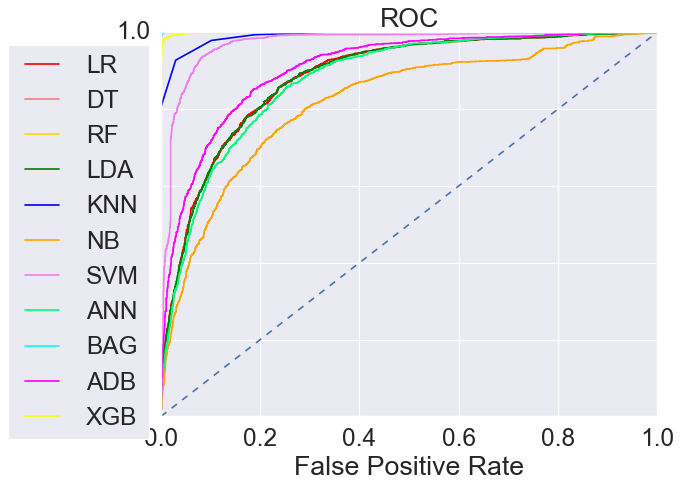

In [494]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="LR")
plt.plot(dt_train_fpr, dt_train_tpr,color='lightcoral',label="DT")
plt.plot(rf_train_fpr, rf_train_tpr,color='gold',label="RF")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.plot(knn_train_fpr,knn_train_tpr,color='blue',label="KNN")
plt.plot(nb_train_fpr,nb_train_tpr,color='orange',label="NB")
plt.plot(svm_train_fpr,svm_train_tpr,color='violet',label="SVM")
plt.plot(ann_train_fpr,ann_train_tpr,color='springgreen',label="ANN")
plt.plot(bag_train_fpr,bag_train_tpr,color='cyan',label="BAG")
plt.plot(adb_train_fpr,adb_train_tpr,color='magenta',label="ADB")
plt.plot(xgb_train_fpr,xgb_train_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### ROC Curve for all the basic models on the Test data

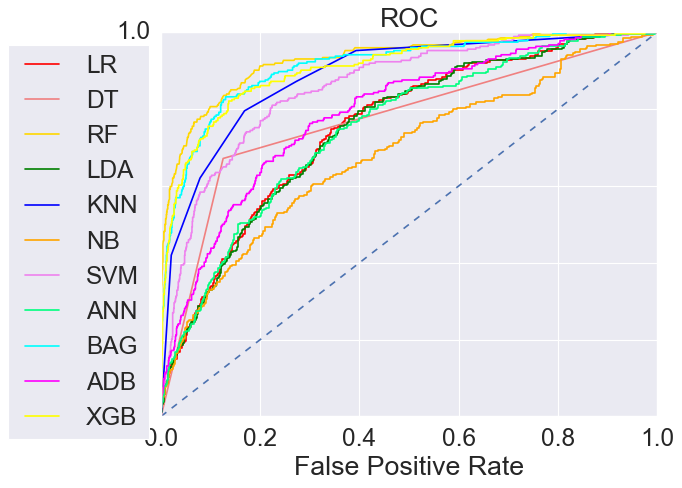

In [495]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(dt_test_fpr, dt_test_tpr,color='lightcoral',label="DT")
plt.plot(rf_test_fpr, rf_test_tpr,color='gold',label="RF")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.plot(knn_test_fpr,knn_test_tpr,color='blue',label="KNN")
plt.plot(nb_test_fpr,nb_test_tpr,color='orange',label="NB")
plt.plot(svm_test_fpr,svm_test_tpr,color='violet',label="SVM")
plt.plot(ann_test_fpr,ann_test_tpr,color='springgreen',label="ANN")
plt.plot(bag_test_fpr,bag_test_tpr,color='cyan',label="BAG")
plt.plot(adb_test_fpr,adb_test_tpr,color='magenta',label="ADB")
plt.plot(xgb_test_fpr,xgb_test_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### Model Tuninig

In [496]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#### Logistic Regression

In [497]:
X_train_fs = X_train[['Customer_Category','CashbackAmount']]

X_test_fs = X_test[['Customer_Category','CashbackAmount']]

In [498]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression(random_state = 1)

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2","l1"],
              "tol" : [0.001,0.01,0.001],
              "max_iter": [5,10],
              "C" :[2],
              "intercept_scaling": [3],
              "solver":['liblinear']}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv = 5)

In [499]:
# Fit the Logistic Regression model
#lr_model = LogisticRegression(solver='liblinear',max_iter=100,verbose=True,n_jobs=1)
#model = LogisticRegression()
gsLRM.fit(X_train_fs, y_train)
lr_model_tun = gsLRM.best_estimator_
lr_model_tun

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  38 tasks      | elapsed:    3.5s
[Parallel(n_jobs=7)]: Done  60 out of  60 | elapsed:    7.0s finished


LogisticRegression(C=2, intercept_scaling=3, max_iter=5, random_state=1,
                   solver='liblinear', tol=0.001)

In [500]:
## Performance Matrix on train data set
y_train_predict = lr_model_tun.predict(X_train_fs)
model_score = lr_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.660085705540251
[[1923 1344]
 [ 877 2390]]
              precision    recall  f1-score   support

           0       0.69      0.59      0.63      3267
           1       0.64      0.73      0.68      3267

    accuracy                           0.66      6534
   macro avg       0.66      0.66      0.66      6534
weighted avg       0.66      0.66      0.66      6534



In [501]:
lr_tuned_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lr_tuned_metrics).transpose()
df
lr_tuned_train_acc= accuracy_score(y_train, y_train_predict)
lr_tuned_train_precision=round(df.loc["1"][0],2)
lr_tuned_train_recall=round(df.loc["1"][1],2)
lr_tuned_train_f1=round(df.loc["1"][2],2)
print ('lr_tuned_train_acc ',lr_tuned_train_acc)
print ('lr_tuned_train_precision ',lr_tuned_train_precision)
print ('lr_tuned_train_recall ',lr_tuned_train_recall)
print ('lr_tuned_train_f1 ',lr_tuned_train_f1)

lr_tuned_train_acc  0.660085705540251
lr_tuned_train_precision  0.64
lr_tuned_train_recall  0.73
lr_tuned_train_f1  0.68


AUC: 0.728


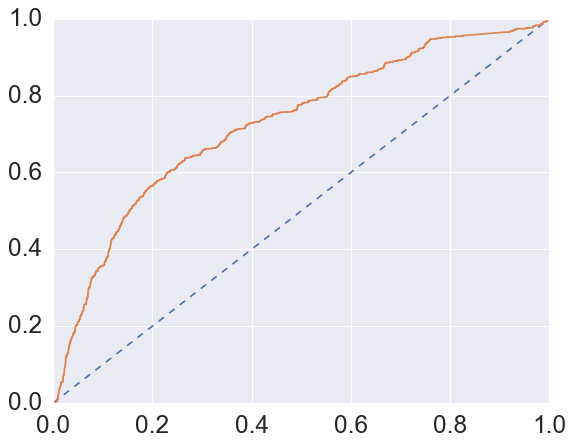

In [502]:
#AUC and ROC for the training data
# predict probabilities
probs = lr_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_tun_train_auc)
# calculate roc curve
lr_tun_train_fpr, lr_tun_train_tpr, lr_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tun_train_fpr, lr_tun_train_tpr)

In [503]:
## Performance Matrix on test data set
y_test_predict = lr_model_tun.predict(X_test_fs)
model_score = lr_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5920663114268798
[[800 615]
 [ 74 200]]
              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1415
           1       0.25      0.73      0.37       274

    accuracy                           0.59      1689
   macro avg       0.58      0.65      0.53      1689
weighted avg       0.81      0.59      0.65      1689



In [504]:
lr_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lr_tuned_metrics).transpose()
df
lr_tuned_test_acc= accuracy_score(y_test, y_test_predict)
lr_tuned_test_precision=round(df.loc["1"][0],2)
lr_tuned_test_recall=round(df.loc["1"][1],2)
lr_tuned_test_f1=round(df.loc["1"][2],2)
print ('lr_tuned_test_acc ',lr_tuned_test_acc)
print ('lr_tuned_test_precision ',lr_tuned_test_precision)
print ('lr_tuned_test_recall ',lr_tuned_test_recall)
print ('lr_tuned_test_f1 ',lr_tuned_test_f1)

lr_tuned_test_acc  0.5920663114268798
lr_tuned_test_precision  0.25
lr_tuned_test_recall  0.73
lr_tuned_test_f1  0.37


AUC: 0.726


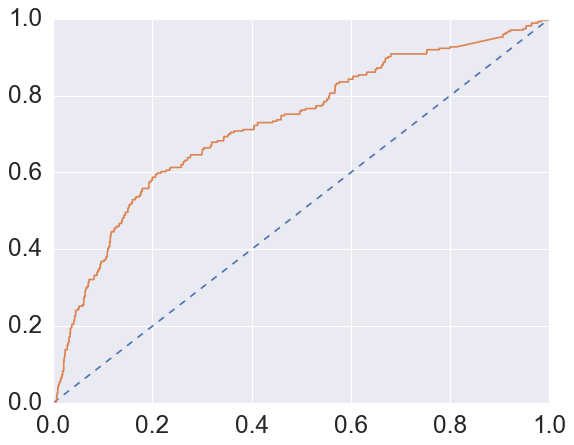

In [505]:
# AUC and ROC for the test data
# predict probabilities
probs = lr_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_tun_test_auc)
# calculate roc curve
lr_tun_test_fpr, lr_tun_test_tpr, lr_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tun_test_fpr, lr_tun_test_tpr)

In [506]:
pd.DataFrame(zip(X_train_fs.columns, np.transpose(lr_model_tun.coef_.tolist()[0])), columns=['features', 'coef']).sort_values('coef', ascending=False)

features      coef
0  Customer_Category  0.609384
1     CashbackAmount -0.528780

In [507]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_tuned_train_acc,lr_tun_train_auc,lr_tuned_train_recall,lr_tuned_train_precision,lr_tuned_train_f1],
        'LR Test':[lr_tuned_test_acc,lr_tun_test_auc,lr_tuned_test_recall,lr_tuned_test_precision,lr_tuned_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test
Accuracy       0.66     0.59
AUC            0.73     0.73
Recall         0.73     0.73
Precision      0.64     0.25
F1 Score       0.68     0.37

In [508]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=lr_model_tun).fit(X_train_fs, y_train)

In [509]:
selected_feat= X_train_fs.columns[(selector.get_support())]
len(selected_feat)

1

In [510]:
print(selected_feat)

Index(['Customer_Category'], dtype='object')


### Decision Tree

In [511]:
X_train_fs = X_train[['CashbackAmount','Customer_Category', 'Complain']]

X_test_fs = X_test[['CashbackAmount','Customer_Category', 'Complain']]

In [512]:
# Decision Tree Parameters tunning 
dt = DecisionTreeClassifier(random_state = 1)

## Search grid for optimal parameters
dt_param_grid = {'max_depth': [30,50],
                 'max_features': [1,2,3,4],
                 'min_samples_split':[2,3,5],
                 'min_samples_leaf':[2,3,5],
                 'criterion':['gini','entropy']}


gsDT = GridSearchCV(dt, dt_param_grid, scoring="recall", n_jobs= 7, verbose = 1)

In [513]:
gsDT.fit(X_train_fs, y_train)
dt_model_tun = gsDT.best_estimator_
dt_model_tun

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  39 tasks      | elapsed:    0.6s
[Parallel(n_jobs=7)]: Done 720 out of 720 | elapsed:    3.1s finished


DecisionTreeClassifier(max_depth=30, max_features=1, min_samples_leaf=5,
                       random_state=1)

In [514]:
y_train_predict = dt_model_tun.predict(X_train_fs)
model_score = dt_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.862105907560453
[[2783  484]
 [ 417 2850]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3267
           1       0.85      0.87      0.86      3267

    accuracy                           0.86      6534
   macro avg       0.86      0.86      0.86      6534
weighted avg       0.86      0.86      0.86      6534



In [515]:
dt_tuned_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(dt_tuned_metrics).transpose()
df
dt_tuned_train_acc= accuracy_score(y_train, y_train_predict)
dt_tuned_train_precision=round(df.loc["1"][0],2)
dt_tuned_train_recall=round(df.loc["1"][1],2)
dt_tuned_train_f1=round(df.loc["1"][2],2)
print ('dt_tuned_train_acc ',dt_tuned_train_acc)
print ('dt_tuned_train_precision ',dt_tuned_train_precision)
print ('dt_tuned_train_recall ',dt_tuned_train_recall)
print ('dt_tuned_train_f1 ',dt_tuned_train_f1)

dt_tuned_train_acc  0.862105907560453
dt_tuned_train_precision  0.85
dt_tuned_train_recall  0.87
dt_tuned_train_f1  0.86


AUC: 0.946


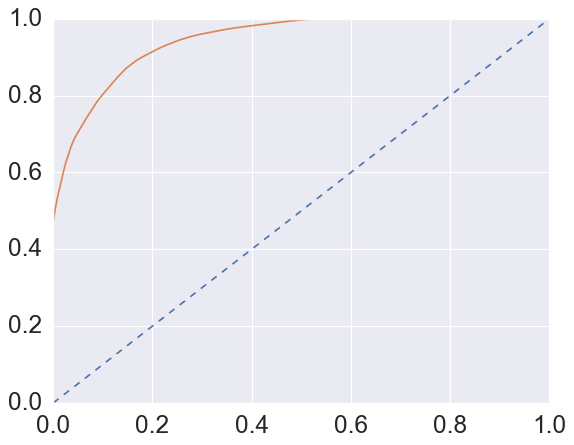

In [516]:
#AUC and ROC for the training data
# predict probabilities
probs = dt_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_tun_train_auc)
# calculate roc curve
dt_tun_train_fpr, dt_tun_train_tpr, dt_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_tun_train_fpr, dt_tun_train_tpr)

In [517]:
y_test_predict = dt_model_tun.predict(X_test_fs)
model_score = dt_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7507400828892836
[[1074  341]
 [  80  194]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1415
           1       0.36      0.71      0.48       274

    accuracy                           0.75      1689
   macro avg       0.65      0.73      0.66      1689
weighted avg       0.84      0.75      0.78      1689



In [518]:
dt_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(dt_tuned_metrics).transpose()
df
dt_tuned_test_acc= accuracy_score(y_test, y_test_predict)
dt_tuned_test_precision=round(df.loc["1"][0],2)
dt_tuned_test_recall=round(df.loc["1"][1],2)
dt_tuned_test_f1=round(df.loc["1"][2],2)
print ('dt_tuned_test_acc ',dt_tuned_test_acc)
print ('dt_tuned_test_precision ',dt_tuned_test_precision)
print ('dt_tuned_test_recall ',dt_tuned_test_recall)
print ('dt_tuned_test_f1 ',dt_tuned_test_f1)

dt_tuned_test_acc  0.7507400828892836
dt_tuned_test_precision  0.36
dt_tuned_test_recall  0.71
dt_tuned_test_f1  0.48


AUC: 0.827


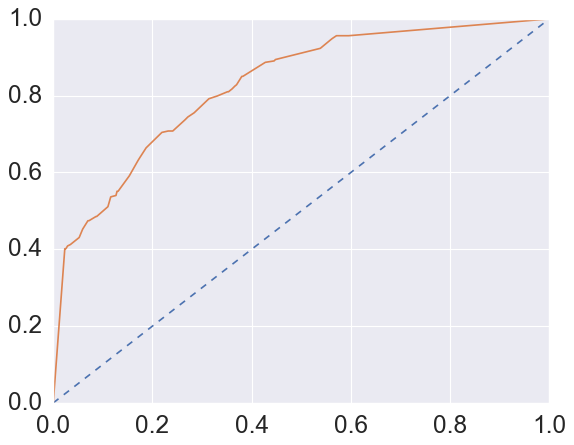

In [519]:
# AUC and ROC for the test data
# predict probabilities
probs = dt_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
dt_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_tun_test_auc)
# calculate roc curve
dt_tun_test_fpr, dt_tun_test_tpr, dt_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(dt_tun_test_fpr, dt_tun_test_tpr)

In [520]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model_tun, out_file=Credit_Tree_File, feature_names = list(X_train_fs), class_names = list(train_char_label))

Credit_Tree_File.close()

In [521]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':dt_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0     CashbackAmount    0.749316
1  Customer_Category    0.197881
2           Complain    0.052802

In [522]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'DT Train':[dt_tuned_train_acc,dt_tun_train_auc,dt_tuned_train_recall,dt_tuned_train_precision,dt_tuned_train_f1],
        'DT Test':[dt_tuned_test_acc,dt_tun_test_auc,dt_tuned_test_recall,dt_tuned_test_precision,dt_tuned_test_f1]},index=index
       )
round(data,2)

DT Train  DT Test
Accuracy       0.86     0.75
AUC            0.95     0.83
Recall         0.87     0.71
Precision      0.85     0.36
F1 Score       0.86     0.48

### Random Forest

In [523]:
X_train_fs = X_train[['CashbackAmount','Customer_Category']]

X_test_fs = X_test[['CashbackAmount','Customer_Category']]

In [524]:
rf = RandomForestClassifier(random_state = 1)

## Search grid for optimal parameters
rf_param_grid = {'n_estimators': [200,500],
                 'criterion': ['gini', 'entropy'],
                 'max_depth':[20],
                 'min_samples_split':[3,5,10],
                 'min_samples_leaf':[3,5,10],
                 'max_features':[1,2],
                 'max_leaf_nodes':[30,40]}


gsRF = GridSearchCV(rf, rf_param_grid, scoring="recall", n_jobs= 7, verbose = 1,cv =5)

In [525]:
gsRF.fit(X_train_fs, y_train)
rf_model_tun = gsRF.best_estimator_
rf_model_tun

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   12.4s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:  1.1min
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:  2.9min
[Parallel(n_jobs=7)]: Done 720 out of 720 | elapsed:  5.3min finished


RandomForestClassifier(max_depth=20, max_features=2, max_leaf_nodes=40,
                       min_samples_leaf=10, min_samples_split=3,
                       n_estimators=500, random_state=1)

In [526]:
## Performance Matrix on train data set
y_train_predict = rf_model_tun.predict(X_train_fs)
model_score = rf_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7624732170186715
[[2451  816]
 [ 736 2531]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      3267
           1       0.76      0.77      0.77      3267

    accuracy                           0.76      6534
   macro avg       0.76      0.76      0.76      6534
weighted avg       0.76      0.76      0.76      6534



In [527]:
from sklearn.metrics import accuracy_score 
rf_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(rf_tun_metrics).transpose()
df
rf_tun_train_acc= accuracy_score(y_train, y_train_predict)
rf_tun_train_precision=round(df.loc["1"][0],2)
rf_tun_train_recall=round(df.loc["1"][1],2)
rf_tun_train_f1=round(df.loc["1"][2],2)
print ('rf_tun_train_acc ',rf_tun_train_acc)
print ('rf_tun_train_precision ',rf_tun_train_precision)
print ('rf_tun_train_recall ',rf_tun_train_recall)
print ('rf_tun_train_f1 ',rf_tun_train_f1)

rf_tun_train_acc  0.7624732170186715
rf_tun_train_precision  0.76
rf_tun_train_recall  0.77
rf_tun_train_f1  0.77


AUC: 1.000


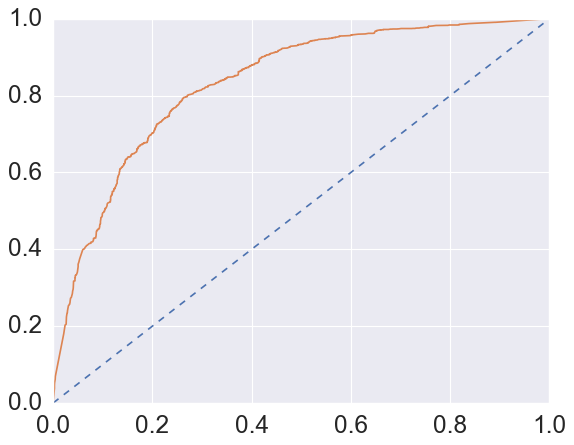

In [528]:
#AUC and ROC for the training data
# predict probabilities
probs = rf_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_tun_train_fpr, rf_tun_train_tpr, rf_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_tun_train_fpr, rf_tun_train_tpr)

In [529]:
## Performance Matrix on test data set
y_test_predict = rf_model_tun.predict(X_test_fs)
model_score = rf_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7164002368265245
[[1026  389]
 [  90  184]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1415
           1       0.32      0.67      0.43       274

    accuracy                           0.72      1689
   macro avg       0.62      0.70      0.62      1689
weighted avg       0.82      0.72      0.75      1689



In [530]:
from sklearn.metrics import accuracy_score 
rf_tun_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(rf_tun_metrics).transpose()
df
rf_tun_test_acc= accuracy_score(y_test, y_test_predict)
rf_tun_test_precision=round(df.loc["1"][0],2)
rf_tun_test_recall=round(df.loc["1"][1],2)
rf_tun_test_f1=round(df.loc["1"][2],2)
print ('rf_tun_test_acc ',rf_tun_test_acc)
print ('rf_tun_test_precision ',rf_tun_test_precision)
print ('rf_tun_test_recall ',rf_tun_test_recall)
print ('rf_tun_test_f1 ',rf_tun_test_f1)

rf_tun_test_acc  0.7164002368265245
rf_tun_test_precision  0.32
rf_tun_test_recall  0.67
rf_tun_test_f1  0.43


AUC: 0.761


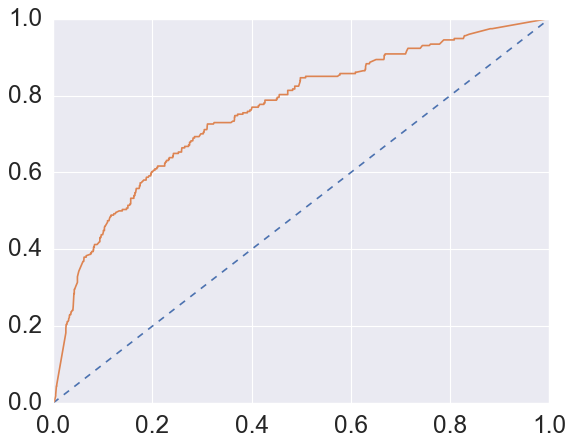

In [531]:
# AUC and ROC for the test data
# predict probabilities
probs = rf_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
rf_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_tun_test_auc)
# calculate roc curve
rf_tun_test_fpr, rf_tun_test_tpr, rf_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_tun_test_fpr, rf_tun_test_tpr)

In [532]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':rf_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0     CashbackAmount    0.633816
1  Customer_Category    0.366184

In [533]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'RF Train':[rf_tun_train_acc,rf_tun_train_auc,rf_tun_train_recall,rf_tun_train_precision,rf_tun_train_f1],
        'RF Test':[rf_tun_test_acc,rf_tun_test_auc,rf_tun_test_recall,rf_tun_test_precision,rf_tun_test_f1]},index=index
       )
round(data,2)

RF Train  RF Test
Accuracy       0.76     0.72
AUC            0.83     0.76
Recall         0.77     0.67
Precision      0.76     0.32
F1 Score       0.77     0.43

#### Linear Discriminant Analysis

In [534]:
X_train_fs = X_train[['Customer_Category', 'CashbackAmount']]

X_test_fs = X_test[['Customer_Category', 'CashbackAmount']]

In [535]:
LDAM = LinearDiscriminantAnalysis()

lda_param_grid = {"solver" : ["svd","lsqr", "eigen"],
              "tol" : [0.1,0.01,0.0001,0.0002,0.0003]
}

gsLDAM = GridSearchCV(LDAM, param_grid = lda_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv = 5)

In [536]:
gsLDAM.fit(X_train_fs, y_train)
lda_model_tun = gsLDAM.best_estimator_
lda_model_tun

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  41 tasks      | elapsed:    0.5s
[Parallel(n_jobs=7)]: Done  75 out of  75 | elapsed:    0.6s finished


LinearDiscriminantAnalysis(tol=0.1)

In [537]:
## Performance Matrix on train data set
y_train_predict = lda_model_tun.predict(X_train_fs)
model_score = lda_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.6587082950719314
[[1902 1365]
 [ 865 2402]]
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      3267
           1       0.64      0.74      0.68      3267

    accuracy                           0.66      6534
   macro avg       0.66      0.66      0.66      6534
weighted avg       0.66      0.66      0.66      6534



In [538]:
lda_tuned_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(lda_tuned_metrics).transpose()
df
lda_tuned_train_acc= accuracy_score(y_train, y_train_predict)
lda_tuned_train_precision=round(df.loc["1"][0],2)
lda_tuned_train_recall=round(df.loc["1"][1],2)
lda_tuned_train_f1=round(df.loc["1"][2],2)
print ('lda_tuned_train_acc ',lda_tuned_train_acc)
print ('lda_tuned_train_precision ',lda_tuned_train_precision)
print ('lda_tuned_train_recall ',lda_tuned_train_recall)
print ('lda_tuned_train_f1 ',lda_tuned_train_f1)


lda_tuned_train_acc  0.6587082950719314
lda_tuned_train_precision  0.64
lda_tuned_train_recall  0.74
lda_tuned_train_f1  0.68


AUC: 0.727


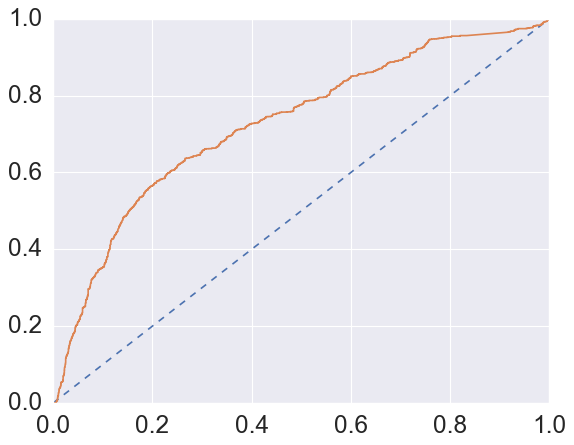

In [539]:
#AUC and ROC for the training data
# predict probabilities
probs = lda_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_tun_train_auc)
# calculate roc curve
lda_tun_train_fpr, lda_tun_train_tpr, lda_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tun_train_fpr, lda_tun_train_tpr)

In [540]:
## Performance Matrix on test data set
y_test_predict = lda_model_tun.predict(X_test_fs)
model_score = lda_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5849615156897573
[[787 628]
 [ 73 201]]
              precision    recall  f1-score   support

           0       0.92      0.56      0.69      1415
           1       0.24      0.73      0.36       274

    accuracy                           0.58      1689
   macro avg       0.58      0.64      0.53      1689
weighted avg       0.81      0.58      0.64      1689



In [541]:
lda_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(lda_tuned_metrics).transpose()
df
lda_tuned_test_acc= accuracy_score(y_test, y_test_predict)
lda_tuned_test_precision=round(df.loc["1"][0],2)
lda_tuned_test_recall=round(df.loc["1"][1],2)
lda_tuned_test_f1=round(df.loc["1"][2],2)
print ('lda_tuned_test_acc ',lda_tuned_test_acc)
print ('lda_tuned_test_precision ',lda_tuned_test_precision)
print ('lda_tuned_test_recall ',lda_tuned_test_recall)
print ('lda_tuned_test_f1 ',lda_tuned_test_f1)

lda_tuned_test_acc  0.5849615156897573
lda_tuned_test_precision  0.24
lda_tuned_test_recall  0.73
lda_tuned_test_f1  0.36


AUC: 0.725


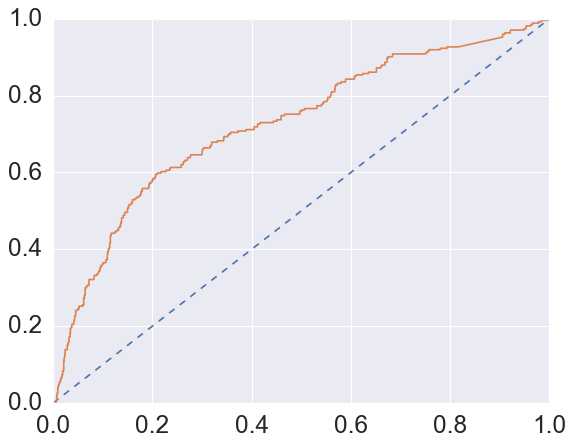

In [542]:
# AUC and ROC for the test data
# predict probabilities
probs = lda_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_tun_test_auc)
# calculate roc curve
lda_tun_test_fpr, lda_tun_test_tpr, lda_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tun_test_fpr, lda_tun_test_tpr)

In [543]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=lda_model_tun).fit(X_train_fs, y_train)

In [544]:
selected_feat= X_train_fs.columns[(selector.get_support())]
len(selected_feat)

1

In [545]:
print(selected_feat)

Index(['Customer_Category'], dtype='object')


In [546]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LDA Train':[lda_tuned_train_acc,lda_tun_train_auc,lda_tuned_train_recall,lda_tuned_train_precision,lda_tuned_train_f1],
        'LDA Test':[lda_tuned_test_acc,lda_tun_test_auc,lda_tuned_test_recall,lda_tuned_test_precision,lda_tuned_test_f1]},index=index
       )
round(data,2)

LDA Train  LDA Test
Accuracy        0.66      0.58
AUC             0.73      0.73
Recall          0.74      0.73
Precision       0.64      0.24
F1 Score        0.68      0.36

#### KNN Model

In [547]:
X_train_fs = X_train[['Customer_Category', 'CashbackAmount']]

X_test_fs = X_test[['Customer_Category', 'CashbackAmount']]

In [548]:
KNNM = KNeighborsClassifier()

knn_param_grid = {
'n_neighbors': [5,6,7],
'weights': ['uniform', 'distance'],
'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
'leaf_size' : [1,2,3] ,
'p' : [1,2]
}

gsKNNM = GridSearchCV(KNNM, param_grid = knn_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [549]:
gsKNNM.fit(X_train_fs, y_train)
knn_model_tun = gsKNNM.best_estimator_
knn_model_tun

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done 146 tasks      | elapsed:    2.1s
[Parallel(n_jobs=7)]: Done 720 out of 720 | elapsed:   19.2s finished


KNeighborsClassifier(algorithm='brute', leaf_size=1, n_neighbors=7)

In [550]:
## Performance Matrix on train data set
y_train_predict = knn_model_tun.predict(X_train_fs)
model_score = knn_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8142026323844506
[[2599  668]
 [ 546 2721]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      3267
           1       0.80      0.83      0.82      3267

    accuracy                           0.81      6534
   macro avg       0.81      0.81      0.81      6534
weighted avg       0.81      0.81      0.81      6534



In [551]:
knn_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(knn_tun_metrics).transpose()
df
knn_tun_train_acc= accuracy_score(y_train, y_train_predict)
knn_tun_train_precision=round(df.loc["1"][0],2)
knn_tun_train_recall=round(df.loc["1"][1],2)
knn_tun_train_f1=round(df.loc["1"][2],2)
print ('knn_tun_train_acc ',knn_tun_train_acc)
print ('knn_tun_train_precision ',knn_tun_train_precision)
print ('knn_tun_train_recall ',knn_tun_train_recall)
print ('knn_tun_train_f1 ',knn_tun_train_f1)

knn_tun_train_acc  0.8142026323844506
knn_tun_train_precision  0.8
knn_tun_train_recall  0.83
knn_tun_train_f1  0.82


AUC: 0.904


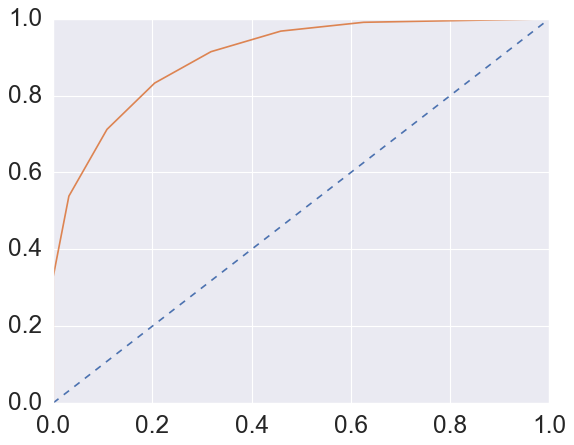

In [552]:
#AUC and ROC for the training data
# predict probabilities
probs = knn_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_tun_train_auc)
# calculate roc curve
knn_tun_train_fpr, knn_tun_train_tpr, knn_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tun_train_fpr, knn_tun_train_tpr)

In [553]:
## Performance Matrix on test data set
y_test_predict = knn_model_tun.predict(X_test_fs)
model_score = knn_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7122557726465364
[[1013  402]
 [  84  190]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1415
           1       0.32      0.69      0.44       274

    accuracy                           0.71      1689
   macro avg       0.62      0.70      0.62      1689
weighted avg       0.83      0.71      0.75      1689



In [554]:
knn_tun_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(knn_tun_metrics).transpose()
df
knn_tun_test_acc= accuracy_score(y_test, y_test_predict)
knn_tun_test_precision=round(df.loc["1"][0],2)
knn_tun_test_recall=round(df.loc["1"][1],2)
knn_tun_test_f1=round(df.loc["1"][2],2)
print ('knn_tun_test_acc ',knn_tun_test_acc)
print ('knn_tun_test_precision ',knn_tun_test_precision)
print ('knn_tun_test_recall ',knn_tun_test_recall)
print ('knn_tun_test_f1 ',knn_tun_test_f1)

knn_tun_test_acc  0.7122557726465364
knn_tun_test_precision  0.32
knn_tun_test_recall  0.69
knn_tun_test_f1  0.44


AUC: 0.796


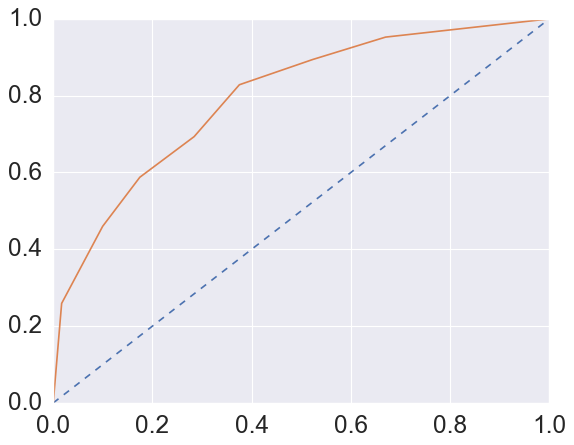

In [555]:
# AUC and ROC for the test data
# predict probabilities
probs = knn_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_tun_test_auc)
# calculate roc curve
knn_tun_test_fpr, knn_tun_test_tpr, knn_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tun_test_fpr, knn_tun_test_tpr)

In [556]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN Train':[knn_tun_train_acc,knn_tun_train_auc,knn_tun_train_recall,knn_tun_train_precision,knn_tun_train_f1],
        'KNN Test':[knn_tun_test_acc,knn_tun_test_auc,knn_tun_test_recall,knn_tun_test_precision,knn_tun_test_f1]},index=index
       )
round(data,2)

KNN Train  KNN Test
Accuracy        0.81      0.71
AUC             0.90      0.80
Recall          0.83      0.69
Precision       0.80      0.32
F1 Score        0.82      0.44

#### Naive Bayes Model

There are no parameters to tune for Naive Bayes

#### SVM 

In [557]:
X_train_fs = X_train[['Customer_Category','CashbackAmount']]

X_test_fs = X_test[['Customer_Category','CashbackAmount']]

In [558]:
SVMM= svm.SVC(random_state=1,probability=True)

svm_param_grid = {
'C': [0.01, 0.1],
'kernel': ['linear'],
'gamma': [0.1,0.01],
'tol' : [0.1,0.01]
}


gsSVMM = GridSearchCV(SVMM, param_grid = svm_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [559]:
gsSVMM.fit(X_train_fs, y_train)
svm_model_tun = gsSVMM.best_estimator_
svm_model_tun

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  40 out of  40 | elapsed:   26.9s finished


SVC(C=0.01, gamma=0.1, kernel='linear', probability=True, random_state=1,
    tol=0.1)

In [560]:
## Performance Matrix on train data set
y_train_predict = svm_model_tun.predict(X_train_fs)
model_score = svm_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.6466176920722375
[[1723 1544]
 [ 765 2502]]
              precision    recall  f1-score   support

           0       0.69      0.53      0.60      3267
           1       0.62      0.77      0.68      3267

    accuracy                           0.65      6534
   macro avg       0.66      0.65      0.64      6534
weighted avg       0.66      0.65      0.64      6534



In [561]:
svm_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(svm_tun_metrics).transpose()
df
svm_tun_train_acc= accuracy_score(y_train, y_train_predict)
svm_tun_train_precision=round(df.loc["1"][0],2)
svm_tun_train_recall=round(df.loc["1"][1],2)
svm_tun_train_f1=round(df.loc["1"][2],2)
print ('svm_tun_train_acc ',svm_tun_train_acc)
print ('svm_tun_train_precision ',svm_tun_train_precision)
print ('svm_tun_train_recall ',svm_tun_train_recall)
print ('svm_tun_train_f1 ',svm_tun_train_f1)

svm_tun_train_acc  0.6466176920722375
svm_tun_train_precision  0.62
svm_tun_train_recall  0.77
svm_tun_train_f1  0.68


AUC: 0.725


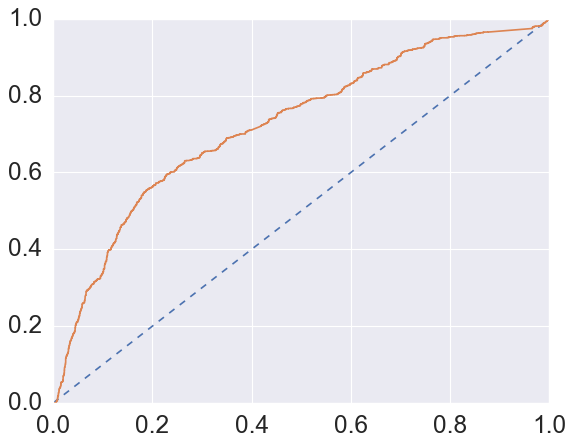

In [562]:
#AUC and ROC for the training data
# predict probabilities
probs = svm_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % svm_tun_train_auc)
# calculate roc curve
svm_tun_train_fpr, svm_tun_train_tpr, svm_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_tun_train_fpr, svm_tun_train_tpr)

In [563]:
## Performance Matrix on test data set
y_test_predict = svm_model_tun.predict(X_test_fs)
model_score = svm_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5429248075784487
[[710 705]
 [ 67 207]]
              precision    recall  f1-score   support

           0       0.91      0.50      0.65      1415
           1       0.23      0.76      0.35       274

    accuracy                           0.54      1689
   macro avg       0.57      0.63      0.50      1689
weighted avg       0.80      0.54      0.60      1689



In [564]:
svm_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(svm_tuned_metrics).transpose()
df
svm_tun_test_acc= accuracy_score(y_test, y_test_predict)
svm_tun_test_precision=round(df.loc["1"][0],2)
svm_tun_test_recall=round(df.loc["1"][1],2)
svm_tun_test_f1=round(df.loc["1"][2],2)
print ('svm_tun_test_acc ',svm_tun_test_acc)
print ('svm_tun_test_precision ',svm_tun_test_precision)
print ('svm_tun_test_recall ',svm_tun_test_recall)
print ('svm_tun_test_f1 ',svm_tun_test_f1)

svm_tun_test_acc  0.5429248075784487
svm_tun_test_precision  0.23
svm_tun_test_recall  0.76
svm_tun_test_f1  0.35


AUC: 0.719


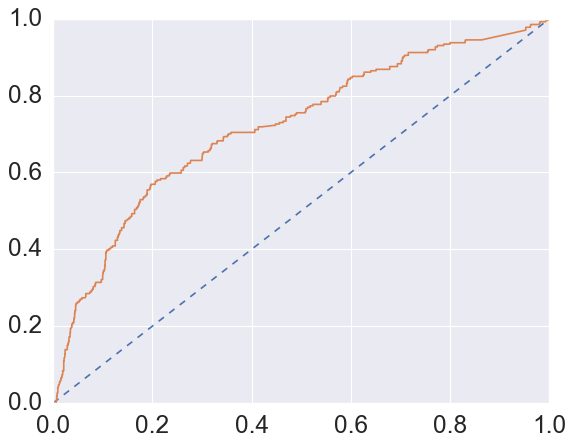

In [565]:
# AUC and ROC for the test data
# predict probabilities
probs = svm_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % svm_tun_test_auc)
# calculate roc curve
svm_tun_test_fpr, svm_tun_test_tpr, svm_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_tun_test_fpr, svm_tun_test_tpr)

In [566]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'SVM Train':[svm_tun_train_acc,svm_tun_train_auc,svm_tun_train_recall,svm_tun_train_precision,svm_tun_train_f1],
        'SVM Test':[svm_tun_test_acc,svm_tun_test_auc,svm_tun_test_recall,svm_tun_test_precision,svm_tun_test_f1]},index=index
       )
round(data,2)

SVM Train  SVM Test
Accuracy        0.65      0.54
AUC             0.72      0.72
Recall          0.77      0.76
Precision       0.62      0.23
F1 Score        0.68      0.35

### Tuned Neural Network

In [567]:
X_train_fs = X_train[['Customer_Category','User_Activity','CashbackAmount']]

X_test_fs = X_test[['Customer_Category','User_Activity','CashbackAmount']]

In [568]:
parameters = {'solver': ['lbfgs','sgd'], 
              'max_iter': [500,1000], 
              'alpha': 10.0 ** -np.arange(1, 10), 
              'hidden_layer_sizes':[50,100,200],
              'tol': [0.01,0.1]}

gsANNM = GridSearchCV(MLPClassifier(random_state=21), parameters, n_jobs=7,verbose=1)

In [569]:
gsANNM.fit(X_train_fs, y_train)
ann_model_tun = gsANNM.best_estimator_
ann_model_tun

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  58 tasks      | elapsed:    3.3s
[Parallel(n_jobs=7)]: Done 226 tasks      | elapsed:   16.5s
[Parallel(n_jobs=7)]: Done 476 tasks      | elapsed:   37.8s
[Parallel(n_jobs=7)]: Done 826 tasks      | elapsed:  1.1min
[Parallel(n_jobs=7)]: Done 1080 out of 1080 | elapsed:  1.4min finished


MLPClassifier(alpha=0.1, hidden_layer_sizes=200, max_iter=500, random_state=21,
              solver='sgd', tol=0.1)

In [570]:
## Performance Matrix on train data set
y_train_predict = ann_model_tun.predict(X_train_fs)
model_score = ann_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.6883991429445975
[[2264 1003]
 [1033 2234]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      3267
           1       0.69      0.68      0.69      3267

    accuracy                           0.69      6534
   macro avg       0.69      0.69      0.69      6534
weighted avg       0.69      0.69      0.69      6534



In [571]:
ann_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(ann_tun_metrics).transpose()
df
ann_tun_train_acc= accuracy_score(y_train, y_train_predict)
ann_tun_train_precision=round(df.loc["1"][0],2)
ann_tun_train_recall=round(df.loc["1"][1],2)
ann_tun_train_f1=round(df.loc["1"][2],2)
print ('ann_tun_train_acc ',ann_tun_train_acc)
print ('ann_tun_train_precision ',ann_tun_train_precision)
print ('ann_tun_train_recall ',ann_tun_train_recall)
print ('ann_tun_train_f1 ',ann_tun_train_f1)

ann_tun_train_acc  0.6883991429445975
ann_tun_train_precision  0.69
ann_tun_train_recall  0.68
ann_tun_train_f1  0.69


AUC: 0.728


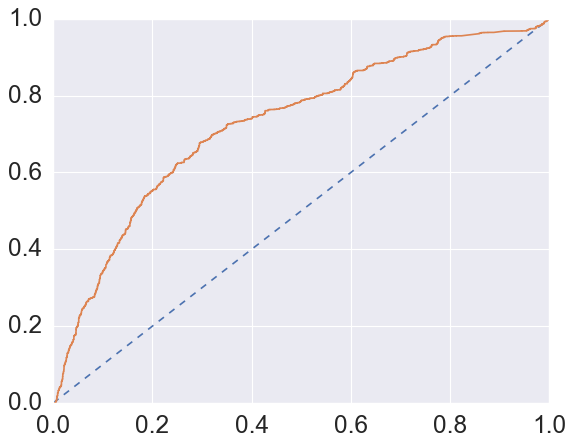

In [572]:
#AUC and ROC for the training data
# predict probabilities
probs = ann_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ann_tun_train_auc)
# calculate roc curve
ann_tun_train_fpr, ann_tun_train_tpr, ann_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_tun_train_fpr, ann_tun_train_tpr)

In [573]:
## Performance Matrix on test data set
y_test_predict = ann_model_tun.predict(X_test_fs)
model_score = ann_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6731793960923623
[[952 463]
 [ 89 185]]
              precision    recall  f1-score   support

           0       0.91      0.67      0.78      1415
           1       0.29      0.68      0.40       274

    accuracy                           0.67      1689
   macro avg       0.60      0.67      0.59      1689
weighted avg       0.81      0.67      0.71      1689



In [574]:
ann_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(ann_tuned_metrics).transpose()
df
ann_tun_test_acc= accuracy_score(y_test, y_test_predict)
ann_tun_test_precision=round(df.loc["1"][0],2)
ann_tun_test_recall=round(df.loc["1"][1],2)
ann_tun_test_f1=round(df.loc["1"][2],2)
print ('ann_tun_test_acc ',ann_tun_test_acc)
print ('ann_tun_test_precision ',ann_tun_test_precision)
print ('ann_tun_test_recall ',ann_tun_test_recall)
print ('ann_tun_test_f1 ',ann_tun_test_f1)

ann_tun_test_acc  0.6731793960923623
ann_tun_test_precision  0.29
ann_tun_test_recall  0.68
ann_tun_test_f1  0.4


AUC: 0.725


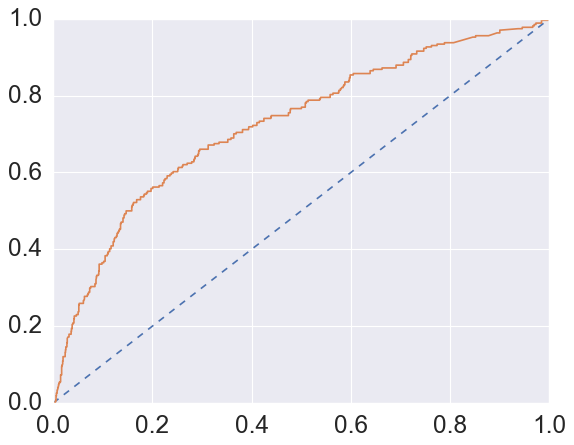

In [575]:
# AUC and ROC for the test data
# predict probabilities
probs = ann_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ann_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ann_tun_test_auc)
# calculate roc curve
ann_tun_test_fpr, ann_tun_test_tpr, ann_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_tun_test_fpr, ann_tun_test_tpr)

In [576]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'ANN Train':[ann_tun_train_acc,ann_tun_train_auc,ann_tun_train_recall,ann_tun_train_precision,ann_tun_train_f1],
        'ANN Test':[ann_tun_test_acc,ann_tun_test_auc,ann_tun_test_recall,ann_tun_test_precision,ann_tun_test_f1]},index=index
       )
round(data,2)

ANN Train  ANN Test
Accuracy        0.69      0.67
AUC             0.73      0.72
Recall          0.68      0.68
Precision       0.69      0.29
F1 Score        0.69      0.40

### Tuned Bagging and Boosting models

#### Bagging Model

In [577]:
X_train_fs = X_train[['Customer_Category','CashbackAmount']]

X_test_fs = X_test[['Customer_Category','CashbackAmount']]

In [578]:
# create the classifier
params = {'n_estimators': [40,50,60], 
          'base_estimator__max_leaf_nodes':[25,35], 
          'base_estimator__max_depth':[5,10,15]}

dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, oob_score=True, random_state=1) #n_estimators=70, random_state=1)

# Grid Search to determine best parameters
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='recall', cv=5, n_jobs=7,verbose=1)

In [579]:
bc_grid.fit(X_train_fs, y_train)
bagging_model_tun = bc_grid.best_estimator_
bagging_model_tun

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    2.8s
[Parallel(n_jobs=7)]: Done  90 out of  90 | elapsed:    7.0s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                        max_leaf_nodes=35),
                  n_estimators=40, oob_score=True, random_state=1)

In [580]:
## Performance Matrix on train data set
y_train_predict = bagging_model_tun.predict(X_train_fs)
model_score =bagging_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7549739822467095
[[2413  854]
 [ 747 2520]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      3267
           1       0.75      0.77      0.76      3267

    accuracy                           0.75      6534
   macro avg       0.76      0.75      0.75      6534
weighted avg       0.76      0.75      0.75      6534



In [581]:
bagging_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(bagging_tun_metrics).transpose()
df
bag_tun_train_acc= accuracy_score(y_train, y_train_predict)
bag_tun_train_precision=round(df.loc["1"][0],2)
bag_tun_train_recall=round(df.loc["1"][1],2)
bag_tun_train_f1=round(df.loc["1"][2],2)
print ('bag_tun_train_acc ',bag_tun_train_acc)
print ('bag_tun_train_precision ',bag_tun_train_precision)
print ('bag_tun_train_recall ',bag_tun_train_recall)
print ('bag_tun_train_f1 ',bag_tun_train_f1)

bag_tun_train_acc  0.7549739822467095
bag_tun_train_precision  0.75
bag_tun_train_recall  0.77
bag_tun_train_f1  0.76


AUC: 0.829


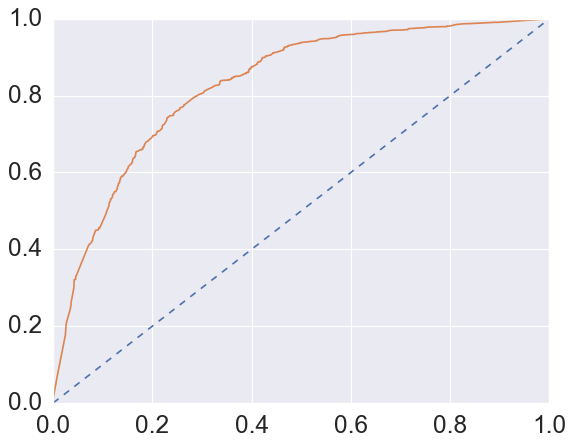

In [582]:
#AUC and ROC for the training data
# predict probabilities
probs = bagging_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_tun_train_auc)
# calculate roc curve
bag_tun_train_fpr, bag_tun_train_tpr, bag_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_tun_train_fpr, bag_tun_train_tpr)

In [583]:
## Performance Matrix on test data set
y_test_predict = bagging_model_tun.predict(X_test_fs)
model_score = bagging_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7087033747779752
[[1008  407]
 [  85  189]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1415
           1       0.32      0.69      0.43       274

    accuracy                           0.71      1689
   macro avg       0.62      0.70      0.62      1689
weighted avg       0.82      0.71      0.74      1689



In [584]:
bag_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(bag_tuned_metrics).transpose()
df
bag_tun_test_acc= accuracy_score(y_test, y_test_predict)
bag_tun_test_precision=round(df.loc["1"][0],2)
bag_tun_test_recall=round(df.loc["1"][1],2)
bag_tun_test_f1=round(df.loc["1"][2],2)
print ('bag_tun_test_acc ',bag_tun_test_acc)
print ('bag_tun_test_precision ',bag_tun_test_precision)
print ('bag_tun_test_recall ',bag_tun_test_recall)
print ('bag_tun_test_f1 ',bag_tun_test_f1)

bag_tun_test_acc  0.7087033747779752
bag_tun_test_precision  0.32
bag_tun_test_recall  0.69
bag_tun_test_f1  0.43


AUC: 0.762


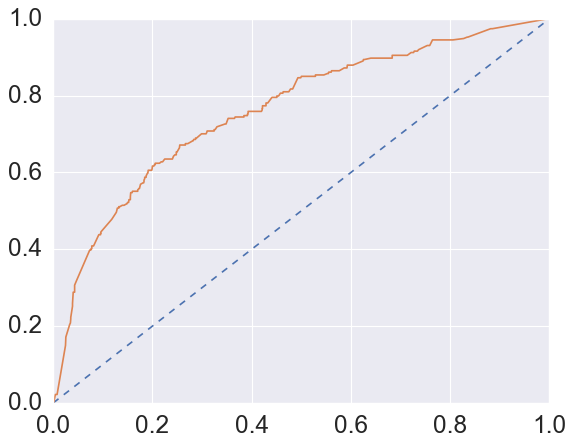

In [585]:
# AUC and ROC for the test data
# predict probabilities
probs = bagging_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_tun_test_auc)
# calculate roc curve
bag_tun_test_fpr, bag_tun_test_tpr, bag_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_tun_test_fpr, bag_tun_test_tpr)

In [586]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Bag Train':[bag_tun_train_acc,bag_tun_train_auc,bag_tun_train_recall,bag_tun_train_precision,bag_tun_train_f1],
        'Bag Test':[bag_tun_test_acc,bag_tun_test_auc,bag_tun_test_recall,bag_tun_test_precision,bag_tun_test_f1]},index=index
       )
round(data,2)

Bag Train  Bag Test
Accuracy        0.75      0.71
AUC             0.83      0.76
Recall          0.77      0.69
Precision       0.75      0.32
F1 Score        0.76      0.43

### AdaBoost

In [587]:
X_train_fs = X_train[['Customer_Category','CashbackAmount']]

X_test_fs = X_test[['Customer_Category','CashbackAmount']]

In [588]:
from sklearn.ensemble import AdaBoostClassifier

ABCM = AdaBoostClassifier(DecisionTreeClassifier(random_state=1),random_state = 1)

abcm_param_grid = {"base_estimator__max_depth" :[10,20],
                   "n_estimators" :[500,1000],
                   "learning_rate":  [0.05, 0.5, 1.5, 2.5]}

gsABCM = GridSearchCV(ABCM, param_grid = abcm_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [589]:
gsABCM.fit(X_train_fs, y_train)
abcm_model_tun = gsABCM.best_estimator_
abcm_model_tun

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:   43.0s
[Parallel(n_jobs=7)]: Done  80 out of  80 | elapsed:  1.6min finished


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                         random_state=1),
                   learning_rate=1.5, n_estimators=1000, random_state=1)

In [590]:
## Performance Matrix on train data set
y_train_predict = abcm_model_tun.predict(X_train_fs)
model_score = abcm_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9850015304560759
[[3220   47]
 [  51 3216]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3267
           1       0.99      0.98      0.98      3267

    accuracy                           0.99      6534
   macro avg       0.99      0.99      0.99      6534
weighted avg       0.99      0.99      0.99      6534



In [591]:
adb_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(adb_tun_metrics).transpose()
df
adb_tun_train_acc= accuracy_score(y_train, y_train_predict)
adb_tun_train_precision=round(df.loc["1"][0],2)
adb_tun_train_recall=round(df.loc["1"][1],2)
adb_tun_train_f1=round(df.loc["1"][2],2)
print ('adb_tun_train_acc ',adb_tun_train_acc)
print ('adb_tun_train_precision ',adb_tun_train_precision)
print ('adb_tun_train_recall ',adb_tun_train_recall)
print ('adb_tun_train_f1 ',adb_tun_train_f1)

adb_tun_train_acc  0.9850015304560759
adb_tun_train_precision  0.99
adb_tun_train_recall  0.98
adb_tun_train_f1  0.98


AUC: 0.999


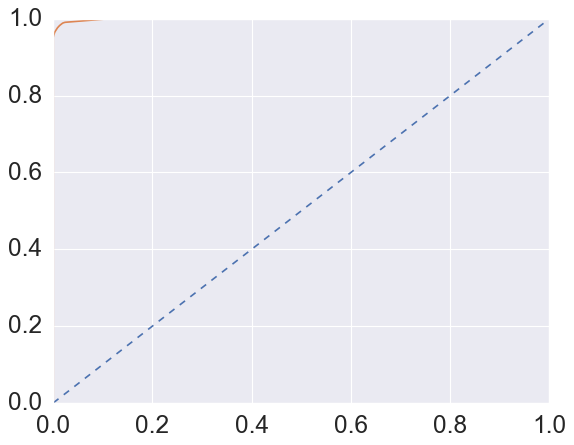

In [592]:
#AUC and ROC for the training data
# predict probabilities
probs = abcm_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_tun_train_auc)
# calculate roc curve
adb_tun_train_fpr, adb_tun_train_tpr, adb_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_tun_train_fpr, adb_tun_train_tpr)

In [593]:
## Performance Matrix on test data set
y_test_predict = abcm_model_tun.predict(X_test_fs)
model_score = abcm_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8602723505032563
[[1225  190]
 [  46  228]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1415
           1       0.55      0.83      0.66       274

    accuracy                           0.86      1689
   macro avg       0.75      0.85      0.79      1689
weighted avg       0.90      0.86      0.87      1689



In [594]:
adb_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(adb_tuned_metrics).transpose()
df
adb_tun_test_acc= accuracy_score(y_test, y_test_predict)
adb_tun_test_precision=round(df.loc["1"][0],2)
adb_tun_test_recall=round(df.loc["1"][1],2)
adb_tun_test_f1=round(df.loc["1"][2],2)
print ('adb_tun_test_acc ',adb_tun_test_acc)
print ('adb_tun_test_precision ',adb_tun_test_precision)
print ('adb_tun_test_recall ',adb_tun_test_recall)
print ('adb_tun_test_f1 ',adb_tun_test_f1)

adb_tun_test_acc  0.8602723505032563
adb_tun_test_precision  0.55
adb_tun_test_recall  0.83
adb_tun_test_f1  0.66


AUC: 0.895


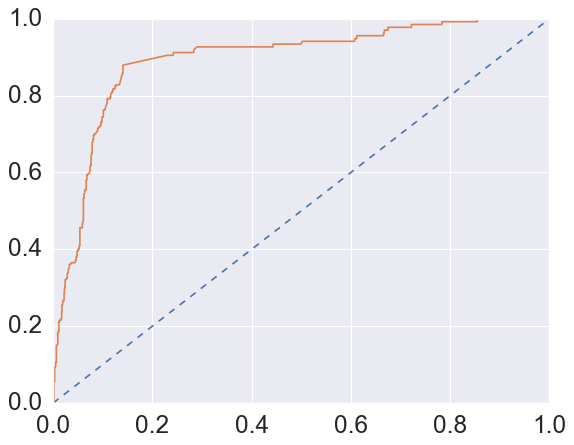

In [595]:
# AUC and ROC for the test data
# predict probabilities
probs = abcm_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_tun_test_auc)
# calculate roc curve
adb_tun_test_fpr, adb_tun_test_tpr, adb_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_tun_test_fpr, adb_tun_test_tpr)

In [596]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':abcm_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0  Customer_Category         NaN
1     CashbackAmount         NaN

In [597]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'ADB Train':[adb_tun_train_acc,adb_tun_train_auc,adb_tun_train_recall,adb_tun_train_precision,adb_tun_train_f1],
        'ADB Test':[adb_tun_test_acc,adb_tun_test_auc,adb_tun_test_recall,adb_tun_test_precision,adb_tun_test_f1]},index=index
       )
round(data,2)

ADB Train  ADB Test
Accuracy        0.99      0.86
AUC             1.00      0.89
Recall          0.98      0.83
Precision       0.99      0.55
F1 Score        0.98      0.66

#### XGBoost

In [598]:
X_train_fs = X_train[['Customer_Category', 'Complain']]

X_test_fs = X_test[['Customer_Category', 'Complain']]

In [599]:
import xgboost as xgb

XGBM = xgb.XGBClassifier(random_state=1)

xgbm_param_grid = {'n_estimators': [50,100],
                    'min_child_weight': [2,3],
                    'subsample': [1.0,1.2],
                    'colsample_bytree': [1.0,2.0],
                    'max_depth': [3, 4]}

gsXGBM = GridSearchCV(XGBM, param_grid = xgbm_param_grid, scoring="recall", n_jobs= 7, verbose = 1, cv =5)

In [600]:
gsXGBM.fit(X_train_fs, y_train)
xgbm_model_tun = gsXGBM.best_estimator_
xgbm_model_tun

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    3.6s
[Parallel(n_jobs=7)]: Done 160 out of 160 | elapsed:    4.3s finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [601]:
## Performance Matrix on train data set
y_train_predict = xgbm_model_tun.predict(X_train_fs)
model_score = xgbm_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.6476890113253749
[[2405  862]
 [1440 1827]]
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      3267
           1       0.68      0.56      0.61      3267

    accuracy                           0.65      6534
   macro avg       0.65      0.65      0.64      6534
weighted avg       0.65      0.65      0.64      6534



In [602]:
xgb_tun_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(xgb_tun_metrics).transpose()
df
xgb_tun_train_acc= accuracy_score(y_train, y_train_predict)
xgb_tun_train_precision=round(df.loc["1"][0],2)
xgb_tun_train_recall=round(df.loc["1"][1],2)
xgb_tun_train_f1=round(df.loc["1"][2],2)
print ('xgb_tun_train_acc ',xgb_tun_train_acc)
print ('xgb_tun_train_precision ',xgb_tun_train_precision)
print ('xgb_tun_train_recall ',xgb_tun_train_recall)
print ('xgb_tun_train_f1 ',xgb_tun_train_f1)

xgb_tun_train_acc  0.6476890113253749
xgb_tun_train_precision  0.68
xgb_tun_train_recall  0.56
xgb_tun_train_f1  0.61


AUC: 0.689


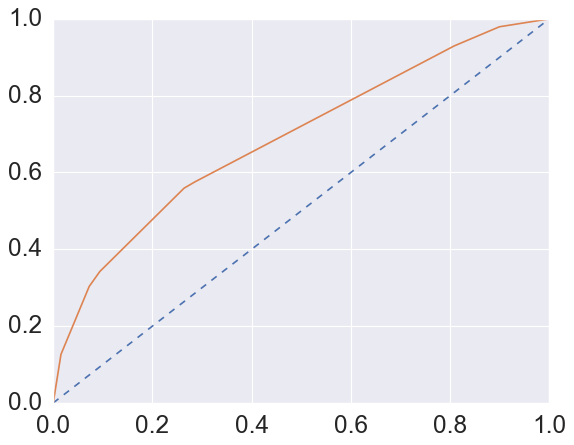

In [603]:
#AUC and ROC for the training data
# predict probabilities
probs = xgbm_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_tun_train_auc)
# calculate roc curve
xgb_tun_train_fpr, xgb_tun_train_tpr, xgb_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_tun_train_fpr, xgb_tun_train_tpr)

In [604]:
## Performance Matrix on test data set
y_test_predict = xgbm_model_tun.predict(X_test_fs)
model_score = xgbm_model_tun.score(X_test_fs, y_test)
print(model_score)

print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7039668442865601
[[1009  406]
 [  94  180]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1415
           1       0.31      0.66      0.42       274

    accuracy                           0.70      1689
   macro avg       0.61      0.69      0.61      1689
weighted avg       0.82      0.70      0.74      1689



In [605]:
xgb_tuned_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(xgb_tuned_metrics).transpose()
df
xgb_tun_test_acc= accuracy_score(y_test, y_test_predict)
xgb_tun_test_precision=round(df.loc["1"][0],2)
xgb_tun_test_recall=round(df.loc["1"][1],2)
xgb_tun_test_f1=round(df.loc["1"][2],2)
print ('xgb_tun_test_acc ',xgb_tun_test_acc)
print ('xgb_tun_test_precision ',xgb_tun_test_precision)
print ('xgb_tun_test_recall ',xgb_tun_test_recall)
print ('xgb_tun_test_f1 ',xgb_tun_test_f1)

xgb_tun_test_acc  0.7039668442865601
xgb_tun_test_precision  0.31
xgb_tun_test_recall  0.66
xgb_tun_test_f1  0.42


AUC: 0.737


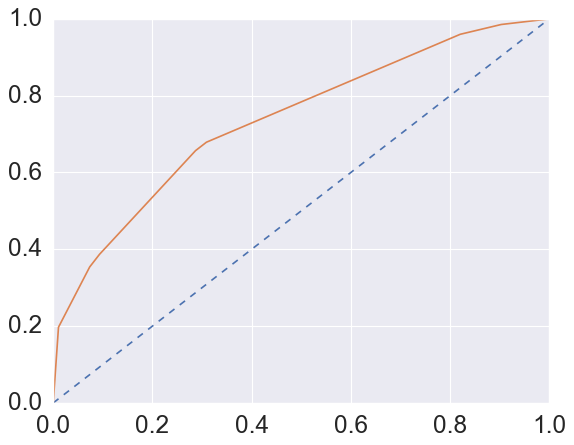

In [606]:
# AUC and ROC for the test data
# predict probabilities
probs = xgbm_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_tun_test_auc)
# calculate roc curve
xgb_tun_test_fpr, xgb_tun_test_tpr, xgb_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_tun_test_fpr, xgb_tun_test_tpr)

In [607]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':xgbm_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
0  Customer_Category    0.667188
1           Complain    0.332812

In [608]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'XGB Train':[xgb_tun_train_acc,xgb_tun_train_auc,xgb_tun_train_recall,xgb_tun_train_precision,xgb_tun_train_f1],
        'XGB Test':[xgb_tun_test_acc,xgb_tun_test_auc,xgb_tun_test_recall,xgb_tun_test_precision,xgb_tun_test_f1]},index=index
       )
round(data,2)

XGB Train  XGB Test
Accuracy        0.65      0.70
AUC             0.69      0.74
Recall          0.56      0.66
Precision       0.68      0.31
F1 Score        0.61      0.42

In [609]:
eli5.explain_weights(xgbm_model_tun,feature_names=list(X_train_fs.columns))

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.300000012, max_delta_step=0, max_depth=3,\n              min_child_weight=2, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Customer_Category', weight=0.6671878, std=None, value=None), FeatureWeight(feature='Complain', weight=0.3328122, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [610]:
eli5.explain_prediction(xgbm_model_tun, X_train_fs.iloc[1], feature_names = list(X_train_fs.columns)) 

Explanation(estimator="XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,\n              importance_type='gain', interaction_constraints='',\n              learning_rate=0.300000012, max_delta_step=0, max_depth=3,\n              min_child_weight=2, missing=nan, monotone_constraints='()',\n              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=1,\n              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,\n              tree_method='exact', validate_parameters=1, verbosity=None)", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='Customer_Category', weight=1.3113502099631407, std=None, value=-2.483824145392262), FeatureWeight(feature='Complain', weight=0.28108111694818394, std=None, value=-0.676391997502245)], neg=[FeatureWeight(feature='<BIAS>', weight=-0.00407053198523219, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.8303854, score=-1.5883607949260916, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## Comparison of Tuned Models

In [611]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_tuned_train_acc,lr_tun_train_auc,lr_tuned_train_recall,lr_tuned_train_precision,lr_tuned_train_f1],
        'LR Test':[lr_tuned_test_acc,lr_tun_test_auc,lr_tuned_test_recall,lr_tuned_test_precision,lr_tuned_test_f1],
        'DT Train':[dt_tuned_train_acc,dt_tun_train_auc,dt_tuned_train_recall,dt_tuned_train_precision,dt_tuned_train_f1],
        'DT Test':[dt_tuned_test_acc,dt_tun_test_auc,dt_tuned_test_recall,dt_tuned_test_precision,dt_tuned_test_f1],
        'RF Train':[rf_tun_train_acc,rf_tun_train_auc,rf_tun_train_recall,rf_tun_train_precision,rf_tun_train_f1],
        'RF Test':[rf_tun_test_acc,rf_tun_test_auc,rf_tun_test_recall,rf_tun_test_precision,rf_tun_test_f1],
        'LDA Train':[lda_tuned_train_acc,lda_tun_train_auc,lda_tuned_train_recall,lda_tuned_train_precision,lda_tuned_train_f1],
        'LDA Test':[lda_tuned_test_acc,lda_tun_test_auc,lda_tuned_test_recall,lda_tuned_test_precision,lda_tuned_test_f1],
       'KNN Train':[knn_tun_train_acc,knn_tun_train_auc,knn_tun_train_recall,knn_tun_train_precision,knn_tun_train_f1],
        'KNN Test':[knn_tun_test_acc,knn_tun_test_auc,knn_tun_test_recall,knn_tun_test_precision,knn_tun_test_f1],
        'SVM Train':[svm_tun_train_acc,svm_tun_train_auc,svm_tun_train_recall,svm_tun_train_precision,svm_tun_train_f1],
        'SVM Test':[svm_tun_test_acc,svm_tun_test_auc,svm_tun_test_recall,svm_tun_test_precision,svm_tun_test_f1],
        'Bag Train':[bag_tun_train_acc,bag_tun_train_auc,bag_tun_train_recall,bag_tun_train_precision,bag_tun_train_f1],
        'Bag Test':[bag_tun_test_acc,bag_tun_test_auc,bag_tun_test_recall,bag_tun_test_precision,bag_tun_test_f1],
        'ADB Train':[adb_tun_train_acc,adb_tun_train_auc,adb_tun_train_recall,adb_tun_train_precision,adb_tun_train_f1],
        'ADB Test':[adb_tun_test_acc,adb_tun_test_auc,adb_tun_test_recall,adb_tun_test_precision,adb_tun_test_f1],
        'XGB Train':[xgb_tun_train_acc,xgb_tun_train_auc,xgb_tun_train_recall,xgb_tun_train_precision,xgb_tun_train_f1],
        'XGB Test':[xgb_tun_test_acc,xgb_tun_test_auc,xgb_tun_test_recall,xgb_tun_test_precision,xgb_tun_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test  DT Train  DT Test  RF Train  RF Test  LDA Train  \
Accuracy       0.66     0.59      0.86     0.75      0.76     0.72       0.66   
AUC            0.73     0.73      0.95     0.83      0.83     0.76       0.73   
Recall         0.73     0.73      0.87     0.71      0.77     0.67       0.74   
Precision      0.64     0.25      0.85     0.36      0.76     0.32       0.64   
F1 Score       0.68     0.37      0.86     0.48      0.77     0.43       0.68   

           LDA Test  KNN Train  KNN Test  SVM Train  SVM Test  Bag Train  \
Accuracy       0.58       0.81      0.71       0.65      0.54       0.75   
AUC            0.73       0.90      0.80       0.72      0.72       0.83   
Recall         0.73       0.83      0.69       0.77      0.76       0.77   
Precision      0.24       0.80      0.32       0.62      0.23       0.75   
F1 Score       0.36       0.82      0.44       0.68      0.35       0.76   

           Bag Test  ADB Train  ADB Test  XGB Train  XGB Test  
Accuracy       0.71       0.99      0.86       0.65      0.70  
AUC            0.76       1.00      0.89       0.69      0.74  
Recall         0.69       0.98      0.83       0.56      0.66  
Precision      0.32       0.99      0.55       0.68      0.31  
F1 Score       0.43       0.98      0.66       0.61      0.42

### ROC Curve for all the tuned models on the Training data

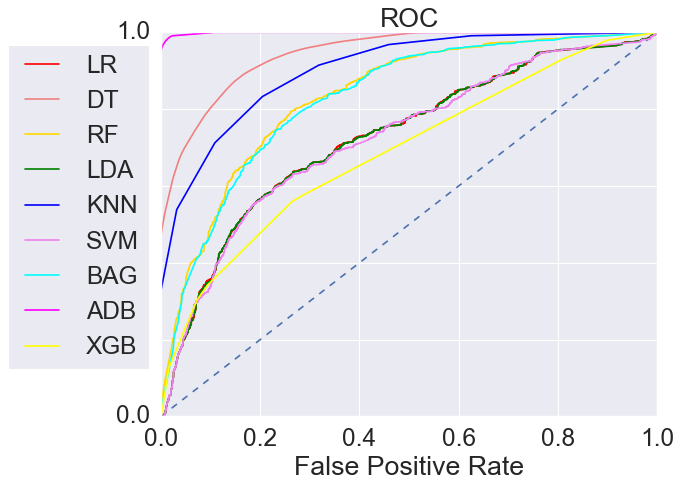

In [612]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_tun_train_fpr, lr_tun_train_tpr,color='red',label="LR")
plt.plot(dt_tun_train_fpr, dt_tun_train_tpr,color='lightcoral',label="DT")
plt.plot(rf_tun_train_fpr, rf_tun_train_tpr,color='gold',label="RF")
plt.plot(lda_tun_train_fpr,lda_tun_train_tpr,color='green',label="LDA")
plt.plot(knn_tun_train_fpr,knn_tun_train_tpr,color='blue',label="KNN")
plt.plot(svm_tun_train_fpr,svm_tun_train_tpr,color='violet',label="SVM")
plt.plot(bag_tun_train_fpr,bag_tun_train_tpr,color='cyan',label="BAG")
plt.plot(adb_tun_train_fpr,adb_tun_train_tpr,color='magenta',label="ADB")
plt.plot(xgb_tun_train_fpr,xgb_tun_train_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### ROC Curve for all the tuned models on the Test data

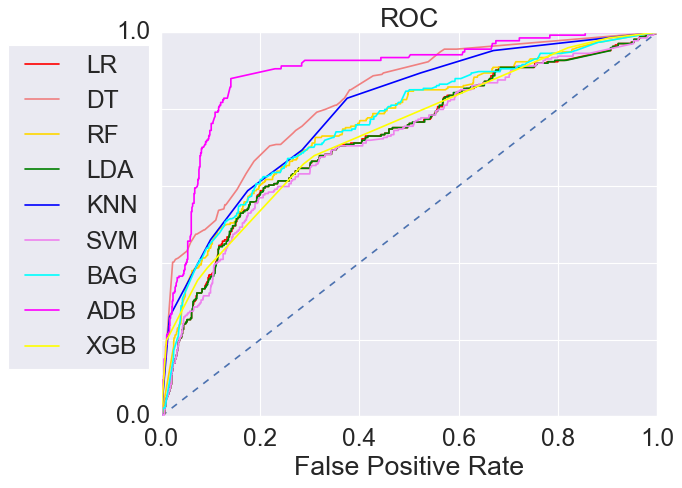

In [613]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_tun_test_fpr, lr_tun_test_tpr,color='red',label="LR")
plt.plot(dt_tun_test_fpr, dt_tun_test_tpr,color='lightcoral',label="DT")
plt.plot(rf_tun_test_fpr, rf_tun_test_tpr,color='gold',label="RF")
plt.plot(lda_tun_test_fpr,lda_tun_test_tpr,color='green',label="LDA")
plt.plot(knn_tun_test_fpr,knn_tun_test_tpr,color='blue',label="KNN")
plt.plot(svm_tun_test_fpr,svm_tun_test_tpr,color='violet',label="SVM")
plt.plot(bag_tun_test_fpr,bag_tun_test_tpr,color='cyan',label="BAG")
plt.plot(adb_tun_test_fpr,adb_tun_test_tpr,color='magenta',label="ADB")
plt.plot(xgb_tun_test_fpr,xgb_tun_test_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

### Comparisson between Basic and Tuned Models

In [614]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
        'LR Tuned Train':[lr_tuned_train_acc,lr_tun_train_auc,lr_tuned_train_recall,lr_tuned_train_precision,lr_tuned_train_f1],
        'LR Tuned Test':[lr_tuned_test_acc,lr_tun_test_auc,lr_tuned_test_recall,lr_tuned_test_precision,lr_tuned_test_f1],
        'DT Train':[dt_train_acc,dt_train_auc,dt_train_recall,dt_train_precision,dt_train_f1],
        'DT Test':[dt_test_acc,dt_test_auc,dt_test_recall,dt_test_precision,dt_test_f1],
        'DT Tuned Train':[dt_tuned_train_acc,dt_tun_train_auc,dt_tuned_train_recall,dt_tuned_train_precision,dt_tuned_train_f1],
        'DT Tuned Test':[dt_tuned_test_acc,dt_tun_test_auc,dt_tuned_test_recall,dt_tuned_test_precision,dt_tuned_test_f1],
        'RF Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'RF Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'RF Tuned Train':[rf_tun_train_acc,rf_tun_train_auc,rf_tun_train_recall,rf_tun_train_precision,rf_tun_train_f1],
        'RF Tuned Test':[rf_tun_test_acc,rf_tun_test_auc,rf_tun_test_recall,rf_tun_test_precision,rf_tun_test_f1],
        'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'LDA Tuned Train':[lda_tuned_train_acc,lda_tun_train_auc,lda_tuned_train_recall,lda_tuned_train_precision,lda_tuned_train_f1],
        'LDA Tuned Test':[lda_tuned_test_acc,lda_tun_test_auc,lda_tuned_test_recall,lda_tuned_test_precision,lda_tuned_test_f1],
       'KNN Train':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'KNN Tuned Train':[knn_tun_train_acc,knn_tun_train_auc,knn_tun_train_recall,knn_tun_train_precision,knn_tun_train_f1],
        'KNN Tuned Test':[knn_tun_test_acc,knn_tun_test_auc,knn_tun_test_recall,knn_tun_test_precision,knn_tun_test_f1],
        'NB Train':[nb_train_acc,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_acc,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'SVM Train':[svm_train_acc,svm_train_auc,svm_train_recall,svm_train_precision,svm_train_f1],
        'SVM Test':[svm_test_acc,svm_test_auc,svm_test_recall,svm_test_precision,svm_test_f1],
        'ANN Tuned Train':[ann_tun_train_acc,ann_tun_train_auc,ann_tun_train_recall,ann_tun_train_precision,ann_tun_train_f1],
        'ANN Tuned Test':[ann_tun_test_acc,ann_tun_test_auc,ann_tun_test_recall,ann_tun_test_precision,ann_tun_test_f1],
        'Bag Train':[bag_train_acc,bag_train_auc,bag_train_recall,bag_train_precision,bag_train_f1],
        'Bag Test':[bag_test_acc,bag_test_auc,bag_test_recall,bag_test_precision,bag_test_f1],
        'Bag Tuned Train':[bag_tun_train_acc,bag_tun_train_auc,bag_tun_train_recall,bag_tun_train_precision,bag_tun_train_f1],
        'Bag Tuned Test':[bag_tun_test_acc,bag_tun_test_auc,bag_tun_test_recall,bag_tun_test_precision,bag_tun_test_f1],
        'ADB Train':[adb_train_acc,adb_train_auc,adb_train_recall,adb_train_precision,adb_train_f1],
        'ADB Test':[adb_test_acc,adb_test_auc,adb_test_recall,adb_test_precision,adb_test_f1],
        'ADB Tuned Train':[adb_tun_train_acc,adb_tun_train_auc,adb_tun_train_recall,adb_tun_train_precision,adb_tun_train_f1],
        'ADB Tuned Test':[adb_tun_test_acc,adb_tun_test_auc,adb_tun_test_recall,adb_tun_test_precision,adb_tun_test_f1],
        'XGB Train':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
        'XGB Test':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1],
        'XGB Tuned Train':[xgb_tun_train_acc,xgb_tun_train_auc,xgb_tun_train_recall,xgb_tun_train_precision,xgb_tun_train_f1],
        'XGB Tuned Test':[xgb_tun_test_acc,xgb_tun_test_auc,xgb_tun_test_recall,xgb_tun_test_precision,xgb_tun_test_f1]},index=index
       )
round(data,2)

LR Train  LR Test  LR Tuned Train  LR Tuned Test  DT Train  \
Accuracy       0.80     0.75            0.66           0.59       1.0   
AUC            0.89     0.75            0.73           0.73       1.0   
Recall         0.81     0.57            0.73           0.73       1.0   
Precision      0.80     0.34            0.64           0.25       1.0   
F1 Score       0.80     0.43            0.68           0.37       1.0   

           DT Test  DT Tuned Train  DT Tuned Test  RF Train  RF Test  ...  \
Accuracy      0.84            0.86           0.75       1.0     0.91  ...   
AUC           0.77            0.95           0.83       1.0     0.93  ...   
Recall        0.67            0.87           0.71       1.0     0.74  ...   
Precision     0.51            0.85           0.36       1.0     0.72  ...   
F1 Score      0.58            0.86           0.48       1.0     0.73  ...   

           Bag Tuned Train  Bag Tuned Test  ADB Train  ADB Test  \
Accuracy              0.75            0.71       0.83      0.78   
AUC                   0.83            0.76       0.91      0.79   
Recall                0.77            0.69       0.83      0.59   
Precision             0.75            0.32       0.83      0.39   
F1 Score              0.76            0.43       0.83      0.47   

           ADB Tuned Train  ADB Tuned Test  XGB Train  XGB Test  \
Accuracy              0.99            0.86       0.99      0.90   
AUC                   1.00            0.89       1.00      0.91   
Recall                0.98            0.83       0.99      0.67   
Precision             0.99            0.55       0.99      0.69   
F1 Score              0.98            0.66       0.99      0.68   

           XGB Tuned Train  XGB Tuned Test  
Accuracy              0.65            0.70  
AUC                   0.69            0.74  
Recall                0.56            0.66  
Precision             0.68            0.31  
F1 Score              0.61            0.42  

[5 rows x 38 columns]

In [615]:
data.to_excel('model_comparisson.xlsx',index=False)

### Stacking model from the 5 best fitted model

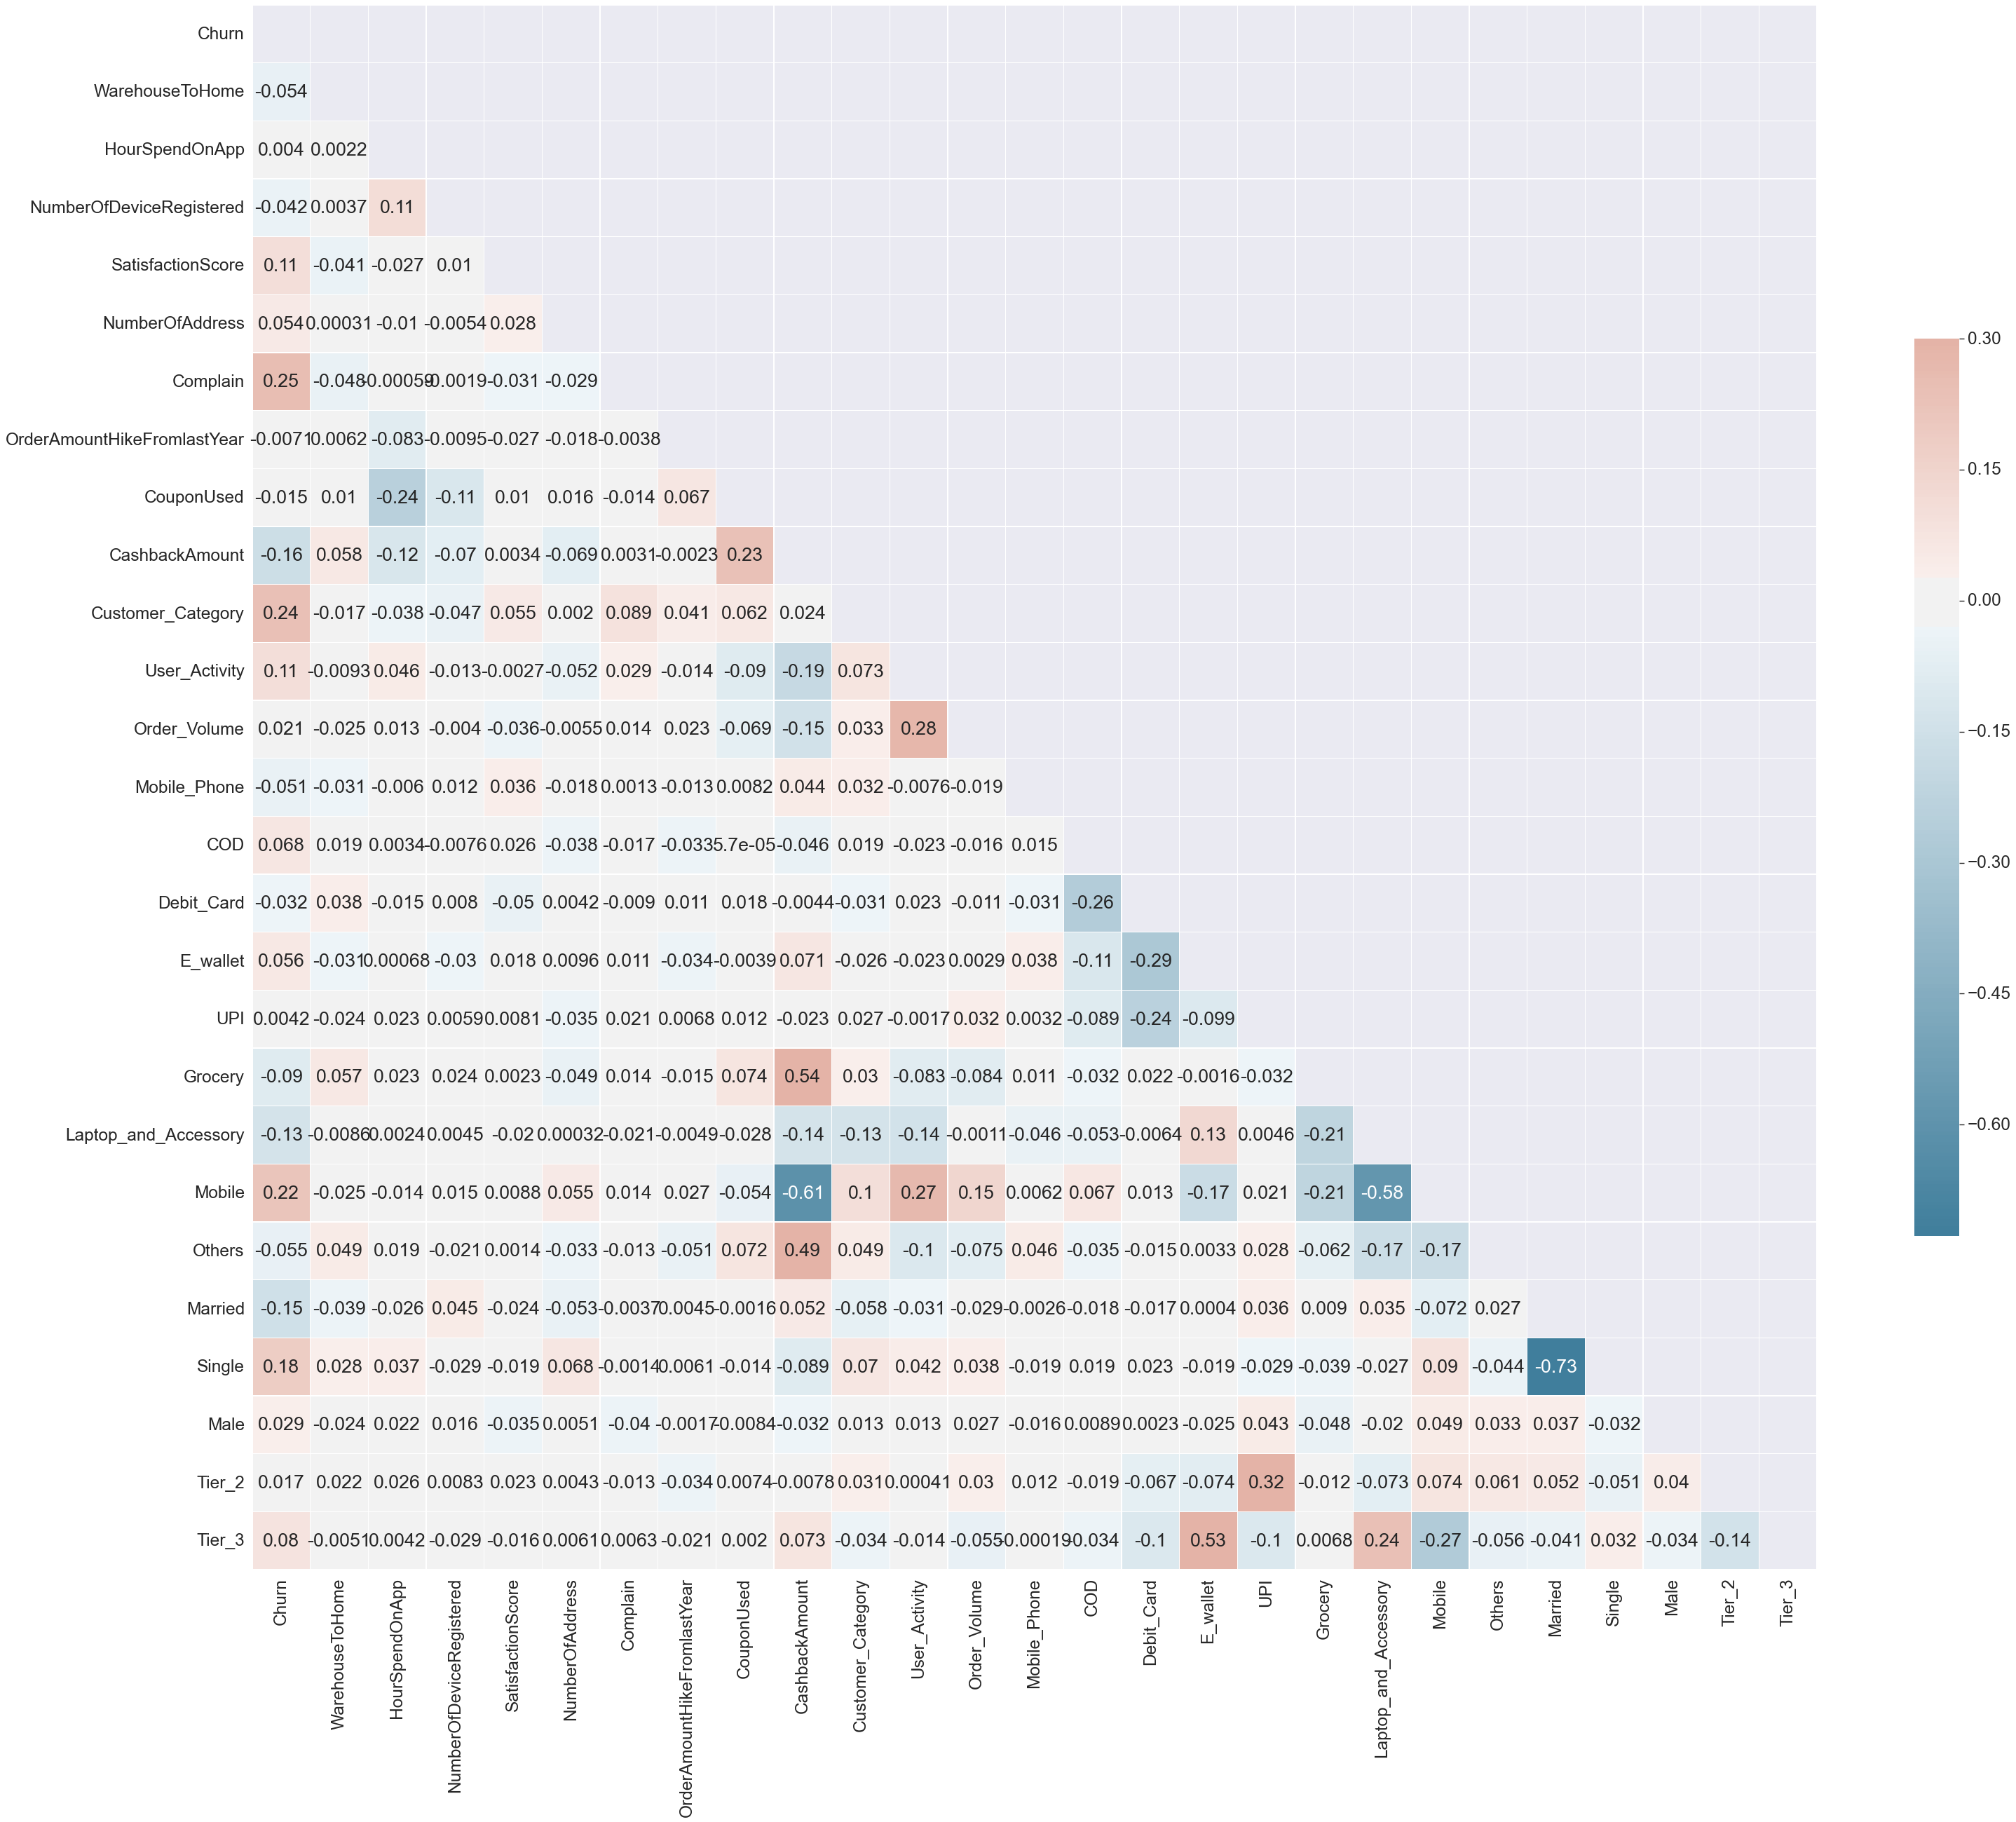

In [616]:
# construct heatmap with only continuous variables
mask = np.triu(np.ones_like(churn.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(45,40))
sns.set(font_scale=2)
sns.heatmap(churn.corr(), annot=True,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Since the problem is to find the churned customers, the most mportant metric we should consider is recall for churn. Most of the basic and tuned models were highly overfitted with a huge difference between the train and test recall. I have chosen 4 models which I think were not over fitted and tried to build a stacking model from it.

1. LR Tuned
2. LDA Tuned
3. NB
4. SVM Tuned
5. ANN Tuned

In [645]:
X_train_fs = X_train[['WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'CashbackAmount',
       'Customer_Category', 'User_Activity', 'Order_Volume', 'Mobile_Phone',
       'COD', 'Debit_Card', 'E_wallet', 'UPI', 'Grocery',
       'Laptop_and_Accessory', 'Mobile', 'Others', 'Married', 'Single', 'Male',
       'Tier_2', 'Tier_3']]

X_test_fs = X_test[['WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'CashbackAmount',
       'Customer_Category', 'User_Activity', 'Order_Volume', 'Mobile_Phone',
       'COD', 'Debit_Card', 'E_wallet', 'UPI', 'Grocery',
       'Laptop_and_Accessory', 'Mobile', 'Others', 'Married', 'Single', 'Male',
       'Tier_2', 'Tier_3']]

In [646]:
from sklearn.ensemble import StackingClassifier

In [647]:
# define the base models
level0 = list()
level0.append(('lr', lr_model_tun))
level0.append(('rf', rf_model_tun))
level0.append(('lda', lda_model_tun))
level0.append(('bag', bagging_model_tun))
level0.append(('ann', ann_model_tun))

In [648]:
# define meta learner model
level1 = LogisticRegression()

In [649]:
# define the stacking ensemble
stk_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)

In [650]:
# fit the model on all available data
stk_model.fit(X_train_fs, y_train)

StackingClassifier(cv=10,
                   estimators=[('lr',
                                LogisticRegression(C=2, intercept_scaling=3,
                                                   max_iter=5, random_state=1,
                                                   solver='liblinear',
                                                   tol=0.001)),
                               ('rf',
                                RandomForestClassifier(max_depth=20,
                                                       max_features=2,
                                                       max_leaf_nodes=40,
                                                       min_samples_leaf=10,
                                                       min_samples_split=3,
                                                       n_estimators=500,
                                                       random_state=1)),
                               ('lda', LinearDiscriminantAnalysis(tol=0.1)),
                  

In [651]:
## Performance Matrix on train data set
y_train_predict = stk_model.predict(X_train_fs)
model_score = stk_model.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8601163146617692
[[2744  523]
 [ 391 2876]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3267
           1       0.85      0.88      0.86      3267

    accuracy                           0.86      6534
   macro avg       0.86      0.86      0.86      6534
weighted avg       0.86      0.86      0.86      6534



In [652]:
from sklearn.metrics import accuracy_score 
stk_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(stk_metrics).transpose()
df
stk_train_acc= accuracy_score(y_train, y_train_predict)
stk_train_precision=round(df.loc["1"][0],2)
stk_train_recall=round(df.loc["1"][1],2)
stk_train_f1=round(df.loc["1"][2],2)
print ('stk_train_acc ',stk_train_acc)
print ('stk_train_precision ',stk_train_precision)
print ('stk_train_recall ',stk_train_recall)
print ('stk_train_f1 ',stk_train_f1)

stk_train_acc  0.8601163146617692
stk_train_precision  0.85
stk_train_recall  0.88
stk_train_f1  0.86


AUC: 0.933


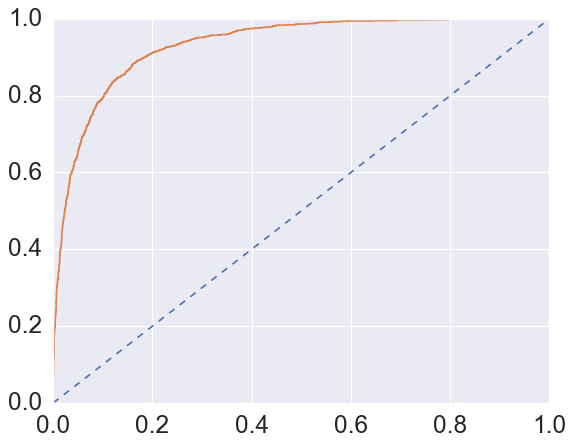

In [653]:
#AUC and ROC for the training data
# predict probabilities
probs = stk_model.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
stk_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % stk_train_auc)
# calculate roc curve
stk_train_fpr, stk_train_tpr, stk_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(stk_train_fpr, stk_train_tpr)

In [654]:
## Performance Matrix on test data set
y_test_predict = stk_model.predict(X_test_fs)
model_score = stk_model.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7791592658377738
[[1147  268]
 [ 105  169]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1415
           1       0.39      0.62      0.48       274

    accuracy                           0.78      1689
   macro avg       0.65      0.71      0.67      1689
weighted avg       0.83      0.78      0.80      1689



In [655]:
from sklearn.metrics import accuracy_score 
stk_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(stk_metrics).transpose()
df
stk_test_acc= accuracy_score(y_test, y_test_predict)
stk_test_precision=round(df.loc["1"][0],2)
stk_test_recall=round(df.loc["1"][1],2)
stk_test_f1=round(df.loc["1"][2],2)
print ('stk_test_acc ',stk_test_acc)
print ('stk_test_precision ',stk_test_precision)
print ('stk_test_recall ',stk_test_recall)
print ('stk_test_f1 ',stk_test_f1)

stk_test_acc  0.7791592658377738
stk_test_precision  0.39
stk_test_recall  0.62
stk_test_f1  0.48


AUC: 0.797


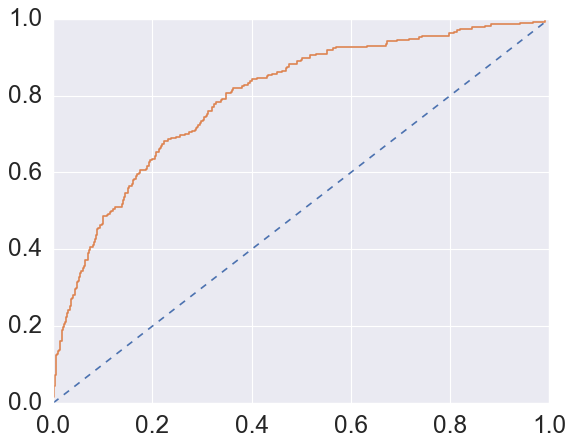

In [656]:
# AUC and ROC for the test data
# predict probabilities
probs = stk_model.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
stk_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % stk_test_auc)
# calculate roc curve
stk_test_fpr, stk_test_tpr, stk_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(stk_test_fpr, stk_test_tpr)

In [657]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Stacking Train':[stk_train_acc,stk_train_auc,stk_train_recall,stk_train_precision,stk_train_f1],
        'Stacking Test':[stk_test_acc,stk_test_auc,stk_test_recall,stk_test_precision,stk_test_f1]},index=index
       )
round(data,2)

Stacking Train  Stacking Test
Accuracy             0.86           0.78
AUC                  0.93           0.80
Recall               0.88           0.62
Precision            0.85           0.39
F1 Score             0.86           0.48

##### Conclusion

The objective of this model building activity was to correctly identify the customers who are going to churn. This makes recall for 1 as the main metric and on that basis I think the only model which has performed well on both training and test set is Naive Bayes with 85% recall on Train set and 77% recall on Test set.